In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

In [2]:
from sklearn.linear_model import Lasso
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class LassoRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = Lasso
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

In [4]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model_reg = LassoRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'darkorange'
nameset = 'Lasso'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()

model_cls = XGBoostClassifier()


In [5]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# Data

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Age_with_Patient/Data/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Age_with_Patient/Data/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Age_with_Patient/Data/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Age_with_Patient/Data/MCI_freq.xlsx'
file_path_PD = f'{path}Brain_Age_with_Patient/Data/PD_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)
df_PD = pd.read_excel(file_path_PD)

df_CN_filtrado = df_CN[(df_CN['Age'] >=40) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 40) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 40) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 40) & (df_MCI['Age'] <= 90)].reset_index(drop=True)
df_PD_filtrado = df_PD[(df_PD['Age'] >= 40) & (df_PD['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID-unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID-unique"]

X_PD = df_PD_filtrado[features]
y_PD = df_PD_filtrado["Age"]
ID_PD = df_PD_filtrado["ID-unique"]

# 
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI, X_PD], axis=0).reset_index(drop=True)
#X_combined = pd.concat([X_CN, X_AD], axis=0).reset_index(drop=True)
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)
X_PD_scaled = scaler.transform(X_PD)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)
X_PD_scaled = pd.DataFrame(X_PD_scaled, columns=X_PD.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)
df_concatenado_PD = pd.concat([X_PD, y_PD, ID_PD], axis=1, ignore_index=False)

df_patient = [df_concatenado_AD, df_concatenado_FTD, df_concatenado_MCI,df_concatenado_PD]

In [23]:
# Extraer los caracteres antes del primer '_'
countries = df_CN_filtrado['Country_ID'].str.split('_').str[0]

# Obtener los valores únicos
unique_countries = countries.unique()

# Convertir a lista
unique_countries_list = unique_countries.tolist()

print(unique_countries_list)


['CUB', 'ARG', 'CHI', 'TUR', 'IRL', 'COL', 'BRA', 'GRE', 'ITA', 'UK', 'CALI']


In [24]:
# Extraer los caracteres antes del primer '_'
df_CN_filtrado['Country'] = df_CN_filtrado['Country_ID'].str.split('_').str[0]

# Reemplazar 'CALI' por 'COL'
df_CN_filtrado['Country'] = df_CN_filtrado['Country'].replace('CALI', 'COL')

# Verificar los cambios
print(df_CN_filtrado[['Country_ID', 'Country']].head())


              Country_ID Country
0  CUB_123_2_sub-10004       CUB
1  CUB_123_2_sub-100035      CUB
2  CUB_123_1_sub-10003       CUB
3  CUB_123_1_sub-100012      CUB
4     CUB_58_sub-10005       CUB


In [11]:
df_CN_filtrado

Unnamed: 0  Delta_canon_EPP_ORB_left  Delta_canon_EPP_ORB_right  \
0            47                  0.059309                   0.040455   
1            55                  0.037787                   0.028286   
2           111                  0.054634                   0.046362   
3           209                  0.036870                   0.038921   
4           210                  0.027193                   0.030047   
..          ...                       ...                        ...   
516        1438                  0.044109                   0.054480   
517        1439                  0.058169                   0.054614   
518        1443                  0.032968                   0.036678   
519        1447                  0.059905                   0.064894   
520        1448                  0.032594                   0.038136   

     Delta_canon_EPP_IFG_left  Delta_canon_EPP_IFG_right  \
0                    0.040989                   0.039929   
1                    0.026936                   0.029210   
2                    0.049704                   0.047071   
3                    0.038879                   0.033976   
4                    0.031351                   0.029931   
..                        ...                        ...   
516                  0.042878                   0.038060   
517                  0.051197                   0.046292   
518                  0.030297                   0.035435   
519                  0.052238                   0.051449   
520                  0.030101                   0.036569   

     Delta_canon_EPP_MFG_left  Delta_canon_EPP_MFG_right  \
0                    0.040812                   0.048901   
1                    0.022287                   0.030809   
2                    0.045478                   0.032791   
3                    0.035128                   0.029229   
4                    0.035672                   0.027955   
..                        ...                        ...   
516                  0.035192                   0.035507   
517                  0.040254                   0.041953   
518                  0.032923                   0.035019   
519                  0.039586                   0.041117   
520                  0.035927                   0.034773   

     Delta_canon_EPP_SFG_left  Delta_canon_EPP_SFG_right  \
0                    0.044654                   0.042213   
1                    0.026381                   0.028117   
2                    0.043538                   0.034559   
3                    0.039080                   0.039225   
4                    0.028984                   0.029445   
..                        ...                        ...   
516                  0.040652                   0.037729   
517                  0.043555                   0.042506   
518                  0.033158                   0.033050   
519                  0.042107                   0.041310   
520                  0.033520                   0.034468   

     Delta_canon_EPP_HPC_left  ...  Sex  Educ  MMSE     HDI       GINI  \
0                    0.033875  ...  2.0  14.0   NaN  0.7578  40.700000   
1                    0.030884  ...  2.0  13.0  30.0  0.7578  40.700000   
2                    0.069201  ...  2.0  10.0  30.0  0.7578  40.700000   
3                    0.042361  ...  2.0  15.0  29.0  0.8510  41.793333   
4                    0.029098  ...  2.0  15.0  30.0  0.8510  41.793333   
..                        ...  ...  ...   ...   ...     ...        ...   
516                  0.035472  ...  2.0   7.0  28.0  0.8550  44.920000   
517                  0.053437  ...  2.0  17.0  30.0  0.8550  44.920000   
518                  0.033604  ...  2.0  12.0  30.0  0.8550  44.920000   
519                  0.050399  ...  2.0  12.0  30.0  0.8550  44.920000   
520                  0.034192  ...  2.0  22.0  30.0  0.8550  44.920000   

           ODQ  ID-unique  Country-unique   Region  Country  
0    99.324324         47 

C:\Users\felip\AppData\Local\Temp\ipykernel_185288\689198521.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x='Country', y='Educ', ci=None, ax=axes[1])
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\689198521.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x='Country', y='GINI', ci=None, ax=axes[2])
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\689198521.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x='Country', y='MMSE', ci=None, ax=axes[3])
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\689198521.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=font_size)
C:\Users\felip\Ap

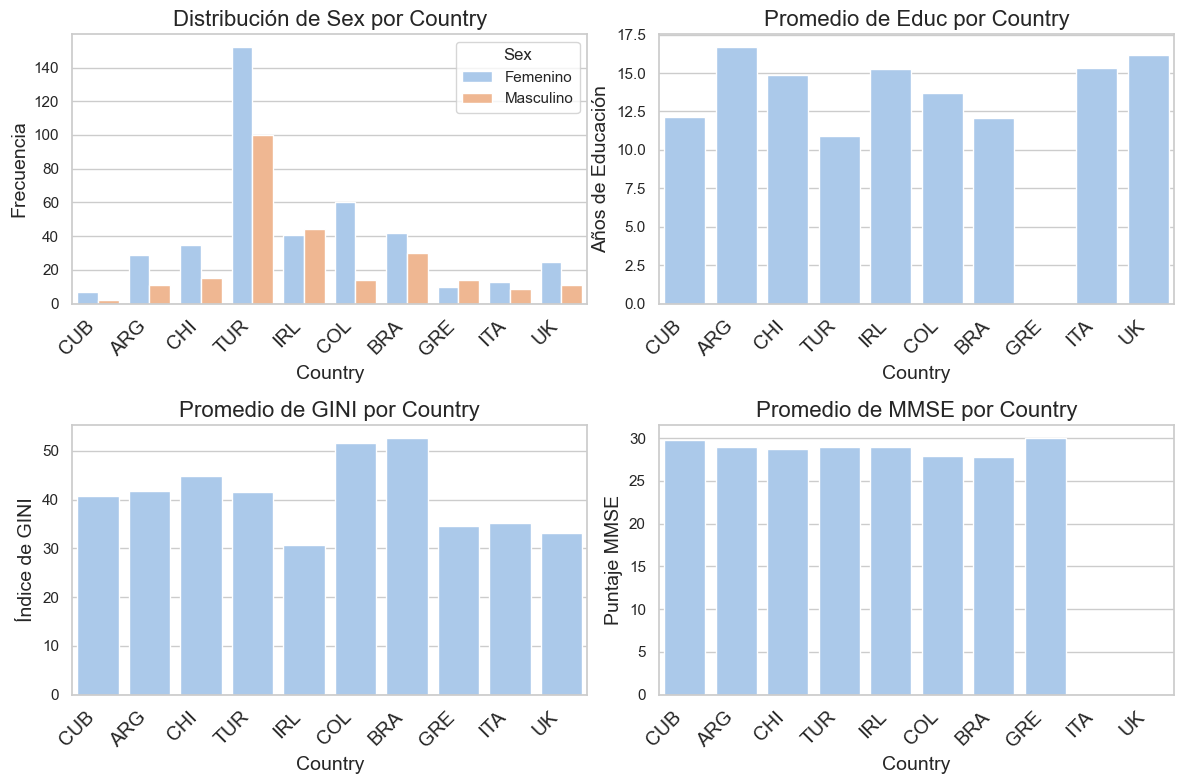

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilos
sns.set(style="whitegrid", palette="pastel")

def plot_graphs(df, font_size=20):
    """
    Genera subplots con gráficos y permite ajustar el tamaño de fuente.
    
    Parámetros:
    - df: DataFrame con las columnas ['Country', 'Sex', 'Educ', 'GINI', 'MMSE'].
    - font_size: Tamaño de fuente para los gráficos.
    """
    # Crear una copia solo con las columnas necesarias para graficar
    df_plot = df[['Country', 'Sex', 'Educ', 'GINI', 'MMSE']].copy()

    # Reemplazar valores de 'Sex' en la copia sin modificar el dataframe original
    df_plot['Sex'] = df_plot['Sex'].map({1: 'Masculino', 2: 'Femenino'})

    # Crear subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    # Gráfico 1: Distribución de 'Sex' por Country
    sns.countplot(data=df_plot, x='Country', hue='Sex', ax=axes[0])
    axes[0].set_title('Distribución de Sex por Country', fontsize=font_size + 2)
    axes[0].set_ylabel('Frecuencia', fontsize=font_size)
    axes[0].set_xlabel('Country', fontsize=font_size)

    # Gráfico 2: Promedio de 'Educ' por Country
    sns.barplot(data=df_plot, x='Country', y='Educ', ci=None, ax=axes[1])
    axes[1].set_title('Promedio de Educ por Country', fontsize=font_size + 2)
    axes[1].set_ylabel('Años de Educación', fontsize=font_size)
    axes[1].set_xlabel('Country', fontsize=font_size)

    # Gráfico 3: Promedio de 'GINI' por Country
    sns.barplot(data=df_plot, x='Country', y='GINI', ci=None, ax=axes[2])
    axes[2].set_title('Promedio de GINI por Country', fontsize=font_size + 2)
    axes[2].set_ylabel('Índice de GINI', fontsize=font_size)
    axes[2].set_xlabel('Country', fontsize=font_size)

    # Gráfico 4: Promedio de 'MMSE' por Country (ignorando NaN)
    sns.barplot(data=df_plot, x='Country', y='MMSE', ci=None, ax=axes[3])
    axes[3].set_title('Promedio de MMSE por Country', fontsize=font_size + 2)
    axes[3].set_ylabel('Puntaje MMSE', fontsize=font_size)
    axes[3].set_xlabel('Country', fontsize=font_size)

    # Ajustar los labels para mejor visualización
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=font_size)

    plt.tight_layout()
    plt.show()

# Llamada a la función
plot_graphs(df_CN_filtrado, font_size=14)  # Cambia font_size según sea necesario


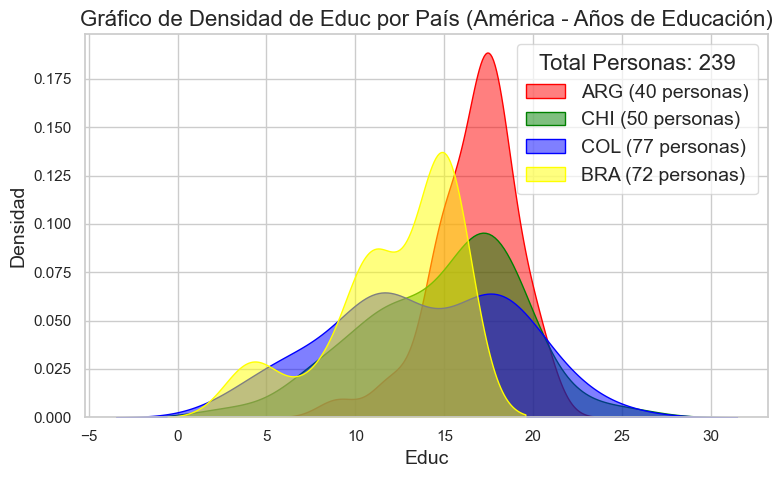

C:\Users\felip\AppData\Local\Temp\ipykernel_185288\1934145485.py:36: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


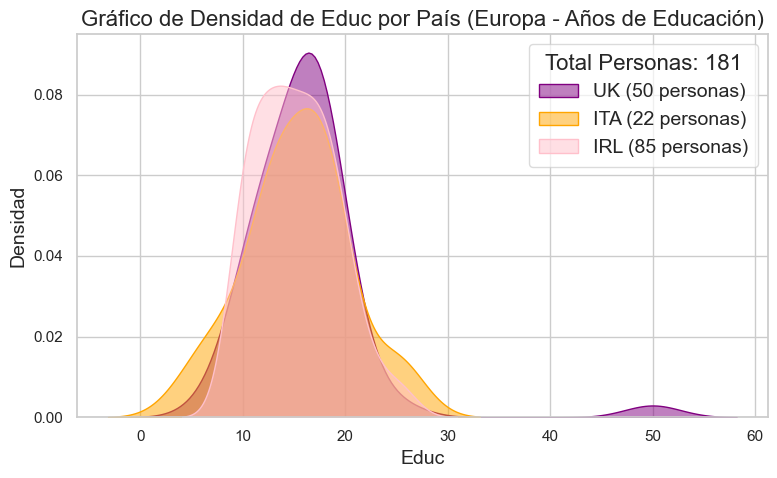

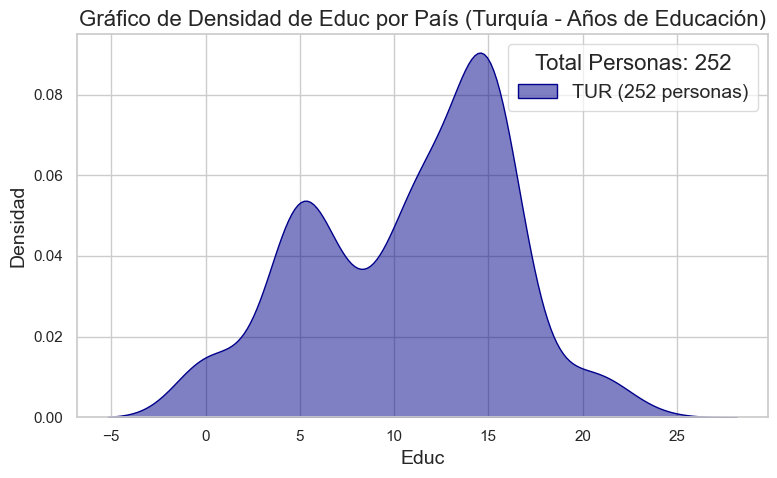

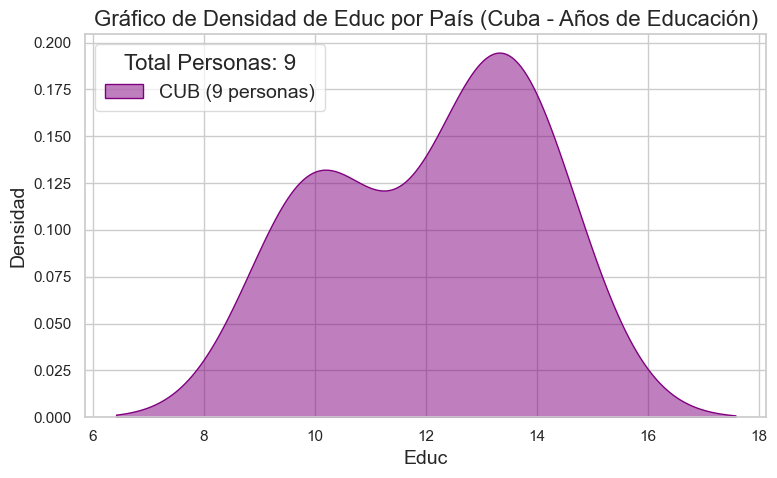

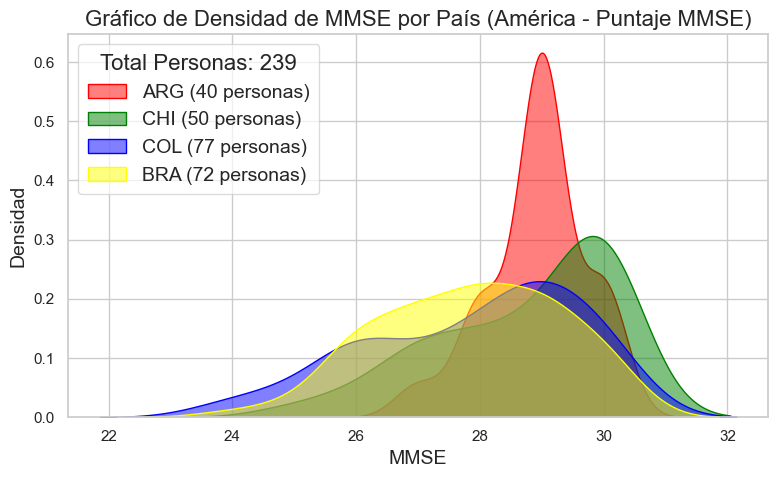

C:\Users\felip\AppData\Local\Temp\ipykernel_185288\1934145485.py:36: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\1934145485.py:36: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\1934145485.py:36: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


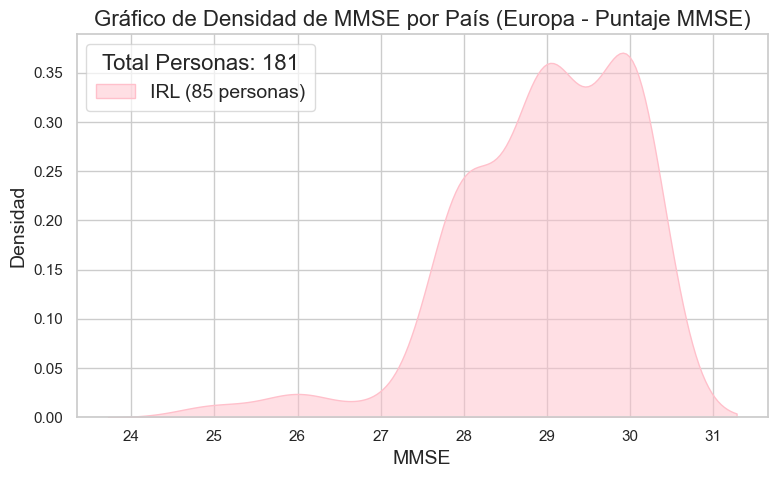

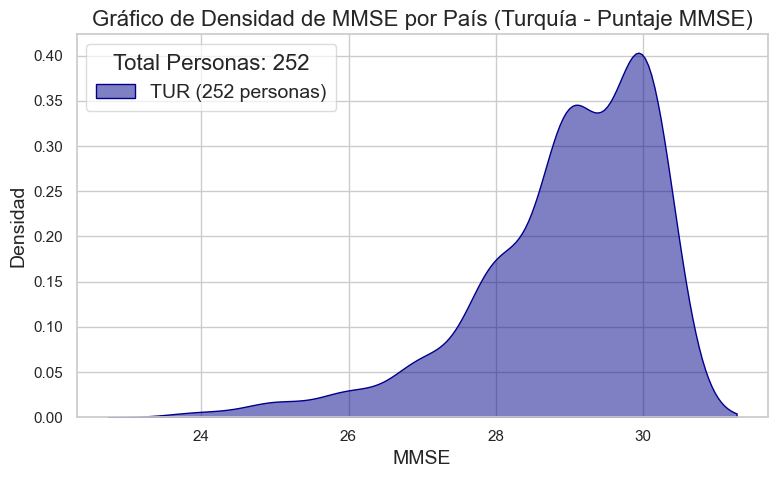

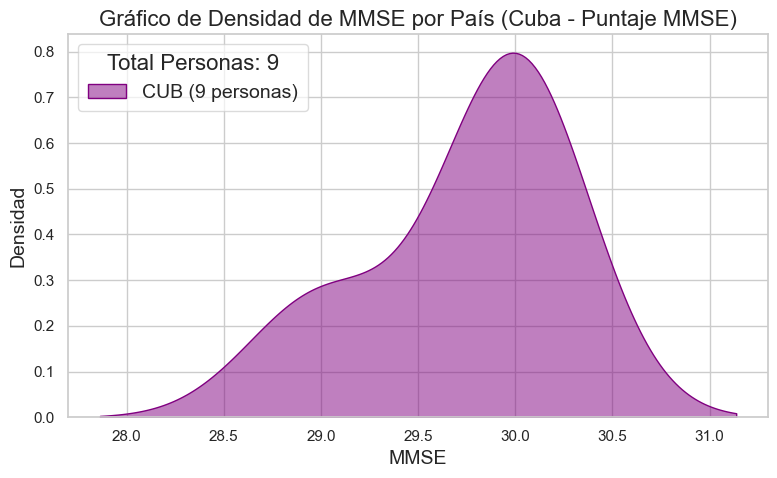

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los grupos de países
america = ['ARG', 'CHI', 'COL', 'BRA']
europa = ['UK', 'ITA', 'GRE', 'IRL']
turquia = ['TUR']
cuba = ['CUB']  # Cuba como un grupo aparte

# Colores manuales para cada país
country_colors = {
    'ARG': 'red',        # Argentina (América)
    'CHI': 'green',      # Chile (América)
    'COL': 'blue',       # Colombia (América)
    'BRA': 'yellow',     # Brasil (América)
    'CUB': 'purple',     # Cuba (América) - Color distinto
    'UK': 'purple',      # Reino Unido (Europa)
    'ITA': 'orange',     # Italia (Europa)
    'GRE': 'cyan',       # Grecia (Europa)
    'IRL': 'pink',       # Irlanda (Europa)
    'TUR': 'darkblue'    # Turquía (Asia)
}

# Función para trazar gráficos de densidad por región
def plot_density_by_region(countries, variable, title):
    plt.figure(figsize=(8, 5))
    
    # Contar el número total de personas en la región
    total_people = df_CN_filtrado[df_CN_filtrado['Country'].isin(countries)].shape[0]
    
    for country in countries:
        # Filtrar el dataframe por país
        country_data = df_CN_filtrado[df_CN_filtrado['Country'] == country]
        
        # Trazar la densidad normalizada
        sns.kdeplot(
            data=country_data,
            x=variable,
            fill=True,
            alpha=0.5,
            label=f"{country} ({country_data.shape[0]} personas)",  # Agregar el número de personas
            color=country_colors[country]
        )
    
    # Configurar título y etiquetas
    plt.title(f'Gráfico de Densidad de {variable} por País ({title})', fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('Densidad', fontsize=14)

    # Agregar leyenda y agrandarla
    plt.legend(
        title=f'Total Personas: {total_people}', 
        fontsize=14,  # Aumentar el tamaño de la fuente
        title_fontsize=16,  # Aumentar el tamaño del título
        borderpad=0.5,  # Espacio alrededor de la leyenda
        borderaxespad=0.5,  # Espacio entre la leyenda y los ejes
        fancybox=True,  # Borde estilizado de la leyenda
        framealpha=0.7  # Transparencia del borde
    )

    plt.tight_layout()
    plt.show()

# Graficar para 'Educ'
plot_density_by_region(america, 'Educ', 'América - Años de Educación')
plot_density_by_region(europa, 'Educ', 'Europa - Años de Educación')
plot_density_by_region(turquia, 'Educ', 'Turquía - Años de Educación')
plot_density_by_region(cuba, 'Educ', 'Cuba - Años de Educación')

# Graficar para 'MMSE'
plot_density_by_region(america, 'MMSE', 'América - Puntaje MMSE')
plot_density_by_region(europa, 'MMSE', 'Europa - Puntaje MMSE')
plot_density_by_region(turquia, 'MMSE', 'Turquía - Puntaje MMSE')
plot_density_by_region(cuba, 'MMSE', 'Cuba - Puntaje MMSE')


# Data Controles

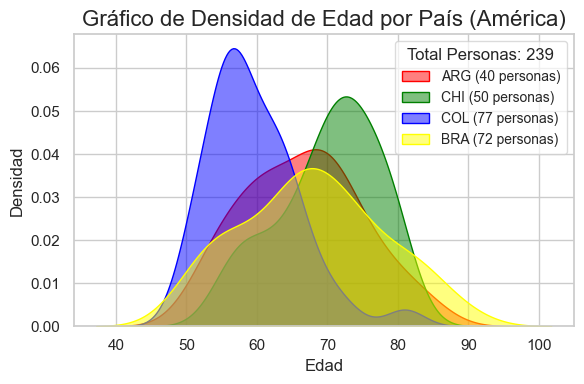

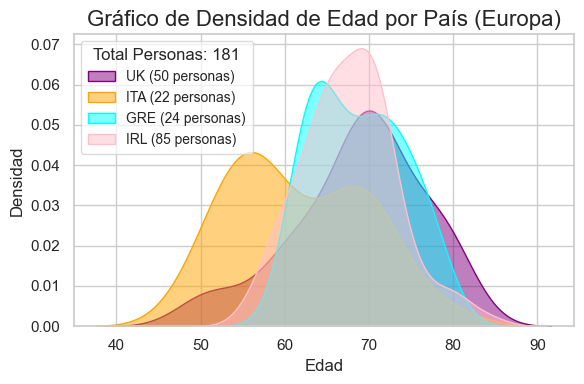

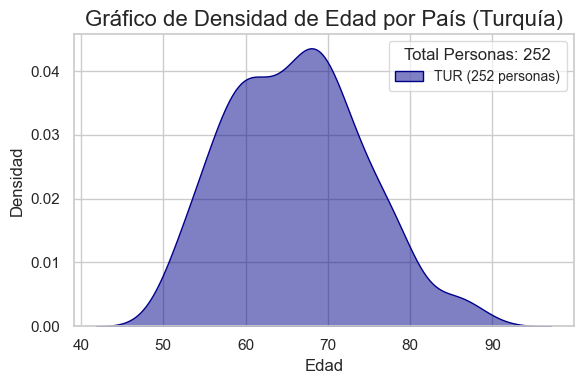

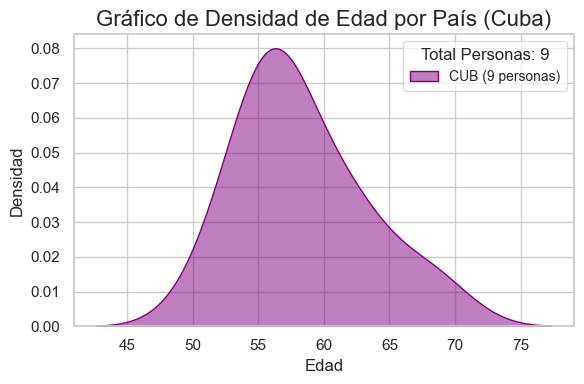

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los grupos de países
america = ['ARG', 'CHI', 'COL', 'BRA']
europa = ['UK', 'ITA', 'GRE', 'IRL']
turquia = ['TUR']
cuba = ['CUB']  # Cuba como un grupo aparte

# Colores manuales para cada país
country_colors = {
    'ARG': 'red',        # Argentina (América)
    'CHI': 'green',      # Chile (América)
    'COL': 'blue',       # Colombia (América)
    'BRA': 'yellow',     # Brasil (América)
    'CUB': 'purple',     # Cuba (América) - Color distinto
    'UK': 'purple',      # Reino Unido (Europa)
    'ITA': 'orange',     # Italia (Europa)
    'GRE': 'cyan',       # Grecia (Europa)
    'IRL': 'pink',       # Irlanda (Europa)
    'TUR': 'darkblue'    # Turquía (Asia)
}

# Función para trazar gráficos de densidad por región
def plot_density_by_region(countries, title):
    plt.figure(figsize=(6, 4))
    
    # Contar el número total de personas en la región
    total_people = df_CN_filtrado[df_CN_filtrado['Country'].isin(countries)].shape[0]
    
    for country in countries:
        # Filtrar el dataframe por país
        country_data = df_CN_filtrado[df_CN_filtrado['Country'] == country]
        
        # Trazar la densidad
        sns.kdeplot(
            data=country_data,
            x='Age',
            fill=True,
            alpha=0.5,
            label=f"{country} ({country_data.shape[0]} personas)",  # Agregar el número de personas
            color=country_colors[country]
        )
    
    # Configurar título y etiquetas
    plt.title(f'Gráfico de Densidad de Edad por País ({title})', fontsize=16)
    plt.xlabel('Edad', fontsize=12)
    plt.ylabel('Densidad', fontsize=12)

    # Agregar leyenda y agrandarla
    plt.legend(
        title=f'Total Personas: {total_people}', 
        fontsize=10,  # Aumentar el tamaño de la fuente
        title_fontsize=12,  # Aumentar el tamaño del título
        borderpad=0.5,  # Espacio alrededor de la leyenda
        borderaxespad=0.5,  # Espacio entre la leyenda y los ejes
        fancybox=True,  # Borde estilizado de la leyenda
        framealpha=0.7  # Transparencia del borde
    )

    plt.tight_layout()
    plt.show()

# Gráficos por región
plot_density_by_region(america, 'América')
plot_density_by_region(europa, 'Europa')
plot_density_by_region(turquia, 'Turquía')

# Gráfico adicional para Cuba
plot_density_by_region(cuba, 'Cuba')  # Cuba como gráfico aparte


# Hyperparameters tuning

In [51]:
X_CN_scaled

Alpha2_canon_EPP_HPC_left  Alpha2_canon_EPP_HPC_right  \
0                     3.605067                    3.468134   
1                     1.492528                    0.406198   
2                     1.260190                    1.125961   
3                     0.705329                   -1.027519   
4                    -2.429968                   -2.317480   
..                         ...                         ...   
676                   0.708871                    1.163583   
677                   0.412164                    0.338003   
678                   2.001703                    2.231103   
679                   2.272952                    2.417558   
680                   0.464518                    0.817800   

     Alpha2_canon_EPP_PARIET_left  Alpha2_canon_EPP_PARIET_right  \
0                        3.470615                       3.488114   
1                        1.420338                       4.205331   
2                       -0.181593                       1.267313   
3                       -0.307182                      -0.251300   
4                       -2.816447                      -2.643416   
..                            ...                            ...   
676                      0.468516                       1.109713   
677                     -0.454027                      -0.270358   
678                      0.466481                       0.623525   
679                      1.473958                       2.426042   
680                      0.149005                       0.730939   

     Alpha2_canon_EPP_OCC_left  Alpha2_canon_EPP_OCC_right  \
0                     6.951342                    5.496893   
1                     1.777507                    1.262439   
2                     0.267032                    1.339141   
3                    -0.906300                   -1.270432   
4                    -2.137031                   -2.028163   
..                         ...                         ...   
676                   0.827188                    1.817380   
677                   0.669877                    0.368566   
678                   1.247401                    1.120496   
679                   1.456573                    1.706569   
680                   0.990605                    1.567878   

     Alpha2_canon_RPD_HPC_left  Alpha2_canon_RPD_HPC_right  \
0                     3.605067                    3.468134   
1                     1.492528                    0.406198   
2                     1.260190                    1.125961   
3                     0.705329                   -1.027519   
4                    -2.429968                   -2.317480   
..                         ...                         ...   
676                   0.708871                    1.163583   
677                   0.412164                    0.338003   
678                   2.001703                    2.231103   
679                   2.272952                    2.417558   
680                   0.464518                    0.817800   

     Alpha2_canon_RPD_CING_left  Alpha2_canon_RPD_CING_right  ...  \
0                      2.612007                     3.587891  ...   
1                      1.227265                     1.584423  ...   
2                      0.751466                     0.160132  ...   
3                     -0.430564                    -0.805027  ...   
4                     -2.998868                    -2.782501  ...   
..                          ...                          ...  ...   
676                    0.446117                     0.872950  ...   
677                   -0.073697                     0.122670  ...   
678                    0.285849                     0.684302  ...   
679                    1.032172                     1.159993  ...   
680                    0.583560                     1.007737  ...   

     IAF_MFG_left  IAF_MFG_right  IAF_SFG_left  IAF_SFG_right  IAF_HPC_left  \
0        2.435520       2.588979      3.08132

In [53]:
opt_model, best_params = model_reg.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

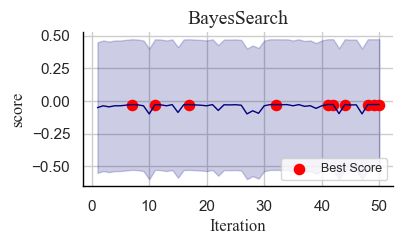

Top 1: Iteration 48, Score -0.027812615872603152
Top 2: Iteration 42, Score -0.02781361546962191
Top 3: Iteration 7, Score -0.02782105756617136
Top 4: Iteration 49, Score -0.027826472649708577
Top 5: Iteration 44, Score -0.027827154842833223
Top 6: Iteration 50, Score -0.027827382952750335
Top 7: Iteration 41, Score -0.027831637048583026
Top 8: Iteration 11, Score -0.02799535911491118
Top 9: Iteration 32, Score -0.028121662373573653
Top 10: Iteration 17, Score -0.028126577563900457


In [54]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [55]:
best_params_ = model_reg.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.29701694596494005, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.29749755120116883, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.29397976202716886,
  'max_iter': 7776,
  'tol': 0.0001194177256833917},
 {'alpha': 0.2956137604866259, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.29658177419084963, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.296809654218156, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.2984164130382073, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.2908190348026179, 'max_iter': 100, 'tol': 0.01},
 {'alpha': 0.316219899532111, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.2752287151287897, 'max_iter': 10000, 'tol': 0.01}]

In [56]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model_reg.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID-unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     33.94
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           8.80e-09
Time:                        00:14:23   Log-Likelihood:                -962.13
No. Observations:                 681   AIC:                             1928.
Df Residuals:                     679   BIC:                             1937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2868      0.309    207.924      0.0

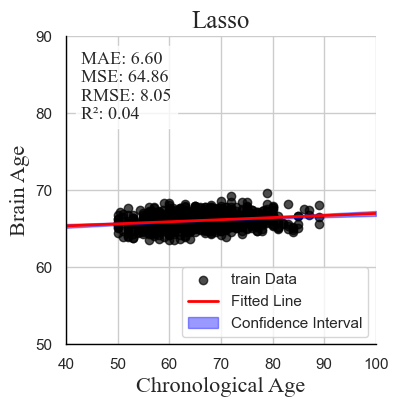

Error medio absoluto: 6.602342921012388
Error cuadrático medio: 64.8565574012542
Raíz del error cuadrático medio: 8.053356902637198
Coeficiente de determinación (R²): 0.03872887749786791


In [109]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred'],x= df_CN_avg_train['y_labels'], label_='train Data',x_ticks_step=10,y_ticks_step=10,x_min_limit=40,y_min_limit=50,x_max_limit=100,y_max_limit=90,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=4,y_size=4, legend=True, fontsize=16, mode=2)

In [58]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID-unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_HPC_right: 285.29506213060927
Alpha2_canon_EPP_PARIET_left: 173.588300664371
Low_subj_spec_EPP_OCC_right: 144.15693163726561
Low_subj_spec_RPD_HPC_left: 101.92379852085003
IAF_ORB_left: 93.47619309752751
IAF_INS_right: 86.60854238558204
IAF_HPC_left: 80.26372098512857
TF_IFG_right: 56.500616863760705
Low_subj_spec_EPP_HPC_left: 52.624291446637706
Low_subj_spec_RPD_PARIET_right: 33.359968170900224
TF_INS_left: 33.14844275897187
Alpha2_canon_EPP_PARIET_right: 25.371809640242862
TF_HPC_left: 22.051736113842622
IAF_INS_left: 20.843317903023372
Low_subj_spec_EPP_OCC_left: 17.432182579682383
IAF_HPC_right: 17.3834213480463
High_subj_spec_EPP_HPC_left: 10.41448474670907
IAF_OCC_left: 7.984721317266953
Alpha2_canon_RPD_PARIET_left: 6.931841897993072
Low_subj_spec_EPP_CING_left: 6.344080349916062
TF_SFG_right: 4.720681520532093
TF_ORB_right: 4.183038662318158
Low_subj_spec_EPP_CING_right: 3.1970310093300776
High_su

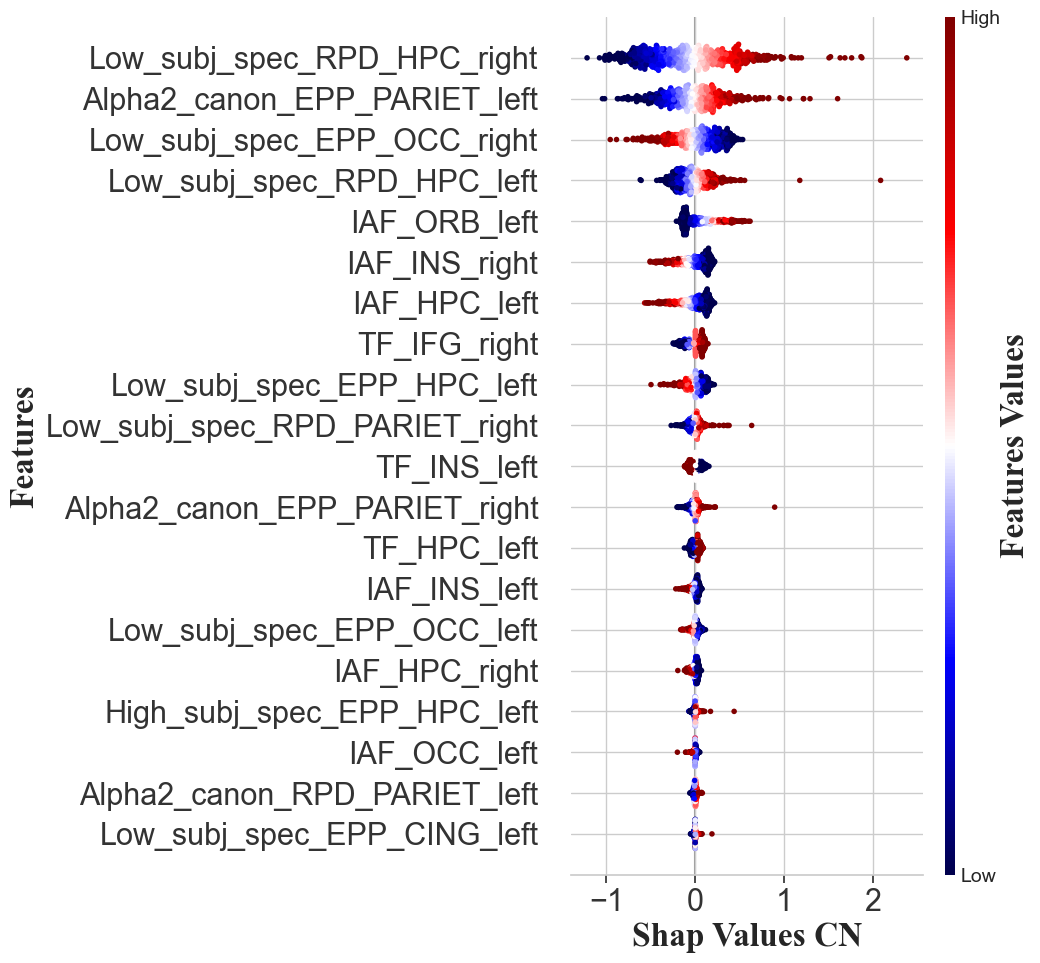

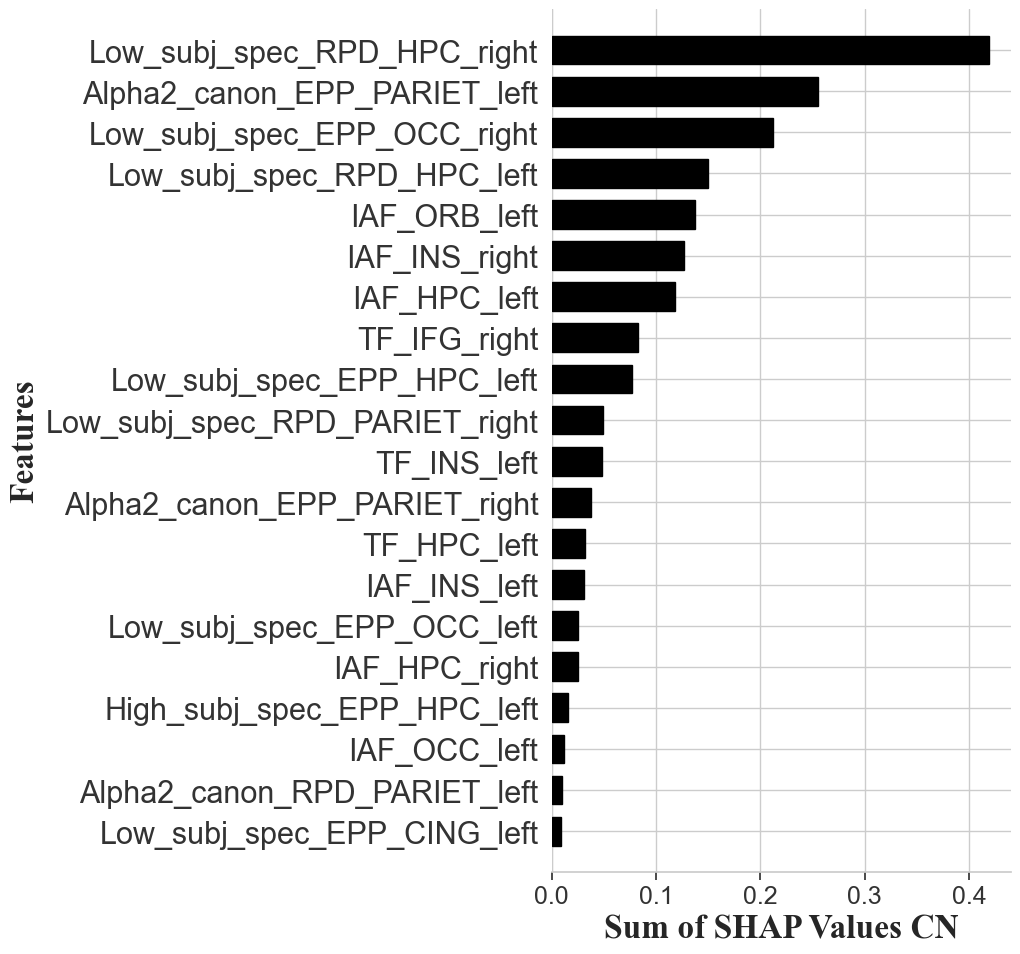

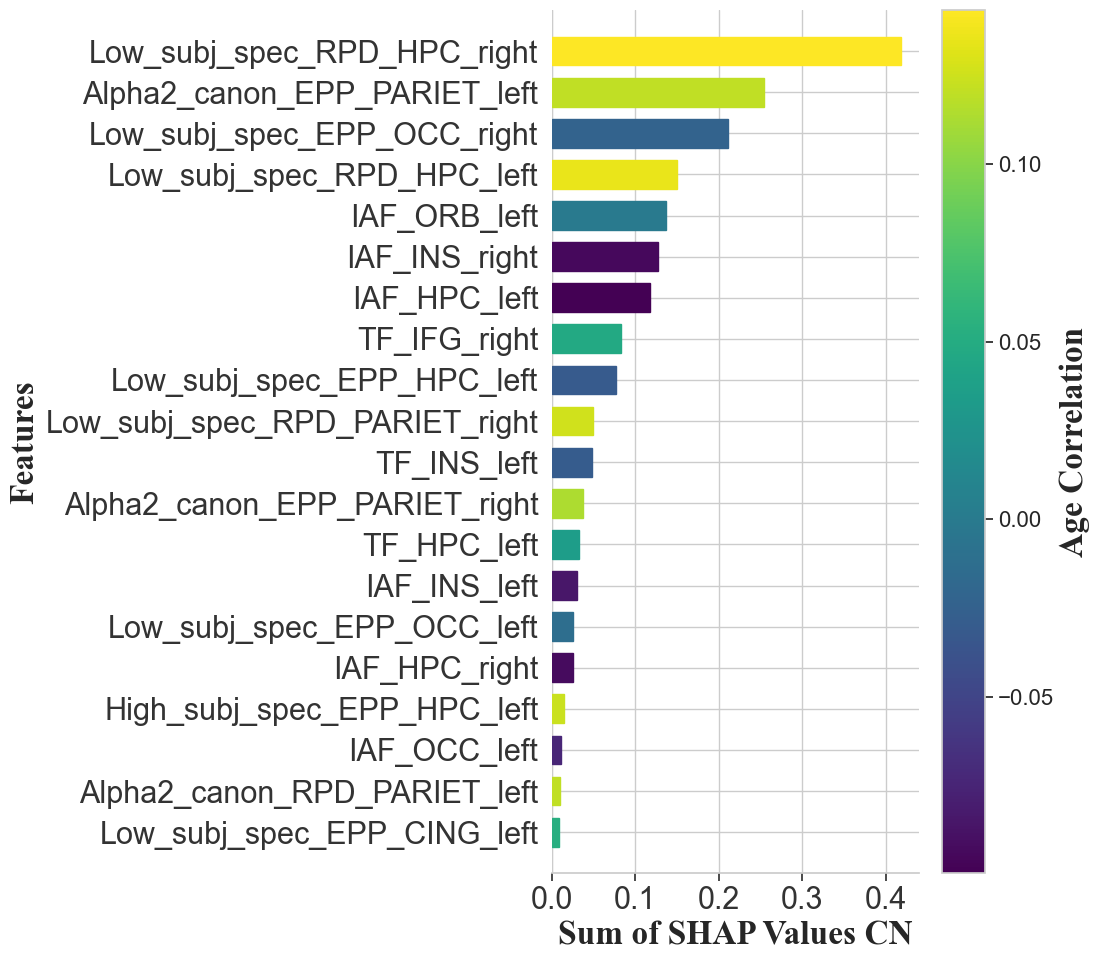

In [59]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [60]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

HPC_right: 1.000000
HPC_left: 0.883043
PARIET_left: 0.596409
OCC_right: 0.476271
ORB_left: 0.308830
INS_right: 0.286140
PARIET_right: 0.194040
IFG_right: 0.186669
INS_left: 0.178380
OCC_left: 0.083973
CING_left: 0.020960


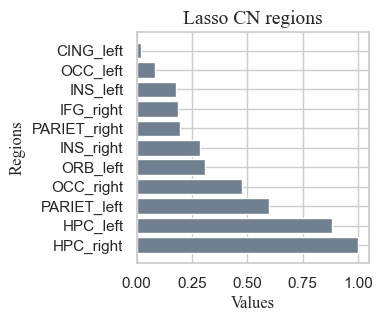

In [ ]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set=f'{nameset} CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


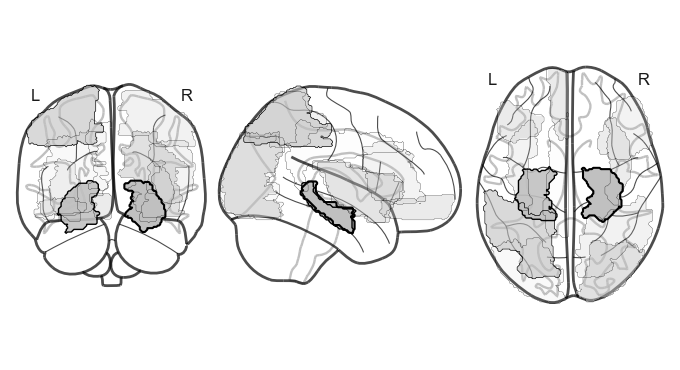

In [62]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='#C0C0C0')

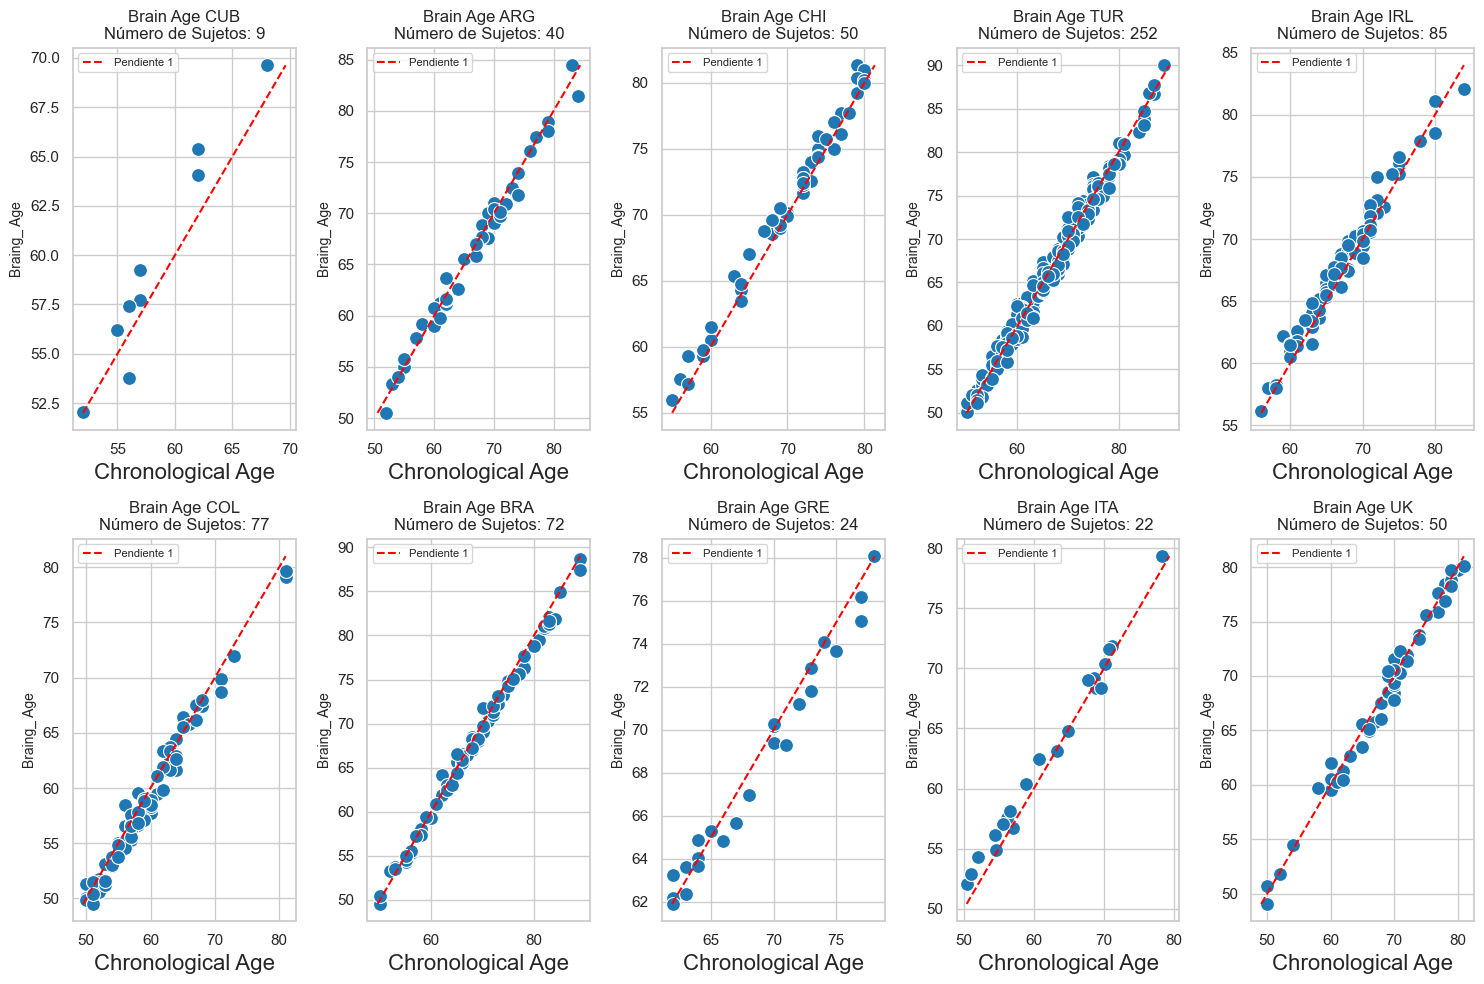

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes ambos dataframes ya cargados
# df_CN_avg_test y df_CN_filtrado

# Combinar ambos dataframes utilizando la columna 'ID-unique'
df_merged = pd.merge(df_CN_avg_test, df_CN_filtrado[['ID-unique', 'Country']], on='ID-unique')

# Obtener la lista de países únicos
countries = df_merged['Country'].unique()

# Definir el número de filas y columnas para los subgráficos
cols = 5  # Número de columnas
rows = 2  # Número de filas

# Crear la figura y los ejes para los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Convertir el arreglo 2D de ejes a 1D para facilitar el acceso

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear gráficos individuales para cada país
for idx, country in enumerate(countries):
    if idx >= rows * cols:  # Si hay más países que subgráficos, romper el ciclo
        break
        
    df_country = df_merged[df_merged['Country'] == country]
    num_subjects = len(df_country)
    
    # Configurar el gráfico en el subplot correspondiente
    ax = axes[idx]
    sns.scatterplot(
        data=df_country,
        x='y_labels',
        y='y_pred_corrected',
        color='tab:blue',
        s=100,  # Tamaño de los puntos
        ax=ax  # Especificar el eje actual
    )
    
    # Agregar la línea de pendiente 1
    min_val = min(df_country['y_labels'].min(), df_country['y_pred_corrected'].min())
    max_val = max(df_country['y_labels'].max(), df_country['y_pred_corrected'].max())
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Pendiente 1')
    
    # Personalización del gráfico
    ax.set_title(f'Brain Age {country}\nNúmero de Sujetos: {num_subjects}', fontsize=12)
    ax.set_xlabel('Chronological Age', fontsize=16)
    ax.set_ylabel('Braing_ Age', fontsize=10)
    ax.legend(fontsize=8)

# Ajustar el diseño para que no se superpongan los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_185288\816505598.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


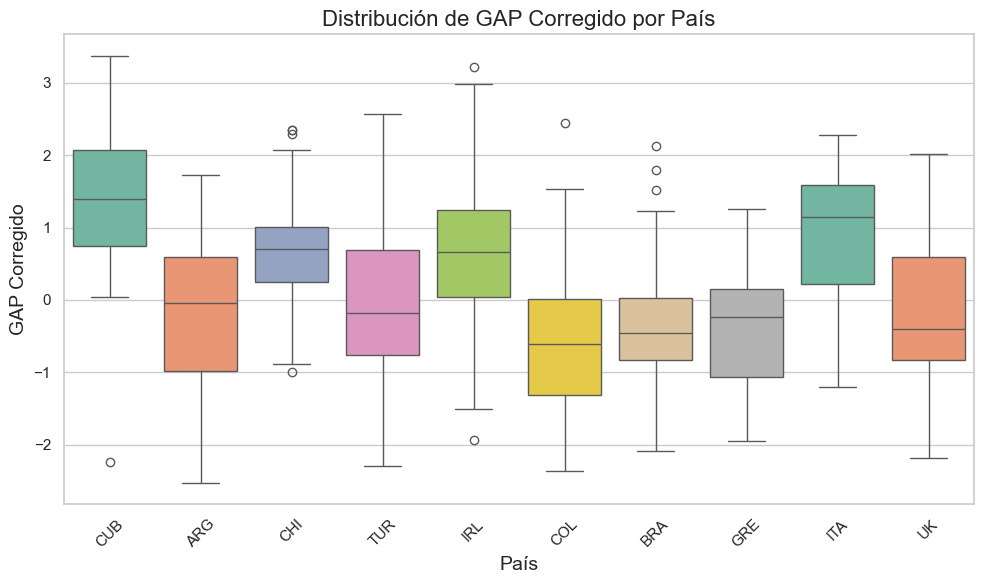

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes el dataframe df_merged ya cargado

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_merged,
    x='Country',  # Agrupar por país
    y='GAP_corrected',  # Valores a graficar
    palette='Set2'  # Colores personalizados
)

# Personalización del gráfico
plt.title('Distribución de GAP Corregido por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('GAP Corregido', fontsize=14)
plt.xticks(rotation=45)  # Rotar los nombres de los países si es necesario
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Sin Cuba

In [25]:
# Crear un nuevo dataframe sin Cuba
df_CN_filtrado_sin_cuba = df_CN_filtrado[df_CN_filtrado['Country'] != 'CUB']

X_CN_sin_cuba = df_CN_filtrado_sin_cuba[features]
y_CN_sin_cuba= df_CN_filtrado_sin_cuba["Age"]
ID_CN_sin_cuba = df_CN_filtrado_sin_cuba["ID-unique"]

scaler_sin_cuba = StandardScaler()
scaler_sin_cuba.fit(X_CN_sin_cuba)

X_CN_scaled_sin_cuba = scaler_sin_cuba.transform(X_CN_sin_cuba)

X_CN_scaled_sin_cuba = pd.DataFrame(X_CN_scaled_sin_cuba, columns=X_CN_sin_cuba.columns)

df_concatenado_CN_sin_cuba = pd.concat([X_CN_sin_cuba, y_CN_sin_cuba, ID_CN_sin_cuba], axis=1, ignore_index=False)


In [ ]:
opt_model_sin_cuba, best_params_sin_cuba = model_reg.search_best_model (X=X_CN_scaled_sin_cuba, y=y_CN_sin_cuba, n_iter_=50, scoring_metric='r2')


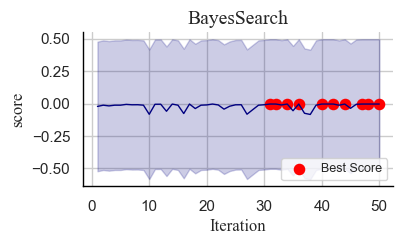

Top 1: Iteration 31, Score -0.0028400436448342004
Top 2: Iteration 44, Score -0.00284347903940807
Top 3: Iteration 48, Score -0.002845789905339757
Top 4: Iteration 50, Score -0.0028575026133219493
Top 5: Iteration 32, Score -0.0028575210586288535
Top 6: Iteration 36, Score -0.0028586283303330905
Top 7: Iteration 47, Score -0.002874100408087621
Top 8: Iteration 42, Score -0.0028759677894955593
Top 9: Iteration 40, Score -0.002876676262943423
Top 10: Iteration 34, Score -0.0028783185134386158


In [103]:
score_sin_cuba = opt_model_sin_cuba.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score_sin_cuba, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [104]:
best_params_sin_cuba = model_reg.best_hyper(num_best=10, opt_model=opt_model_sin_cuba, num_max=50)
best_params_sin_cuba

[{'alpha': 0.6132277126221531, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.6122612460668929, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.6106386920652798, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.6065455283342397, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.6059233668557301, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.60564877922751, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.6005242697842145, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.5970591474830904, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.6004315759363889, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.5971071741526653, 'max_iter': 100, 'tol': 1e-05}]

In [105]:
results_labels_df_CN_train_sin_cuba, results_labels_df_CN_test_sin_cuba,  results_model_sin_cuba, results_per_fold_CN_train_sin_cuba, results_per_fold_CN_test_sin_cuba, df_CN_avg_train_sin_cuba,df_CN_avg_test_sin_cuba= model_reg.trainer(
        X=X_CN_sin_cuba,
        y=y_CN_sin_cuba,
        ID_label='ID-unique',
        ID=ID_CN_sin_cuba,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     33.96
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           8.76e-09
Time:                        00:14:36   Log-Likelihood:                -994.06
No. Observations:                 672   AIC:                             1992.
Df Residuals:                     670   BIC:                             2001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2486      0.334    192.591      0.0

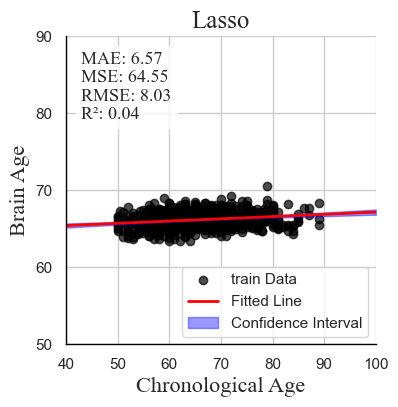

Error medio absoluto: 6.567273307439706
Error cuadrático medio: 64.54572762603982
Raíz del error cuadrático medio: 8.034035575353137
Coeficiente de determinación (R²): 0.040685123076214635


In [110]:
Plotters.plot_regresion(y=df_CN_avg_train_sin_cuba['y_pred'],x= df_CN_avg_train_sin_cuba['y_labels'], label_='train Data',x_ticks_step=10,y_ticks_step=10,x_min_limit=40,y_min_limit=50,x_max_limit=100,y_max_limit=90,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=4,y_size=4, legend=True, fontsize=16, mode=2)

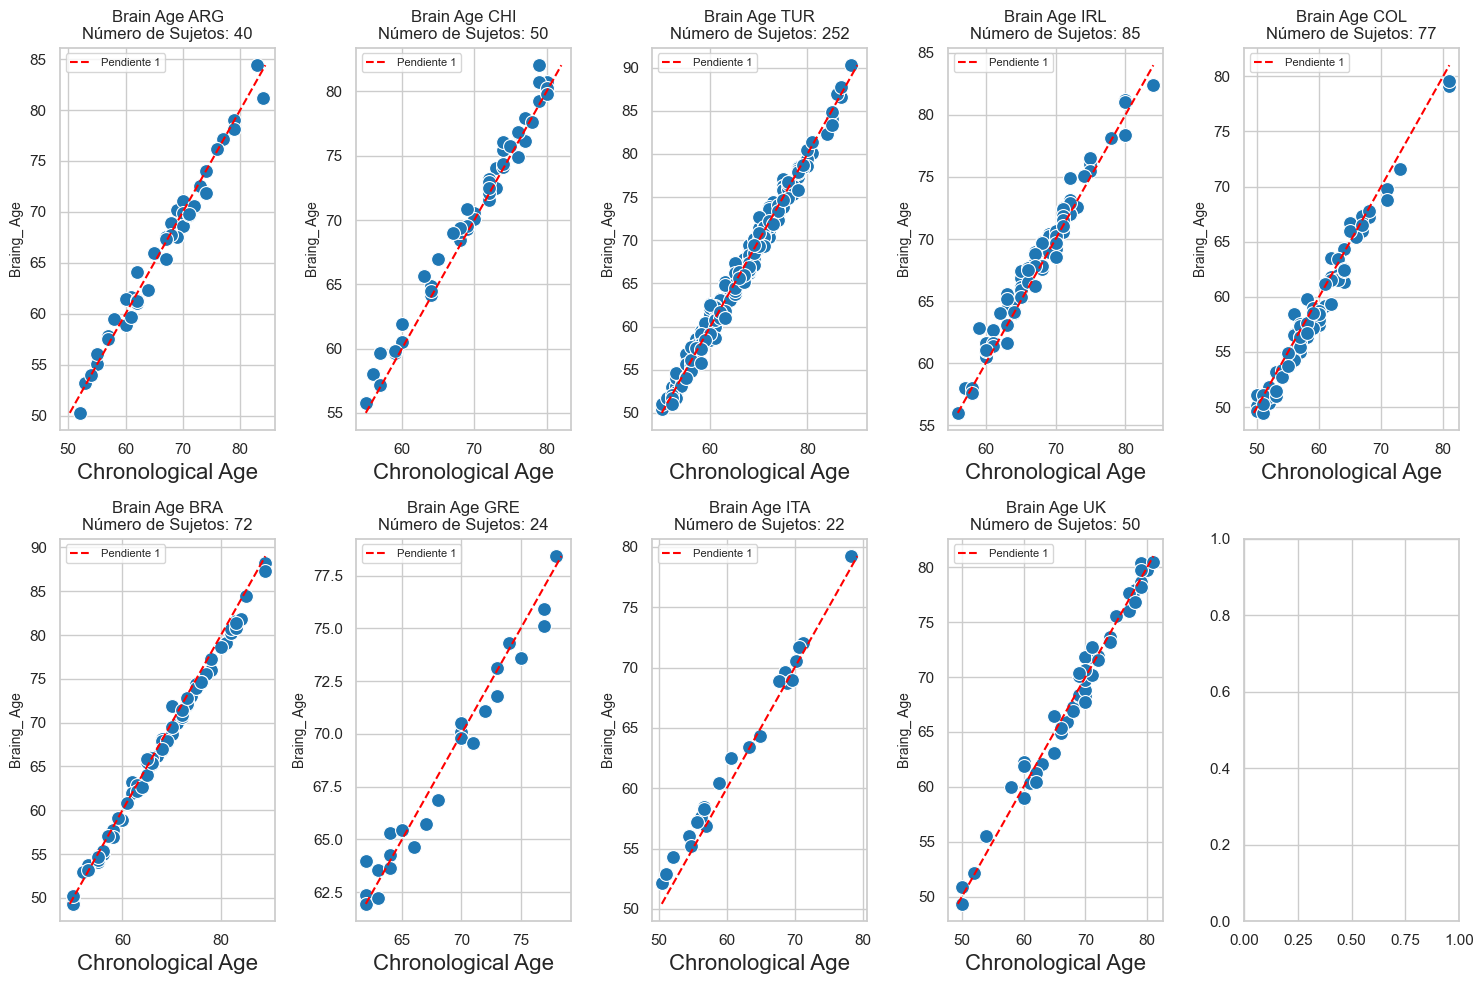

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes ambos dataframes ya cargados
# df_CN_avg_test y df_CN_filtrado

# Combinar ambos dataframes utilizando la columna 'ID-unique'
df_merged = pd.merge(df_CN_avg_test_sin_cuba, df_CN_filtrado_sin_cuba[['ID-unique', 'Country']], on='ID-unique')

# Obtener la lista de países únicos
countries = df_merged['Country'].unique()

# Definir el número de filas y columnas para los subgráficos
cols = 5  # Número de columnas
rows = 2  # Número de filas

# Crear la figura y los ejes para los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Convertir el arreglo 2D de ejes a 1D para facilitar el acceso

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear gráficos individuales para cada país
for idx, country in enumerate(countries):
    if idx >= rows * cols:  # Si hay más países que subgráficos, romper el ciclo
        break
        
    df_country = df_merged[df_merged['Country'] == country]
    num_subjects = len(df_country)
    
    # Configurar el gráfico en el subplot correspondiente
    ax = axes[idx]
    sns.scatterplot(
        data=df_country,
        x='y_labels',
        y='y_pred_corrected',
        color='tab:blue',
        s=100,  # Tamaño de los puntos
        ax=ax  # Especificar el eje actual
    )
    
    # Agregar la línea de pendiente 1
    min_val = min(df_country['y_labels'].min(), df_country['y_pred_corrected'].min())
    max_val = max(df_country['y_labels'].max(), df_country['y_pred_corrected'].max())
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Pendiente 1')
    
    # Personalización del gráfico
    ax.set_title(f'Brain Age {country}\nNúmero de Sujetos: {num_subjects}', fontsize=12)
    ax.set_xlabel('Chronological Age', fontsize=16)
    ax.set_ylabel('Braing_ Age', fontsize=10)
    ax.legend(fontsize=8)

# Ajustar el diseño para que no se superpongan los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_185288\816505598.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


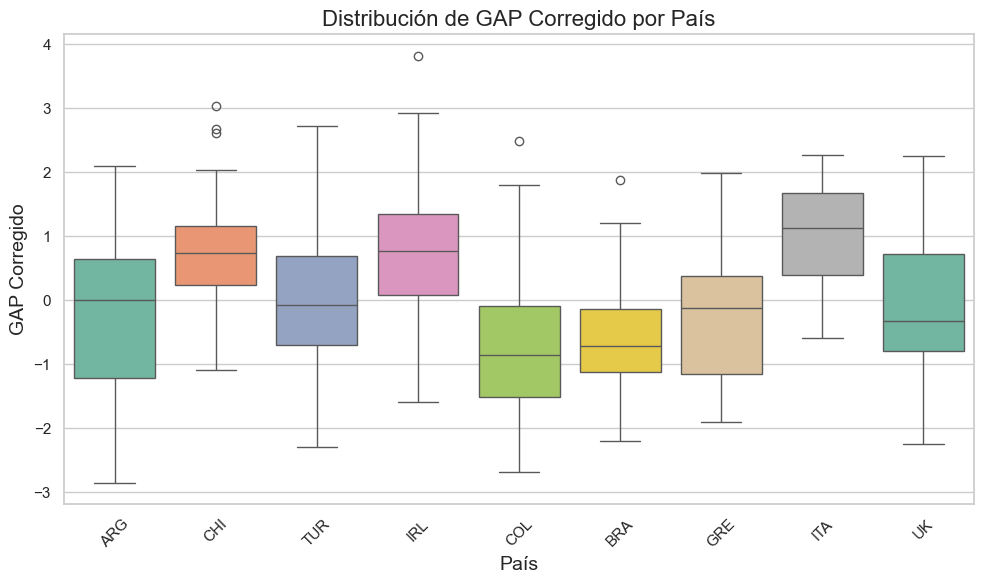

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes el dataframe df_merged ya cargado

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_merged,
    x='Country',  # Agrupar por país
    y='GAP_corrected',  # Valores a graficar
    palette='Set2'  # Colores personalizados
)

# Personalización del gráfico
plt.title('Distribución de GAP Corregido por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('GAP Corregido', fontsize=14)
plt.xticks(rotation=45)  # Rotar los nombres de los países si es necesario
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [137]:
shap_values_CN_sin_cuba, shap_values_avg_CN_sin_cuba, shap_summary_sorted_CN_sin_cuba, shap_per_fold_CN_sin_cuba = model_reg.calculate_multiple_shap(
    df_concatenado_CN_sin_cuba, df_concatenado_CN_sin_cuba,'ID-unique', results_per_fold_CN_train_sin_cuba, results_per_fold_CN_test_sin_cuba, results_model_sin_cuba['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_HPC_right: 185.6618308467781
Alpha2_canon_EPP_PARIET_left: 183.25709418409514
Low_subj_spec_RPD_HPC_left: 153.2719891151389
Low_subj_spec_EPP_OCC_right: 145.62635454246578
IAF_ORB_left: 102.37701904323376
High_subj_spec_EPP_HPC_left: 79.4630749238148
IAF_HPC_left: 78.3517889986678
IAF_INS_right: 61.376362759232954
TF_INS_left: 32.090685418351384
IAF_HPC_right: 30.16236129664369
TF_IFG_right: 29.222876603552464
High_subj_spec_EPP_PARIET_right: 27.944473255958194
IAF_INS_left: 25.192467608402424
TF_SFG_right: 24.645888004550095
High_subj_spec_EPP_PARIET_left: 18.680365637343748
TF_HPC_left: 17.0479906399749
Alpha2_canon_RPD_PARIET_left: 8.50151093538606
High_subj_spec_RPD_HPC_left: 7.520424977795878
Alpha2_canon_EPP_PARIET_right: 6.780401484183715
Low_subj_spec_EPP_CING_left: 5.635934759019919
IAF_SFG_right: 4.730920607926857
TF_SFG_left: 4.417866504065826
IAF_OCC_left: 3.955276477687311
Low_subj_spec_RPD_PA

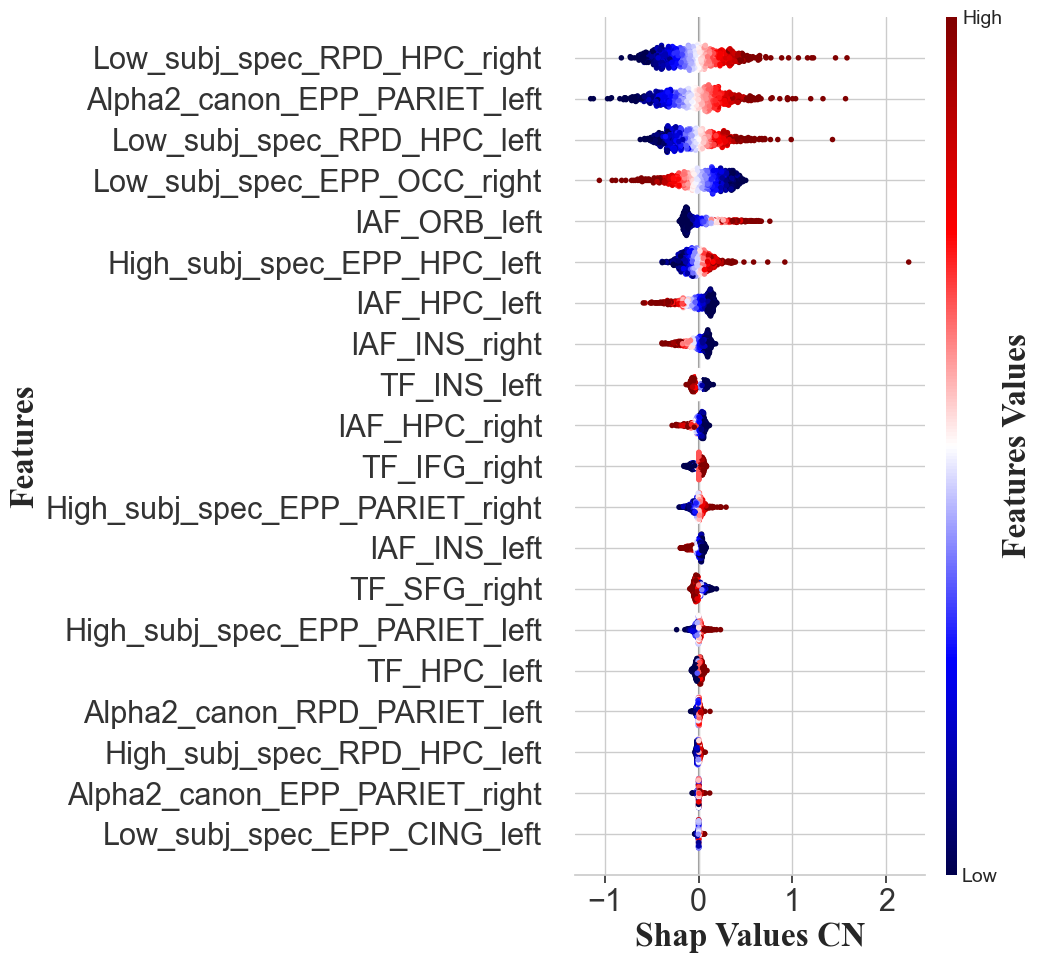

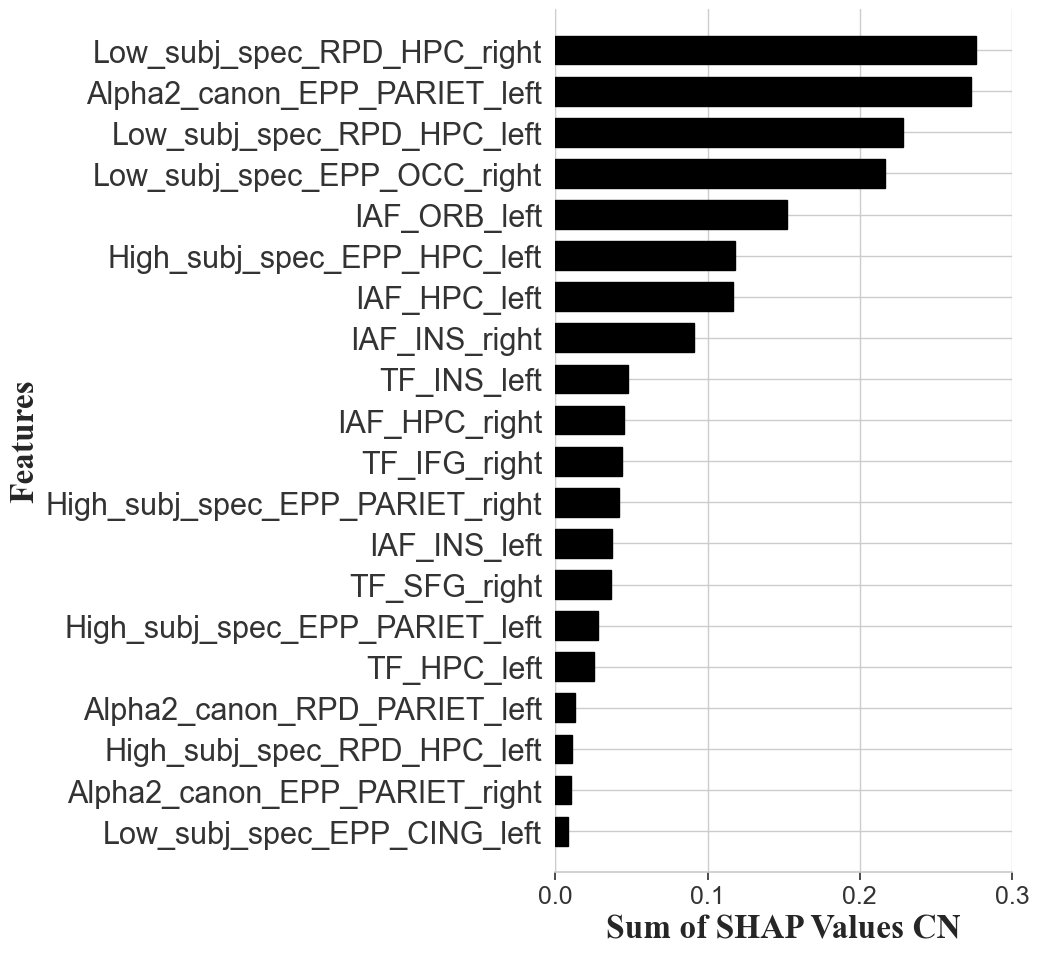

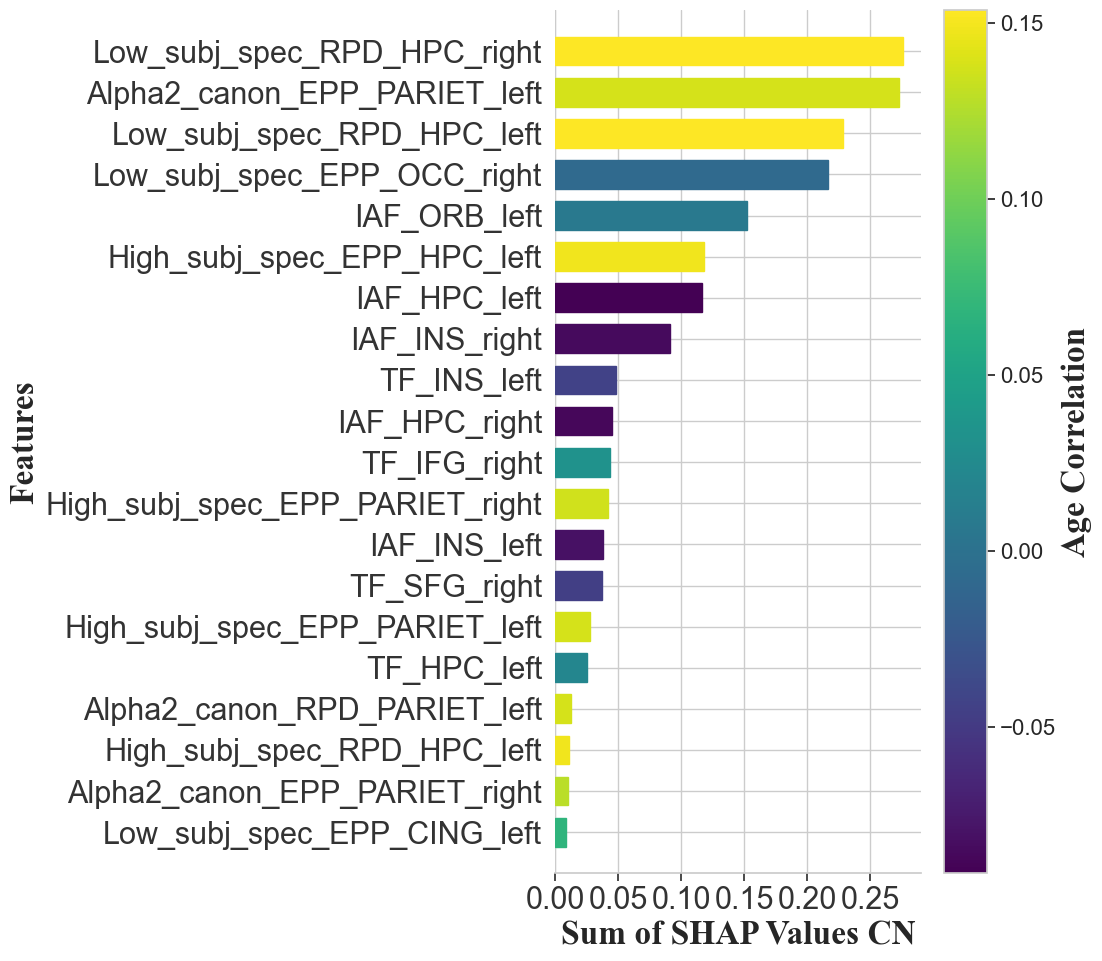

In [138]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN_sin_cuba,X_test=X_CN_sin_cuba,y_test=y_CN_sin_cuba, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [150]:
shap_per_region_sorted_CN_sin_cuba, normalized_result_sorted_CN_sin_cuba=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_CN_sin_cuba, num_max=20)

HPC_left: 1.000000
HPC_right: 0.642994
PARIET_left: 0.626950
OCC_right: 0.433857
ORB_left: 0.305006
INS_right: 0.182855
INS_left: 0.170661
PARIET_right: 0.103454
IFG_right: 0.087062
SFG_right: 0.073426
CING_left: 0.016791


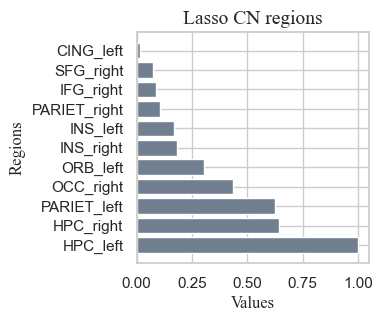

In [156]:
Plotters.plot_normalized_values(normalized_result_sorted_CN_sin_cuba, color='slategray', name_set=f'{nameset} CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


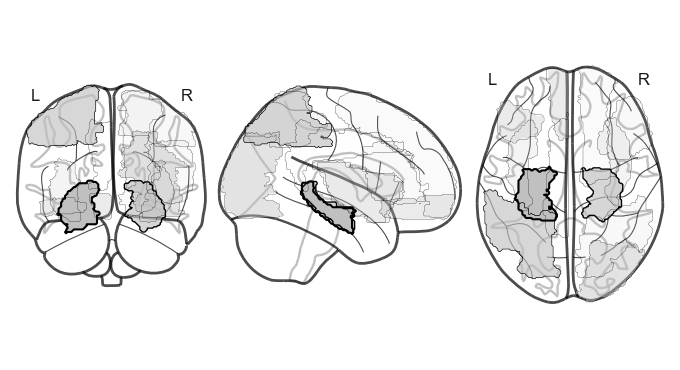

In [157]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN_sin_cuba, base_path, color='#C0C0C0')

# Analisis de los mejores shap

In [115]:
top_20_shap_labels = [item[0] for item in shap_summary_sorted_CN[:20]]


In [116]:
top_20_shap_labels

['Low_subj_spec_RPD_HPC_right',
 'Alpha2_canon_EPP_PARIET_left',
 'Low_subj_spec_EPP_OCC_right',
 'Low_subj_spec_RPD_HPC_left',
 'IAF_ORB_left',
 'IAF_INS_right',
 'IAF_HPC_left',
 'TF_IFG_right',
 'Low_subj_spec_EPP_HPC_left',
 'Low_subj_spec_RPD_PARIET_right',
 'TF_INS_left',
 'Alpha2_canon_EPP_PARIET_right',
 'TF_HPC_left',
 'IAF_INS_left',
 'Low_subj_spec_EPP_OCC_left',
 'IAF_HPC_right',
 'High_subj_spec_EPP_HPC_left',
 'IAF_OCC_left',
 'Alpha2_canon_RPD_PARIET_left',
 'Low_subj_spec_EPP_CING_left']

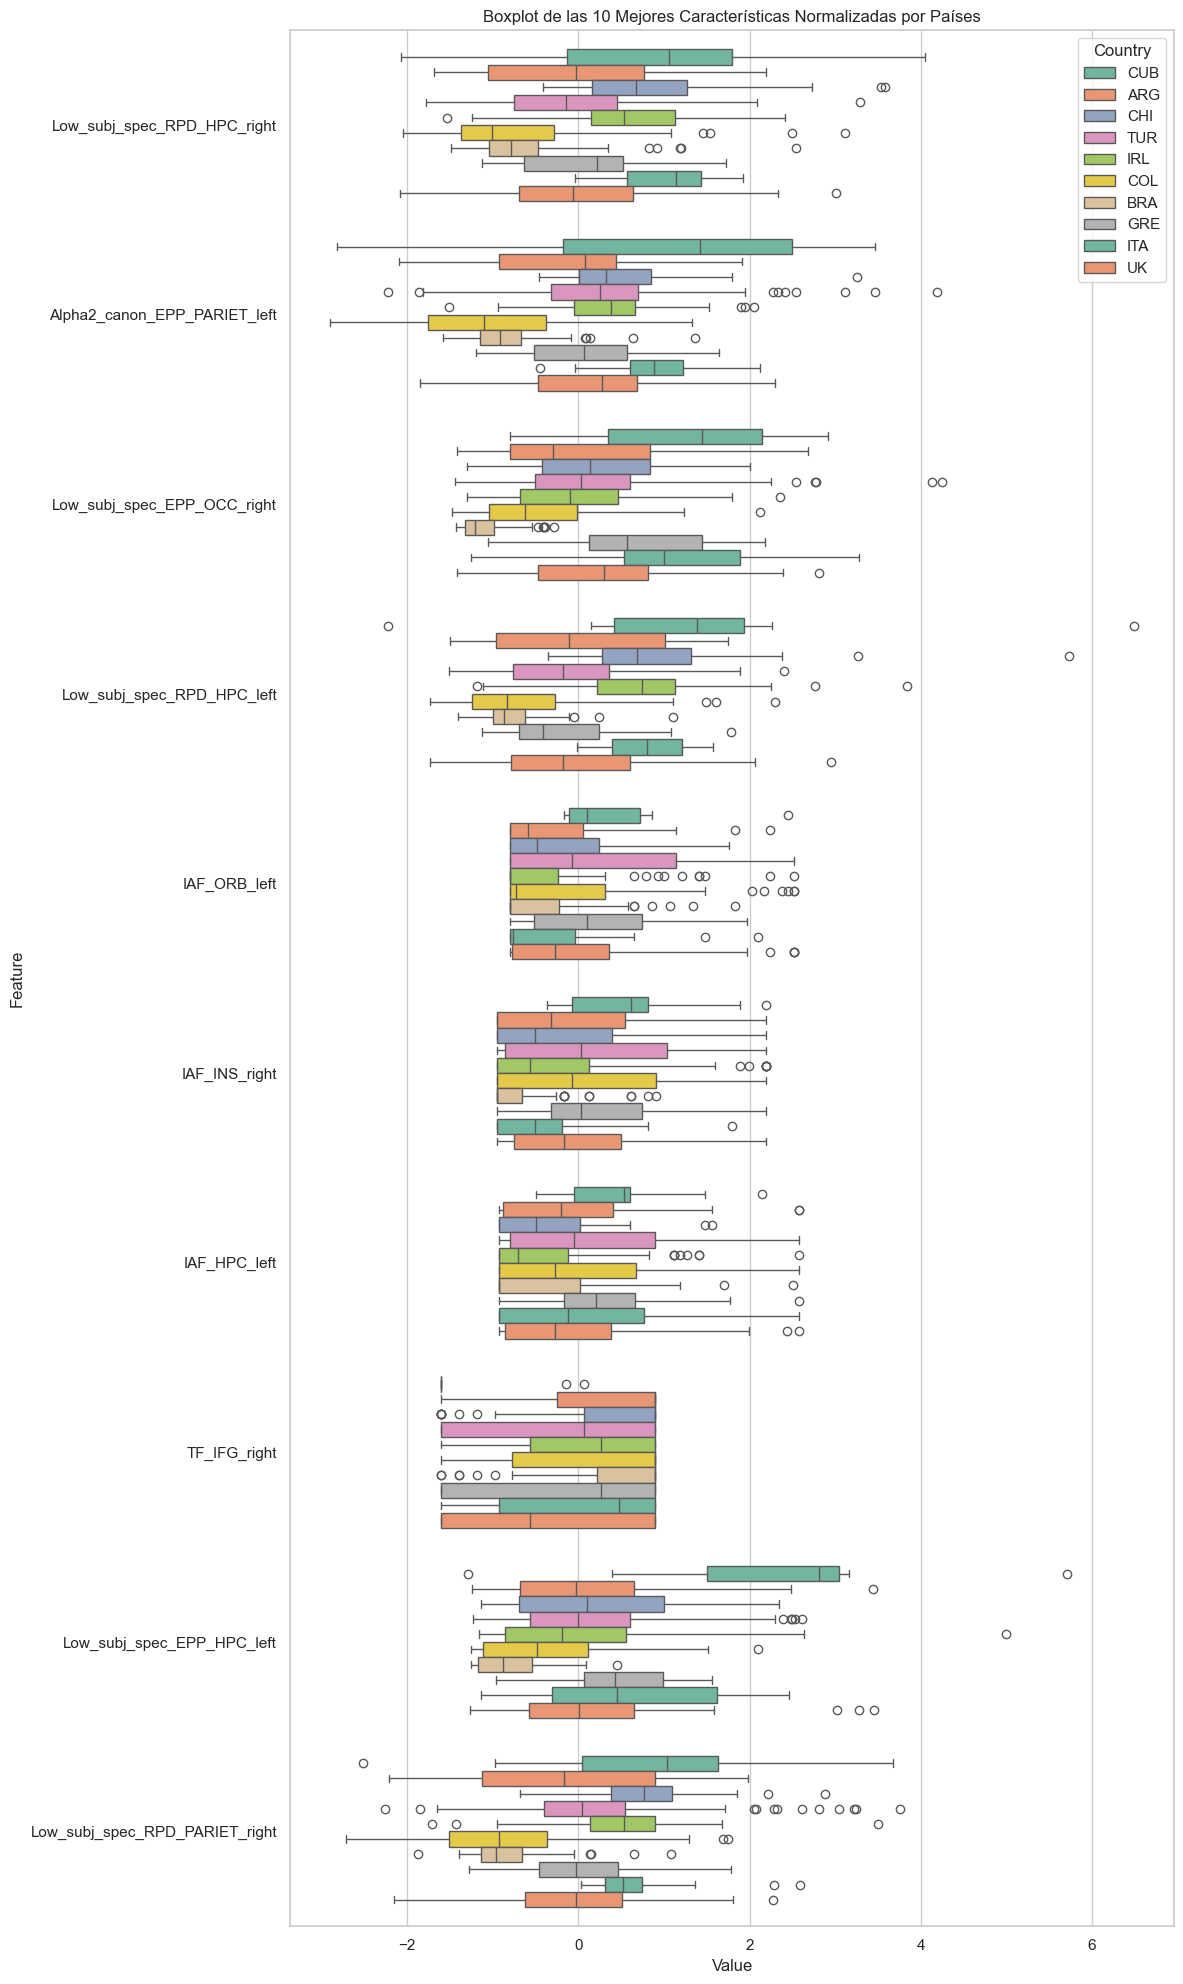

In [181]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las primeras 10 características más importantes
first_10_features = [item[0] for item in shap_summary_sorted_CN[:10]]

# Filtrar el DataFrame para las características seleccionadas
df_CN_top_10 = df_CN_filtrado[['Country'] + first_10_features]

# Aplicar StandardScaler para normalizar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_CN_top_10[first_10_features])

# Crear un nuevo DataFrame con las características normalizadas
df_CN_top_10_scaled = pd.DataFrame(scaled_features, columns=first_10_features)

# Agregar la columna 'Country' al DataFrame normalizado
df_CN_top_10_scaled['Country'] = df_CN_top_10['Country']

# Convertir el DataFrame a formato largo para el boxplot
df_long = df_CN_top_10_scaled.melt(id_vars=['Country'], value_vars=first_10_features,
                                    var_name='Feature', value_name='Value')

# Graficar el boxplot horizontal
plt.figure(figsize=(12, 20))
sns.boxplot(data=df_long, y='Feature', x='Value', hue='Country', palette='Set2')

# Ajustar el gráfico
plt.title('Boxplot de las 10 Mejores Características Normalizadas por Países')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


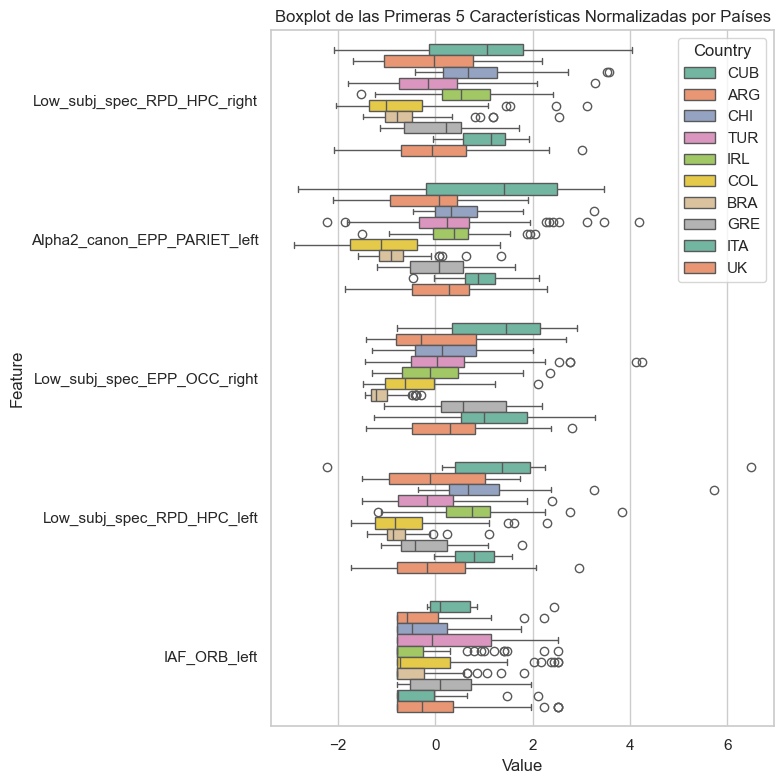

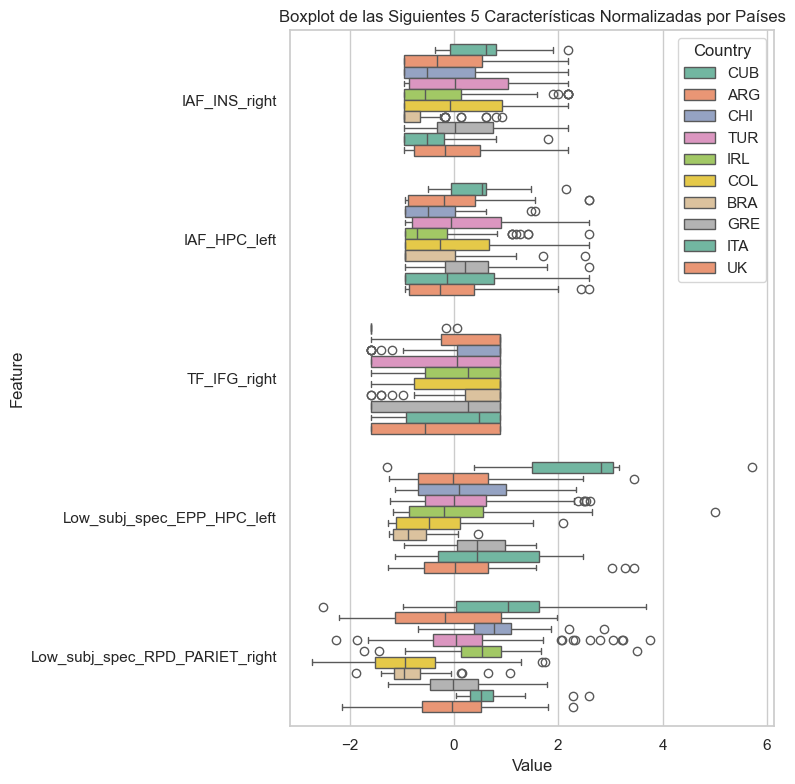

In [184]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dividir las primeras 10 características en dos grupos
first_5_features = first_10_features[:5]
next_5_features = first_10_features[5:]

# Función para generar boxplots para un grupo de características
def plot_boxplot(features, title):
    # Filtrar y escalar las características seleccionadas
    scaled_features = scaler.fit_transform(df_CN_top_10[features])

    # Crear un nuevo DataFrame con las características normalizadas
    df_scaled = pd.DataFrame(scaled_features, columns=features)

    # Agregar la columna 'Country'
    df_scaled['Country'] = df_CN_top_10['Country']

    # Convertir a formato largo
    df_long = df_scaled.melt(id_vars=['Country'], value_vars=features,
                              var_name='Feature', value_name='Value')

    # Graficar el boxplot horizontal
    plt.figure(figsize=(8, 8))
    sns.boxplot(data=df_long, y='Feature', x='Value', hue='Country', palette='Set2')

    # Ajustar el gráfico
    plt.title(title)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Graficar el primer grupo de características
plot_boxplot(first_5_features, 'Boxplot de las Primeras 5 Características Normalizadas por Países')

# Graficar el segundo grupo de características
plot_boxplot(next_5_features, 'Boxplot de las Siguientes 5 Características Normalizadas por Países')


# Analisis de los mejores shap sin Cuba

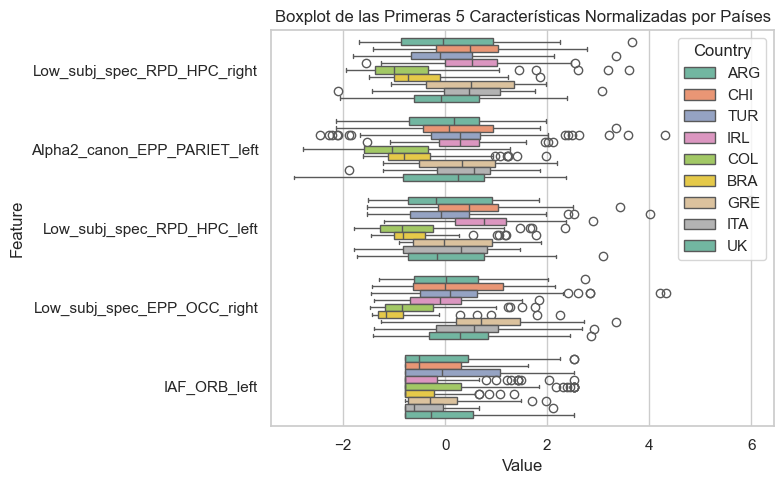

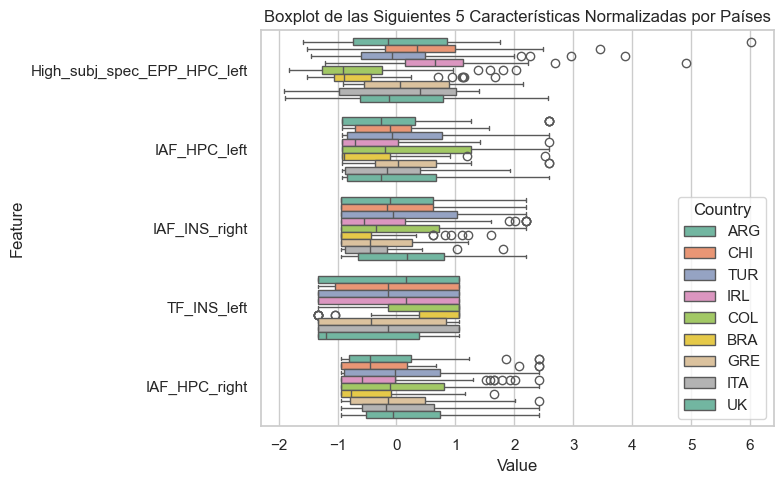

In [188]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las primeras 10 características más importantes
first_10_features = [item[0] for item in shap_summary_sorted_CN_sin_cuba[:10]]

# Dividir las características en dos grupos (primeras 5 y siguientes 5)
first_5_features = first_10_features[:5]
second_5_features = first_10_features[5:]

# Función para graficar el boxplot
def plot_boxplot(features, df, title):
    # Filtrar el DataFrame para las características seleccionadas
    df_top_features = df[['Country'] + features]

    # Aplicar StandardScaler para normalizar las características
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_top_features[features])

    # Crear un nuevo DataFrame con las características normalizadas
    df_scaled = pd.DataFrame(scaled_features, columns=features)

    # Agregar la columna 'Country' al DataFrame normalizado
    df_scaled['Country'] = df_top_features['Country']

    # Convertir el DataFrame a formato largo para el boxplot
    df_long = df_scaled.melt(id_vars=['Country'], value_vars=features,
                             var_name='Feature', value_name='Value')

    # Graficar el boxplot horizontal
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_long, y='Feature', x='Value', hue='Country', palette='Set2')

    # Ajustar el gráfico
    plt.title(title)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Graficar las primeras 5 características
plot_boxplot(first_5_features, df_CN_filtrado_sin_cuba, 'Boxplot de las Primeras 5 Características Normalizadas por Países')

# Graficar las siguientes 5 características
plot_boxplot(second_5_features, df_CN_filtrado_sin_cuba, 'Boxplot de las Siguientes 5 Características Normalizadas por Países')


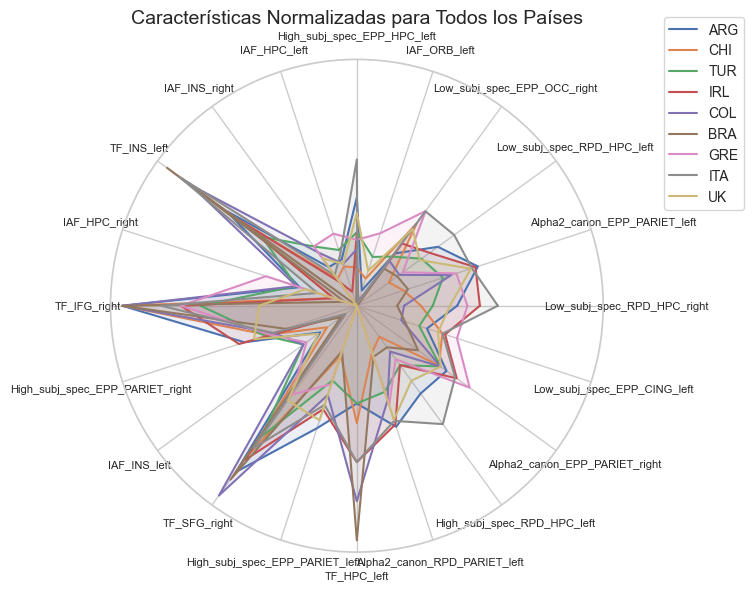

In [145]:
import matplotlib.pyplot as plt
from math import pi
import pandas as pd

# Obtener las 20 mejores características
top_20_features = [item[0] for item in shap_summary_sorted_CN_sin_cuba[:20]]

# Función para crear un gráfico de radar
def plot_radar(data, country, ax):
    # Número de variables
    categories = list(data.index)
    N = len(categories)
    
    # Ángulos para cada eje
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Tomar los valores para el paísc
    values = data.values.flatten().tolist()
    values += values[:1]
    
    # Graficar los valores
    ax.plot(angles, values, label=country)
    ax.fill(angles, values, alpha=0.1)
    
    # Ajustes del gráfico
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.set_yticks([])

# Filtrar el DataFrame para las 20 mejores características
df_CN_top_20 = df_CN_filtrado_sin_cuba[top_20_features]

# Crear la figura y el gráfico de radar
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Graficar un radar chart por cada país en la misma circunferencia
for country in df_CN_filtrado_sin_cuba['Country'].unique():
    country_data = df_CN_top_20[df_CN_filtrado_sin_cuba['Country'] == country]
    # Calcular la mediana y normalizar
    normalized_data = (country_data.median() - country_data.min()) / (country_data.max() - country_data.min())
    plot_radar(normalized_data, country, ax)

# Añadir título y leyenda
plt.title('Características Normalizadas para Todos los Países', size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

# Ajustar el layout
plt.tight_layout()
plt.show()


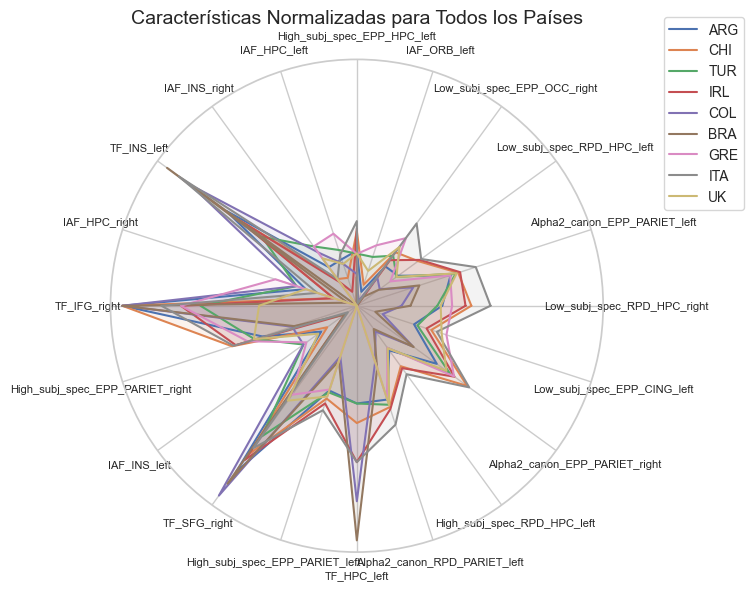

In [149]:
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Obtener las 20 mejores características
top_20_features = [item[0] for item in shap_summary_sorted_CN_sin_cuba[:20]]

# Función para crear un gráfico de radar
def plot_radar(data, country, ax):
    # Número de variables
    categories = list(data.index)
    N = len(categories)
    
    # Ángulos para cada eje
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Tomar los valores para el país
    values = data.values.flatten().tolist()
    values += values[:1]
    
    # Graficar los valores
    ax.plot(angles, values, label=country)
    ax.fill(angles, values, alpha=0.1)
    
    # Ajustes del gráfico
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.set_yticks([])

# Filtrar el DataFrame para las 20 mejores características
df_CN_top_20 = df_CN_filtrado_sin_cuba[top_20_features]

# Normalizar las características para cada país usando MinMaxScaler
scaler = MinMaxScaler()
df_CN_top_20_scaled = pd.DataFrame(scaler.fit_transform(df_CN_top_20), columns=top_20_features)

# Agregar la columna 'Country' al DataFrame normalizado
df_CN_top_20_scaled['Country'] = df_CN_filtrado_sin_cuba['Country'].values

# Crear la figura y el gráfico de radar
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Graficar un radar chart por cada país en la misma circunferencia
for country in df_CN_filtrado_sin_cuba['Country'].unique():
    country_data = df_CN_top_20_scaled[df_CN_top_20_scaled['Country'] == country].drop(columns='Country')
    # Calcular la mediana de las características normalizadas
    normalized_data = country_data.median()
    plot_radar(normalized_data, country, ax)

# Añadir título y leyenda
plt.title('Características Normalizadas para Todos los Países', size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

# Ajustar el layout
plt.tight_layout()
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_185288\4156174523.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_filtrado_sin_cuba['AgeGroup'] = df_CN_filtrado_sin_cuba['Age'].apply(assign_age_group)


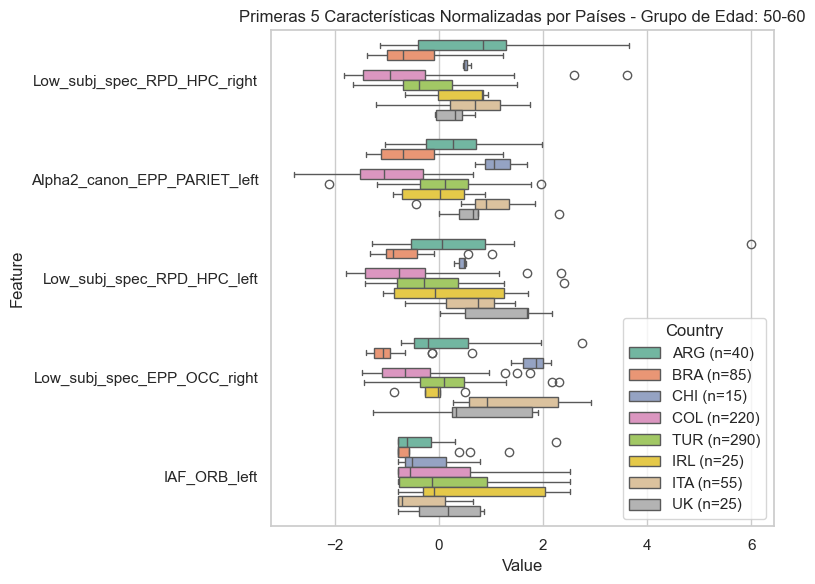

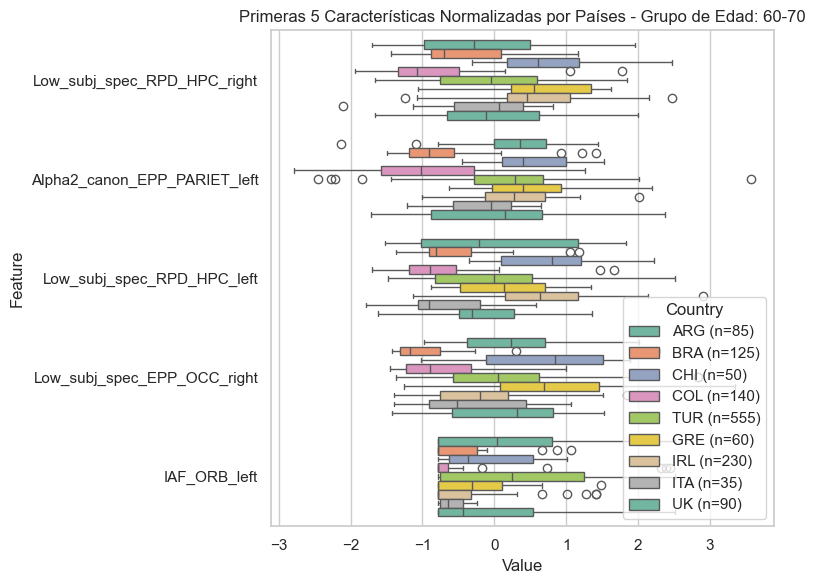

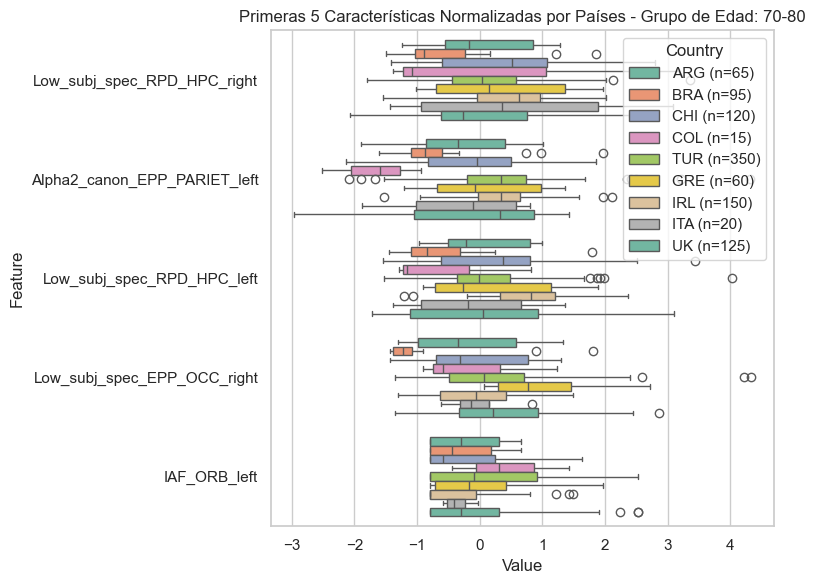

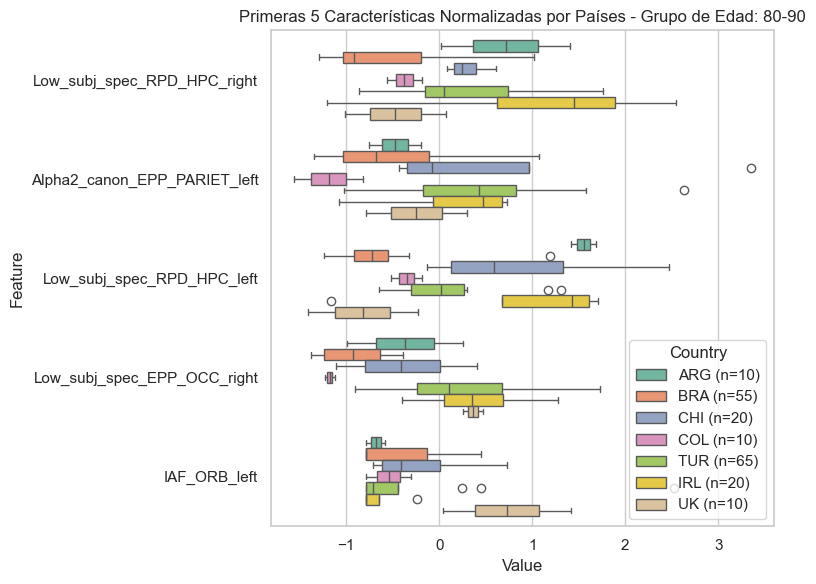

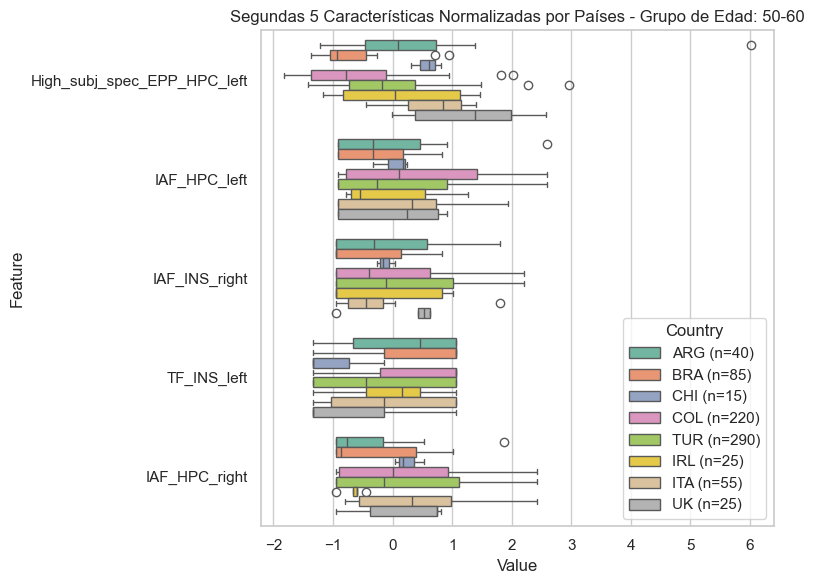

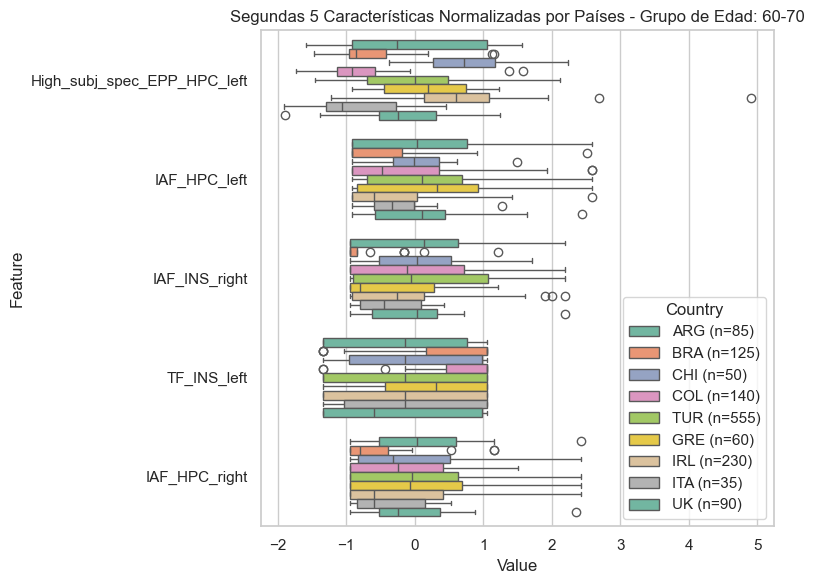

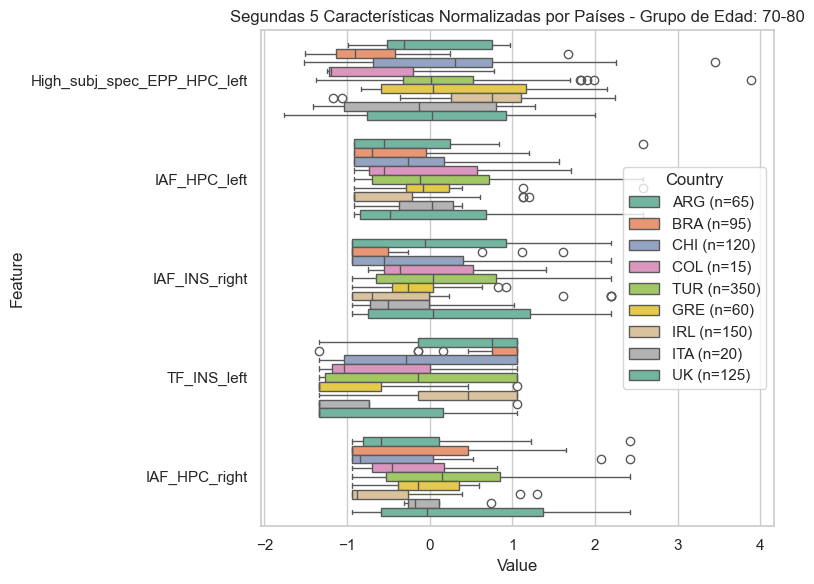

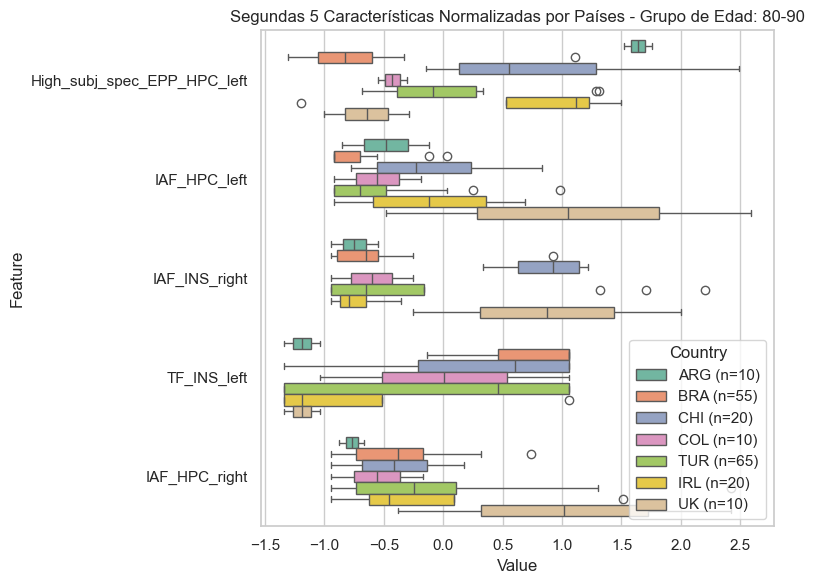

In [192]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Obtener las primeras 10 características más importantes
first_10_features = [item[0] for item in shap_summary_sorted_CN_sin_cuba[:10]]

# Dividir las características en dos grupos (primeras 5 y siguientes 5)
first_5_features = first_10_features[:5]
second_5_features = first_10_features[5:]

# Mapa de continentes/regiones
continent_map = {
    'ARG': 'América Latina',
    'CHI': 'América Latina',
    'COL': 'América Latina',
    'BRA': 'América Latina',
    'TUR': 'Turquía',
    'IRL': 'Europa',
    'GRE': 'Europa',
    'ITA': 'Europa',
    'UK': 'Europa'
}

# Función para agregar una columna con el grupo de edad por décadas
def assign_age_group(age):
    if 50 <= age < 60:
        return '50-60'
    elif 60 <= age < 70:
        return '60-70'
    elif 70 <= age < 80:
        return '70-80'
    elif 80 <= age < 90:
        return '80-90'
    else:
        return 'Other'

# Agregar columna de grupos de edad al DataFrame
df_CN_filtrado_sin_cuba['AgeGroup'] = df_CN_filtrado_sin_cuba['Age'].apply(assign_age_group)

# Función para graficar el boxplot
def plot_boxplot(features, df, title, group_col):
    # Filtrar el DataFrame para las características seleccionadas
    df_top_features = df[['Country', 'AgeGroup'] + features]

    # Aplicar StandardScaler para normalizar las características
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_top_features[features])

    # Crear un nuevo DataFrame con las características normalizadas
    df_scaled = pd.DataFrame(scaled_features, columns=features)

    # Agregar las columnas 'Country', 'AgeGroup' y 'Continent' al DataFrame normalizado
    df_scaled['Country'] = df_top_features['Country']
    df_scaled['AgeGroup'] = df_top_features['AgeGroup']
    df_scaled['Continent'] = df_scaled['Country'].map(continent_map)

    # Convertir el DataFrame a formato largo para el boxplot
    df_long = df_scaled.melt(id_vars=['Country', 'AgeGroup', 'Continent'], value_vars=features,
                             var_name='Feature', value_name='Value')

    # Iterar sobre los grupos de edad y generar gráficos separados
    for age_group, df_group in df_long.groupby('AgeGroup'):
        # Calcular el número de sujetos por país
        subject_counts = df_group['Country'].value_counts()

        # Crear etiquetas para mostrar en el gráfico
        labels = [f"{country} (n={count})" for country, count in subject_counts.items()]
        country_label_map = dict(zip(subject_counts.index, labels))

        # Reemplazar los nombres de los países por las etiquetas
        df_group['Country'] = df_group['Country'].map(country_label_map)

        # Ordenar por continente y país
        continent_order = ['América Latina', 'Turquía', 'Europa']
        df_group['Continent'] = pd.Categorical(df_group['Continent'], categories=continent_order, ordered=True)
        df_group = df_group.sort_values(['Continent', 'Country'])

        # Graficar
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df_group, y='Feature', x='Value', hue='Country', palette='Set2')

        # Ajustar el gráfico
        plt.title(f"{title} - Grupo de Edad: {age_group}")
        plt.tight_layout()

        # Mostrar el gráfico
        plt.show()

# Graficar las primeras 5 características
plot_boxplot(first_5_features, df_CN_filtrado_sin_cuba, 'Primeras 5 Características Normalizadas por Países', 'AgeGroup')

# Graficar las siguientes 5 características
plot_boxplot(second_5_features, df_CN_filtrado_sin_cuba, 'Segundas 5 Características Normalizadas por Países', 'AgeGroup')


# Pesos del modelo

In [179]:
import numpy as np

# Suponiendo que `results_model_sin_cuba['model']` contiene los modelos entrenados
modelos = results_model_sin_cuba['model']

# Lista para almacenar los coeficientes de cada modelo
pesos_modelos = []

for modelo in modelos:
    pesos_modelos.append(modelo.coef_)

# Convertir a un arreglo de NumPy para facilitar operaciones
pesos_modelos = np.array(pesos_modelos)

# Calcular el promedio de los pesos
pesos_promedio = np.mean(pesos_modelos, axis=0)

print("Pesos promedio de los modelos:")
print(pesos_promedio)


Pesos promedio de los modelos:
[ 0.00000000e+00  0.00000000e+00  3.45354327e-01  1.34555016e-02
  0.00000000e+00 -5.73068619e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.57402520e-02  3.66390167e-04
  0.00000000e+00 -3.07206031e-03  1.39367464e-01  1.45678749e-03
  0.00000000e+00  0.00000000e+00  3.51841117e-02  5.19980919e-02
  0.00000000e+00  0.00000000e+00  1.36934569e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.67929579e-03  5.60981065e-03
  0.00000000e+00  0.00000000e+00 -4.82826121e-03  0.00000000e+00
  9.91846805e-03  5.84828671e-03  0.00000000e+00  0.00000000e+00
 -2.10189740e-03 -2.65435059e-01  2.77311832e-01  3.29723196e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.67352216e-03
  0.00000000e+00  0.00000000e+00  4.59707584e-04  8.94534812e-04
  0.00000000e+00  4.91655967e-02  0.00000000e+00 -9.61136802e-04
 -7.45623916e-03 -4.08253445e-02  2.70272437e-02  2.29913389e-03
 -5.21394507e-02  0.00000000e+00  1.91041570e-01  7.1146855

In [180]:
import pandas as pd
import numpy as np

# Suponiendo que `features` es una lista de las columnas relevantes
features = df_CN_filtrado_sin_cuba[features].columns.tolist()

# Asegúrate de que el número de características coincida con los pesos promedio
if len(features) != len(pesos_promedio):
    raise ValueError("El número de características no coincide con el número de pesos promedio.")

# Crear un dataframe para visualizar nombres de características y sus pesos promedio
pesos_df = pd.DataFrame({
    'Característica': features,
    'Peso promedio': pesos_promedio
})

print("Pesos promedio asociados a las características:")
print(pesos_df)


Pesos promedio asociados a las características:
                   Característica  Peso promedio
0       Alpha2_canon_EPP_HPC_left       0.000000
1      Alpha2_canon_EPP_HPC_right       0.000000
2    Alpha2_canon_EPP_PARIET_left       0.345354
3   Alpha2_canon_EPP_PARIET_right       0.013456
4       Alpha2_canon_EPP_OCC_left       0.000000
..                            ...            ...
67                  IAF_HPC_right      -0.054914
68                   IAF_INS_left      -0.044728
69                  IAF_INS_right      -0.110355
70                   IAF_OCC_left      -0.006727
71                  IAF_OCC_right      -0.003387

[72 rows x 2 columns]


In [175]:
pesos_df = pesos_df.sort_values(by='Peso promedio', ascending=False)


In [178]:
pesos_df.head(20)

Característica  Peso promedio Signo
2      Alpha2_canon_EPP_PARIET_left       0.345354     +
39      Low_subj_spec_RPD_HPC_right       0.329723     +
38       Low_subj_spec_RPD_HPC_left       0.277312     +
37      Low_subj_spec_EPP_OCC_right      -0.265435     -
58                     IAF_ORB_left       0.191042     +
66                     IAF_HPC_left      -0.147026     -
14      High_subj_spec_EPP_HPC_left       0.139367     +
69                    IAF_INS_right      -0.110355     -
67                    IAF_HPC_right      -0.054914     -
56                      TF_INS_left      -0.052139     -
19  High_subj_spec_EPP_PARIET_right       0.051998     +
49                     TF_IFG_right       0.049166     +
68                     IAF_INS_left      -0.044728     -
53                     TF_SFG_right      -0.040825     -
18   High_subj_spec_EPP_PARIET_left       0.035184     +
54                      TF_HPC_left       0.027027     +
10     Alpha2_canon_RPD_PARIET_left       0.015740     +
22      High_subj_spec_RPD_HPC_left       0.013693     +
3     Alpha2_canon_EPP_PARIET_right       0.013456     +
32      Low_subj_spec_EPP_CING_left       0.009918     +

In [177]:
# Agregar una columna para el signo (+ o -)
pesos_df['Signo'] = pesos_df['Peso promedio'].apply(lambda x: '+' if x > 0 else '-')

# Ordenar por el valor absoluto del peso promedio
pesos_df = pesos_df.reindex(pesos_df['Peso promedio'].abs().sort_values(ascending=False).index)

# Mostrar el dataframe ordenado
print(pesos_df)


                   Característica  Peso promedio Signo
2    Alpha2_canon_EPP_PARIET_left       0.345354     +
39    Low_subj_spec_RPD_HPC_right       0.329723     +
38     Low_subj_spec_RPD_HPC_left       0.277312     +
37    Low_subj_spec_EPP_OCC_right      -0.265435     -
58                   IAF_ORB_left       0.191042     +
..                            ...            ...   ...
12      Alpha2_canon_RPD_OCC_left       0.000000     -
16   High_subj_spec_EPP_CING_left       0.000000     -
17  High_subj_spec_EPP_CING_right       0.000000     -
20    High_subj_spec_EPP_OCC_left       0.000000     -
29   High_subj_spec_RPD_OCC_right       0.000000     -

[72 rows x 3 columns]


# Correlaciones

     correlation   p_value
ARG    -0.027227  0.867550
CHI    -0.091141  0.529037
TUR     0.111917  0.076167
IRL    -0.042403  0.699999
COL     0.013022  0.910505
BRA    -0.016175  0.892726
GRE     0.044132  0.837760
ITA    -0.090705  0.688097
UK      0.161716  0.261868


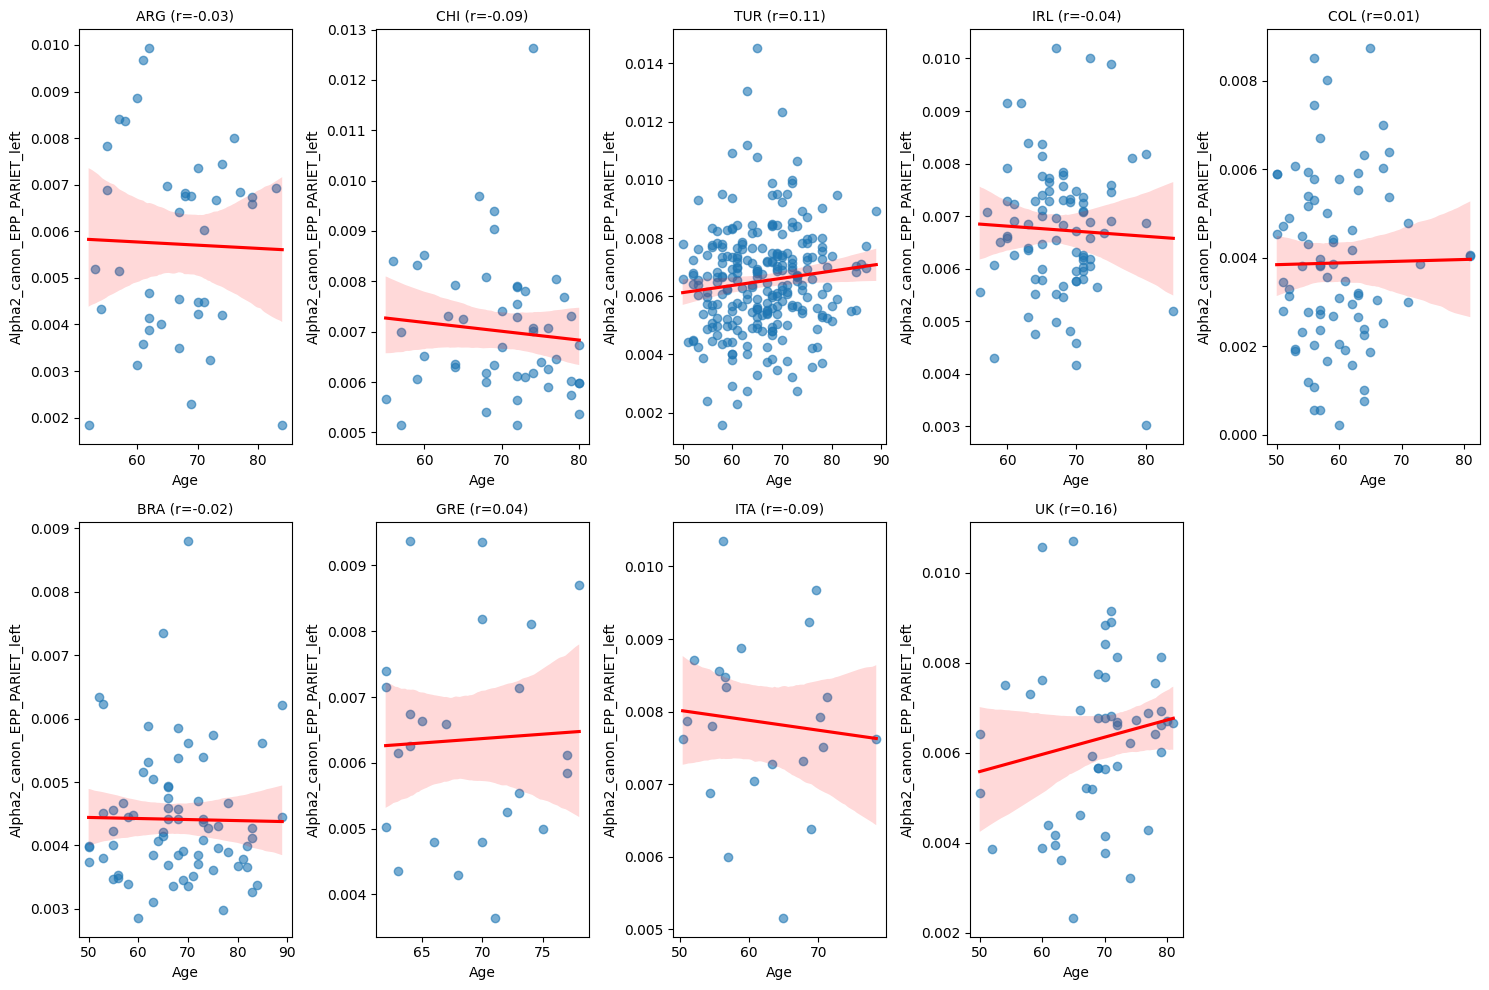

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Filtrar los datos por país y calcular correlaciones
countries = df_CN_filtrado_sin_cuba['Country'].unique()
correlations = {}

for country in countries:
    subset = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Country'] == country]
    if len(subset) > 1:  # Asegurarse de que hay suficientes datos para calcular la correlación
        r, p = pearsonr(subset['Alpha2_canon_EPP_PARIET_left'], subset['Age'])
        correlations[country] = {'correlation': r, 'p_value': p}
    else:
        correlations[country] = {'correlation': None, 'p_value': None}

# Mostrar las correlaciones
correlations_df = pd.DataFrame.from_dict(correlations, orient='index')
print(correlations_df)

# Crear gráficos de dispersión con línea de tendencia por país
plt.figure(figsize=(15, 10))
for i, country in enumerate(countries, 1):
    subset = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Country'] == country]
    plt.subplot(2, (len(countries) + 1) // 2, i)  # Organizar los gráficos en una cuadrícula
    sns.regplot(
        data=subset,
        x='Age',
        y='Alpha2_canon_EPP_PARIET_left',
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f'{country} (r={correlations[country]["correlation"]:.2f})', fontsize=10)
    plt.xlabel('Age')
    plt.ylabel('Alpha2_canon_EPP_PARIET_left')

plt.tight_layout()
plt.show()


     correlation   p_value
ARG    -0.027227  0.867550
CHI    -0.091141  0.529037
TUR     0.111917  0.076167
IRL    -0.042403  0.699999
COL     0.013022  0.910505
BRA    -0.016175  0.892726
GRE     0.044132  0.837760
ITA    -0.090705  0.688097
UK      0.161716  0.261868


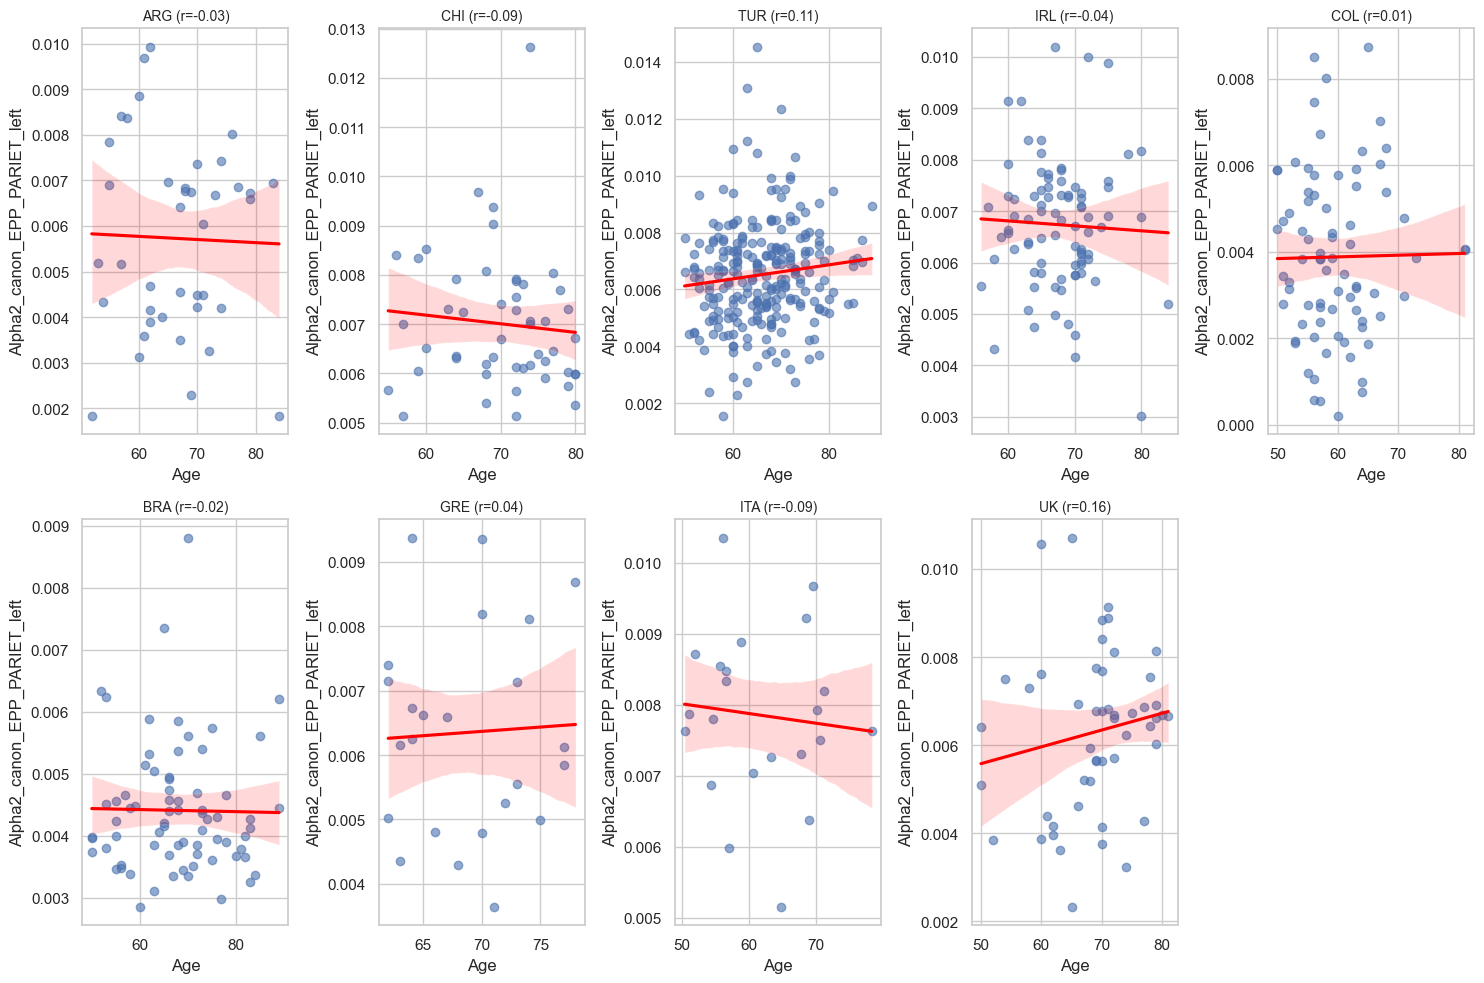

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Filtrar los datos por país y calcular correlaciones
countries = df_CN_filtrado_sin_cuba['Country'].unique()
correlations = {}

for country in countries:
    subset = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Country'] == country]
    if len(subset) > 1:  # Asegurarse de que hay suficientes datos para calcular la correlación
        r, p = pearsonr(subset['Alpha2_canon_EPP_PARIET_left'], subset['Age'])
        correlations[country] = {'correlation': r, 'p_value': p}
    else:
        correlations[country] = {'correlation': None, 'p_value': None}

# Mostrar las correlaciones
correlations_df = pd.DataFrame.from_dict(correlations, orient='index')
print(correlations_df)

# Crear gráficos de dispersión con línea de tendencia por país
plt.figure(figsize=(15, 10))
for i, country in enumerate(countries, 1):
    subset = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Country'] == country]
    plt.subplot(2, (len(countries) + 1) // 2, i)  # Organizar los gráficos en una cuadrícula
    sns.regplot(
        data=subset,
        x='Age',
        y='Alpha2_canon_EPP_PARIET_left',
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f'{country} (r={correlations[country]["correlation"]:.2f})', fontsize=10)
    plt.xlabel('Age')
    plt.ylabel('Alpha2_canon_EPP_PARIET_left')

plt.tight_layout()
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2131866040.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)


                correlation   p_value
América Latina     0.196816  0.002238
Turquía            0.111917  0.076167
Europa            -0.054802  0.463722


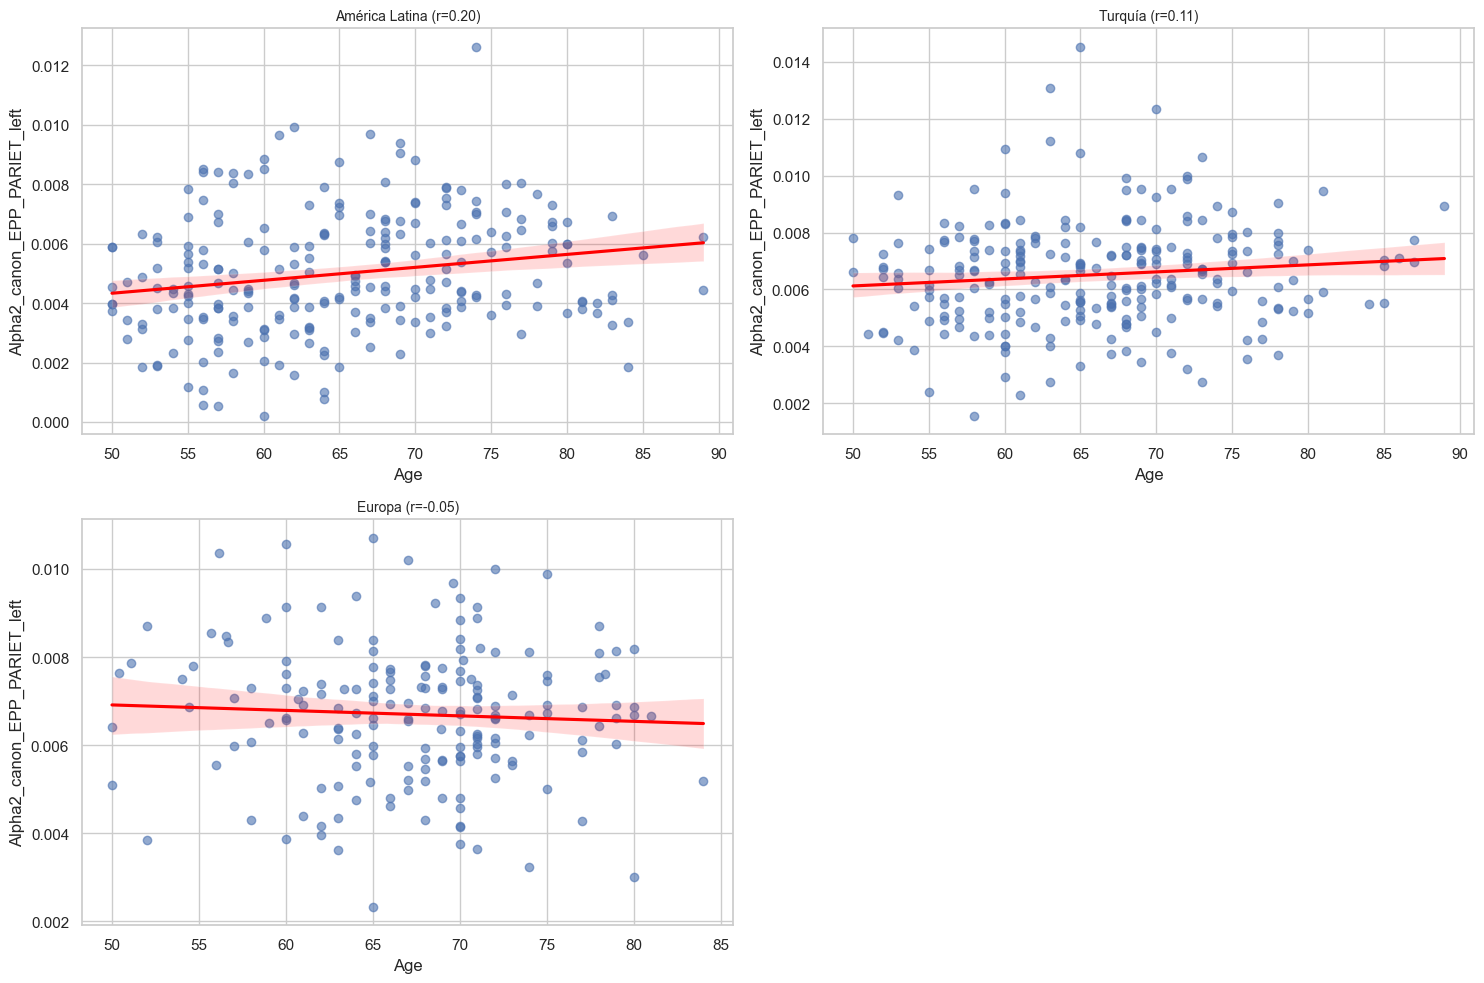

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Mapeo de países a regiones
continent_map = {
    'ARG': 'América Latina',
    'CHI': 'América Latina',
    'COL': 'América Latina',
    'BRA': 'América Latina',
    'TUR': 'Turquía',
    'IRL': 'Europa',
    'GRE': 'Europa',
    'ITA': 'Europa',
    'UK': 'Europa'
}

# Añadir columna de región al dataframe
df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)

# Filtrar los datos por región y calcular correlaciones
regions = df_CN_filtrado_sin_cuba['Region'].unique()
correlations = {}

for region in regions:
    subset = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Region'] == region]
    if len(subset) > 1:  # Asegurarse de que hay suficientes datos para calcular la correlación
        r, p = pearsonr(subset['Alpha2_canon_EPP_PARIET_left'], subset['Age'])
        correlations[region] = {'correlation': r, 'p_value': p}
    else:
        correlations[region] = {'correlation': None, 'p_value': None}

# Mostrar las correlaciones
correlations_df = pd.DataFrame.from_dict(correlations, orient='index')
print(correlations_df)

# Crear gráficos de dispersión con línea de tendencia por región
plt.figure(figsize=(15, 10))
for i, region in enumerate(regions, 1):
    subset = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Region'] == region]
    plt.subplot(2, (len(regions) + 1) // 2, i)  # Organizar los gráficos en una cuadrícula
    sns.regplot(
        data=subset,
        x='Age',
        y='Alpha2_canon_EPP_PARIET_left',
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f'{region} (r={correlations[region]["correlation"]:.2f})', fontsize=10)
    plt.xlabel('Age')
    plt.ylabel('Alpha2_canon_EPP_PARIET_left')

plt.tight_layout()
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_309712\2131866040.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)


                correlation   p_value
América Latina     0.196816  0.002238
Turquía            0.111917  0.076167
Europa            -0.054802  0.463722


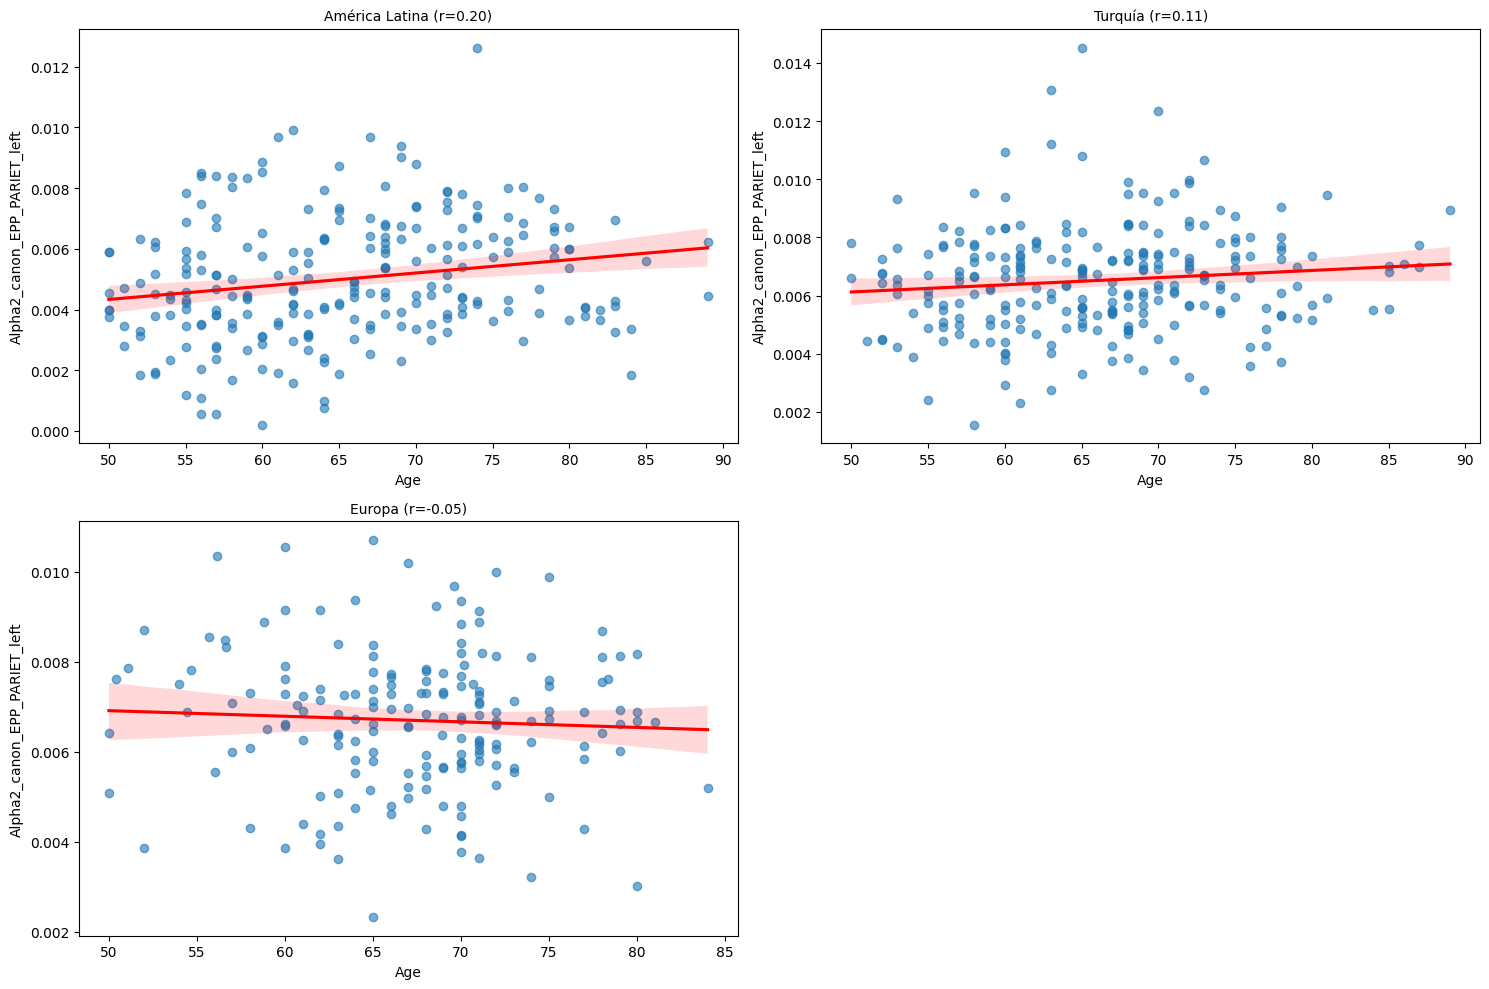

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Mapeo de países a regiones
continent_map = {
    'ARG': 'América Latina',
    'CHI': 'América Latina',
    'COL': 'América Latina',
    'BRA': 'América Latina',
    'TUR': 'Turquía',
    'IRL': 'Europa',
    'GRE': 'Europa',
    'ITA': 'Europa',
    'UK': 'Europa'
}

# Añadir columna de región al dataframe
df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)

# Filtrar los datos por región y calcular correlaciones
regions = df_CN_filtrado_sin_cuba['Region'].unique()
correlations = {}

for region in regions:
    subset = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Region'] == region]
    if len(subset) > 1:  # Asegurarse de que hay suficientes datos para calcular la correlación
        r, p = pearsonr(subset['Alpha2_canon_EPP_PARIET_left'], subset['Age'])
        correlations[region] = {'correlation': r, 'p_value': p}
    else:
        correlations[region] = {'correlation': None, 'p_value': None}

# Mostrar las correlaciones
correlations_df = pd.DataFrame.from_dict(correlations, orient='index')
print(correlations_df)

# Crear gráficos de dispersión con línea de tendencia por región
plt.figure(figsize=(15, 10))
for i, region in enumerate(regions, 1):
    subset = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Region'] == region]
    plt.subplot(2, (len(regions) + 1) // 2, i)  # Organizar los gráficos en una cuadrícula
    sns.regplot(
        data=subset,
        x='Age',
        y='Alpha2_canon_EPP_PARIET_left',
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f'{region} (r={correlations[region]["correlation"]:.2f})', fontsize=10)
    plt.xlabel('Age')
    plt.ylabel('Alpha2_canon_EPP_PARIET_left')

plt.tight_layout()
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2715672042.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)


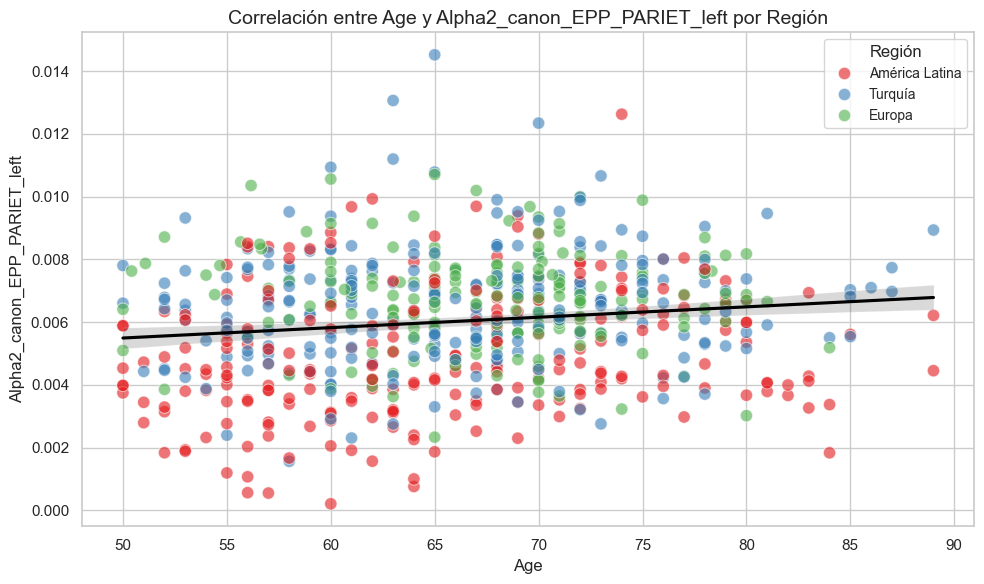

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeo de países a regiones
continent_map = {
    'ARG': 'América Latina',
    'CHI': 'América Latina',
    'COL': 'América Latina',
    'BRA': 'América Latina',
    'TUR': 'Turquía',
    'IRL': 'Europa',
    'GRE': 'Europa',
    'ITA': 'Europa',
    'UK': 'Europa'
}

# Añadir columna de región al dataframe
df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Crear scatter plot con colores diferenciados por región
sns.scatterplot(
    data=df_CN_filtrado_sin_cuba,
    x='Age',
    y='Alpha2_canon_EPP_PARIET_left',
    hue='Region',
    palette='Set1',
    alpha=0.6,
    s=80  # Tamaño de los puntos
)

# Añadir línea de tendencia global
sns.regplot(
    data=df_CN_filtrado_sin_cuba,
    x='Age',
    y='Alpha2_canon_EPP_PARIET_left',
    scatter=False,  # No mostrar puntos
    line_kws={'color': 'black', 'label': 'Tendencia global'}
)

# Personalizar el gráfico
plt.title('Correlación entre Age y Alpha2_canon_EPP_PARIET_left por Región', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Alpha2_canon_EPP_PARIET_left', fontsize=12)
plt.legend(title='Región', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_309712\2715672042.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)


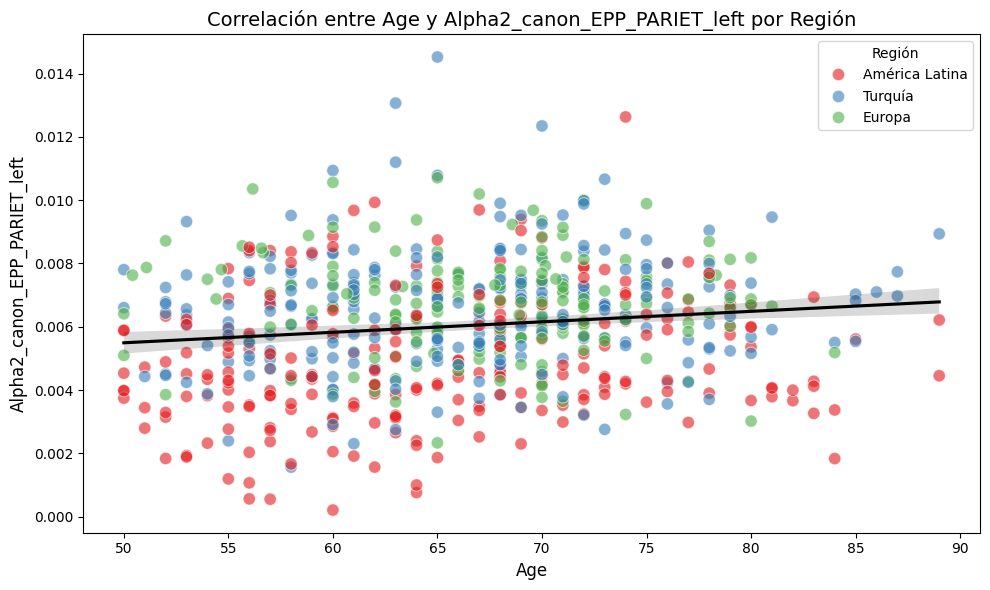

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeo de países a regiones
continent_map = {
    'ARG': 'América Latina',
    'CHI': 'América Latina',
    'COL': 'América Latina',
    'BRA': 'América Latina',
    'TUR': 'Turquía',
    'IRL': 'Europa',
    'GRE': 'Europa',
    'ITA': 'Europa',
    'UK': 'Europa'
}

# Añadir columna de región al dataframe
df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Crear scatter plot con colores diferenciados por región
sns.scatterplot(
    data=df_CN_filtrado_sin_cuba,
    x='Age',
    y='Alpha2_canon_EPP_PARIET_left',
    hue='Region',
    palette='Set1',
    alpha=0.6,
    s=80  # Tamaño de los puntos
)

# Añadir línea de tendencia global
sns.regplot(
    data=df_CN_filtrado_sin_cuba,
    x='Age',
    y='Alpha2_canon_EPP_PARIET_left',
    scatter=False,  # No mostrar puntos
    line_kws={'color': 'black', 'label': 'Tendencia global'}
)

# Personalizar el gráfico
plt.title('Correlación entre Age y Alpha2_canon_EPP_PARIET_left por Región', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Alpha2_canon_EPP_PARIET_left', fontsize=12)
plt.legend(title='Región', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_185288\4232208409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)


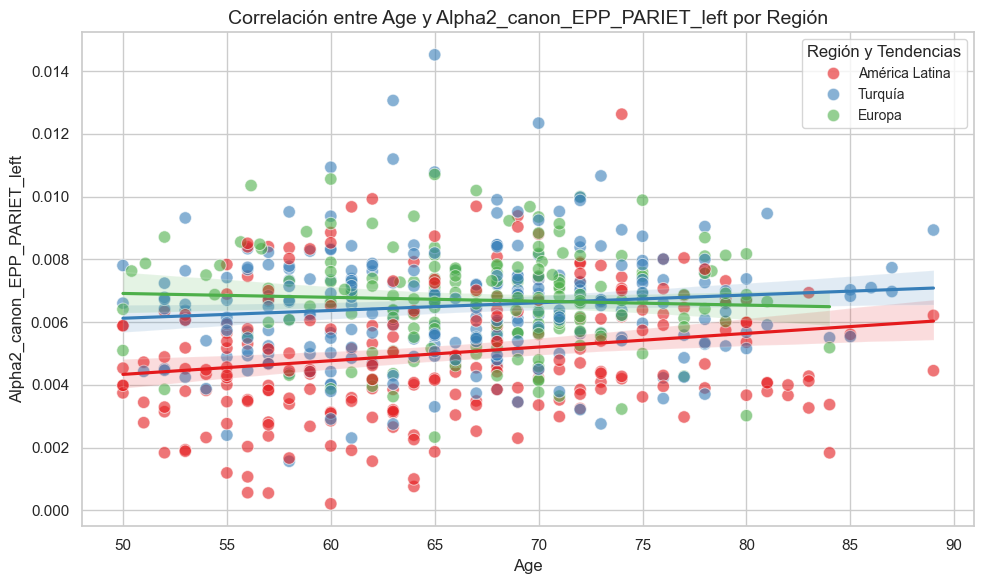

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeo de países a regiones
continent_map = {
    'ARG': 'América Latina',
    'CHI': 'América Latina',
    'COL': 'América Latina',
    'BRA': 'América Latina',
    'TUR': 'Turquía',
    'IRL': 'Europa',
    'GRE': 'Europa',
    'ITA': 'Europa',
    'UK': 'Europa'
}

# Añadir columna de región al dataframe
df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Crear scatter plot con colores diferenciados por región
sns.scatterplot(
    data=df_CN_filtrado_sin_cuba,
    x='Age',
    y='Alpha2_canon_EPP_PARIET_left',
    hue='Region',
    palette='Set1',
    alpha=0.6,
    s=80  # Tamaño de los puntos
)

# Ajustar y agregar líneas de tendencia separadas por región
regions = df_CN_filtrado_sin_cuba['Region'].unique()
palette = sns.color_palette('Set1', len(regions))

for i, region in enumerate(regions):
    subset = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Region'] == region]
    sns.regplot(
        data=subset,
        x='Age',
        y='Alpha2_canon_EPP_PARIET_left',
        scatter=False,  # No duplicar puntos
        line_kws={'color': palette[i], 'label': f'Tendencia - {region}'}
    )

# Personalizar el gráfico
plt.title('Correlación entre Age y Alpha2_canon_EPP_PARIET_left por Región', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Alpha2_canon_EPP_PARIET_left', fontsize=12)
plt.legend(title='Región y Tendencias', fontsize=10, loc='best')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_309712\4232208409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)


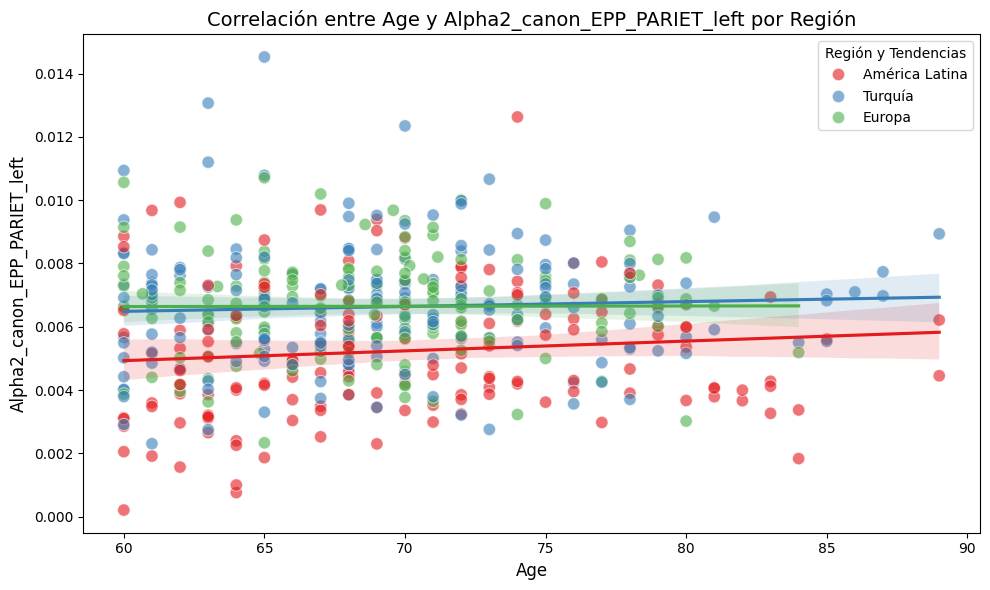

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeo de países a regiones
continent_map = {
    'ARG': 'América Latina',
    'CHI': 'América Latina',
    'COL': 'América Latina',
    'BRA': 'América Latina',
    'TUR': 'Turquía',
    'IRL': 'Europa',
    'GRE': 'Europa',
    'ITA': 'Europa',
    'UK': 'Europa'
}

# Añadir columna de región al dataframe
df_CN_filtrado_sin_cuba['Region'] = df_CN_filtrado_sin_cuba['Country'].map(continent_map)

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Crear scatter plot con colores diferenciados por región
sns.scatterplot(
    data=df_CN_filtrado_sin_cuba,
    x='Age',
    y='Alpha2_canon_EPP_PARIET_left',
    hue='Region',
    palette='Set1',
    alpha=0.6,
    s=80  # Tamaño de los puntos
)

# Ajustar y agregar líneas de tendencia separadas por región
regions = df_CN_filtrado_sin_cuba['Region'].unique()
palette = sns.color_palette('Set1', len(regions))

for i, region in enumerate(regions):
    subset = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Region'] == region]
    sns.regplot(
        data=subset,
        x='Age',
        y='Alpha2_canon_EPP_PARIET_left',
        scatter=False,  # No duplicar puntos
        line_kws={'color': palette[i], 'label': f'Tendencia - {region}'}
    )

# Personalizar el gráfico
plt.title('Correlación entre Age y Alpha2_canon_EPP_PARIET_left por Región', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Alpha2_canon_EPP_PARIET_left', fontsize=12)
plt.legend(title='Región y Tendencias', fontsize=10, loc='best')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [198]:
df_CN_filtrado_sin_cuba

Unnamed: 0  Delta_canon_EPP_ORB_left  Delta_canon_EPP_ORB_right  \
9           209                  0.036870                   0.038921   
10          210                  0.027193                   0.030047   
11          211                  0.035372                   0.037476   
12          212                  0.053234                   0.058096   
13          213                  0.039010                   0.040643   
..          ...                       ...                        ...   
676        1443                  0.032968                   0.036678   
677        1444                  0.035464                   0.035469   
678        1446                  0.044759                   0.052309   
679        1447                  0.059905                   0.064894   
680        1448                  0.032594                   0.038136   

     Delta_canon_EPP_IFG_left  Delta_canon_EPP_IFG_right  \
9                    0.038879                   0.033976   
10                   0.031351                   0.029931   
11                   0.040751                   0.041361   
12                   0.046614                   0.041447   
13                   0.036734                   0.036970   
..                        ...                        ...   
676                  0.030297                   0.035435   
677                  0.035834                   0.034404   
678                  0.042457                   0.046901   
679                  0.052238                   0.051449   
680                  0.030101                   0.036569   

     Delta_canon_EPP_MFG_left  Delta_canon_EPP_MFG_right  \
9                    0.035128                   0.029229   
10                   0.035672                   0.027955   
11                   0.030025                   0.035941   
12                   0.054086                   0.045305   
13                   0.033453                   0.041734   
..                        ...                        ...   
676                  0.032923                   0.035019   
677                  0.030824                   0.030423   
678                  0.038112                   0.037699   
679                  0.039586                   0.041117   
680                  0.035927                   0.034773   

     Delta_canon_EPP_SFG_left  Delta_canon_EPP_SFG_right  \
9                    0.039080                   0.039225   
10                   0.028984                   0.029445   
11                   0.035130                   0.035634   
12                   0.042095                   0.040788   
13                   0.037194                   0.039413   
..                        ...                        ...   
676                  0.033158                   0.033050   
677                  0.031417                   0.031326   
678                  0.038526                   0.039239   
679                  0.042107                   0.041310   
680                  0.033520                   0.034468   

     Delta_canon_EPP_HPC_left  ...  Sex  Educ  MMSE    HDI       GINI  \
9                    0.042361  ...  2.0  15.0  29.0  0.851  41.793333   
10                   0.029098  ...  2.0  15.0  30.0  0.851  41.793333   
11                   0.044238  ...  2.0  15.0  30.0  0.851  41.793333   
12                   0.039174  ...  1.0  15.0  28.0  0.851  41.793333   
13                   0.031645  ...  2.0  14.0  27.0  0.851  41.793333   
..                        ...  ...  ...   ...   ...    ...        ...   
676                  0.033604  ...  2.0  12.0  30.0  0.855  44.920000   
677                  0.038548  ...  2.0  17.0  30.0  0.855  44.920000   
678                  0.049349  ...  2.0  17.0  29.0  0.855  44.920000   
679                  0.050399  ...  2.0  12.0  30.0  0.855  44.920000   
680                  0.034192  ...  2.0  22.0  30.0  0.855  44.920000   

           ODQ  ID-unique  Country  AgeGroup          Region  
9    99.483527        209      ARG   

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Crear el mapa de regiones
continent_map = {
    'ARG': 'América Latina',
    'CHI': 'América Latina',
    'COL': 'América Latina',
    'BRA': 'América Latina',
    'TUR': 'Turquía',
    'IRL': 'Europa',
    'GRE': 'Europa',
    'ITA': 'Europa',
    'UK': 'Europa'
}

# Añadir la columna de regiones al dataframe
df = df_CN_filtrado_sin_cuba.copy()
df['Region'] = df['Country'].map(continent_map)

# Validar el resultado
print(df.head())


    Unnamed: 0  Delta_canon_EPP_ORB_left  Delta_canon_EPP_ORB_right  \
9          209                  0.036870                   0.038921   
10         210                  0.027193                   0.030047   
11         211                  0.035372                   0.037476   
12         212                  0.053234                   0.058096   
13         213                  0.039010                   0.040643   

    Delta_canon_EPP_IFG_left  Delta_canon_EPP_IFG_right  \
9                   0.038879                   0.033976   
10                  0.031351                   0.029931   
11                  0.040751                   0.041361   
12                  0.046614                   0.041447   
13                  0.036734                   0.036970   

    Delta_canon_EPP_MFG_left  Delta_canon_EPP_MFG_right  \
9                   0.035128                   0.029229   
10                  0.035672                   0.027955   
11                  0.030025             

C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2583464374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Alpha2_canon_EPP_PARIET_left', palette='Set2')


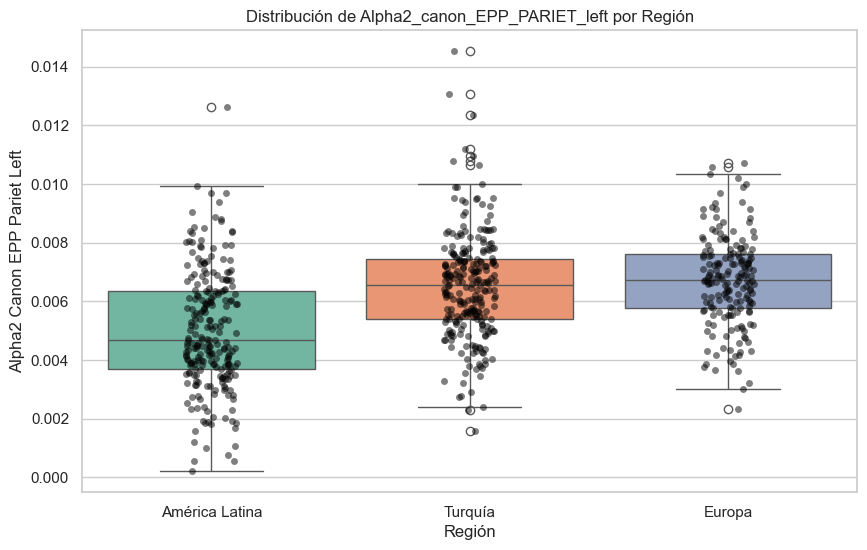

In [200]:
# Boxplot de Alpha2_canon_EPP_PARIET_left por región
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Alpha2_canon_EPP_PARIET_left', palette='Set2')
sns.stripplot(data=df, x='Region', y='Alpha2_canon_EPP_PARIET_left', color='black', alpha=0.5, jitter=True)
plt.title('Distribución de Alpha2_canon_EPP_PARIET_left por Región')
plt.ylabel('Alpha2 Canon EPP Pariet Left')
plt.xlabel('Región')
plt.show()


In [206]:
shap_summary_sorted_CN_sin_cuba

[('Low_subj_spec_RPD_HPC_right', 185.6618308467781),
 ('Alpha2_canon_EPP_PARIET_left', 183.25709418409514),
 ('Low_subj_spec_RPD_HPC_left', 153.2719891151389),
 ('Low_subj_spec_EPP_OCC_right', 145.62635454246578),
 ('IAF_ORB_left', 102.37701904323376),
 ('High_subj_spec_EPP_HPC_left', 79.4630749238148),
 ('IAF_HPC_left', 78.3517889986678),
 ('IAF_INS_right', 61.376362759232954),
 ('TF_INS_left', 32.090685418351384),
 ('IAF_HPC_right', 30.16236129664369),
 ('TF_IFG_right', 29.222876603552464),
 ('High_subj_spec_EPP_PARIET_right', 27.944473255958194),
 ('IAF_INS_left', 25.192467608402424),
 ('TF_SFG_right', 24.645888004550095),
 ('High_subj_spec_EPP_PARIET_left', 18.680365637343748),
 ('TF_HPC_left', 17.0479906399749),
 ('Alpha2_canon_RPD_PARIET_left', 8.50151093538606),
 ('High_subj_spec_RPD_HPC_left', 7.520424977795878),
 ('Alpha2_canon_EPP_PARIET_right', 6.780401484183715),
 ('Low_subj_spec_EPP_CING_left', 5.635934759019919),
 ('IAF_SFG_right', 4.730920607926857),
 ('TF_SFG_left', 4.4

C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2004857183.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2004857183.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2004857183.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipy

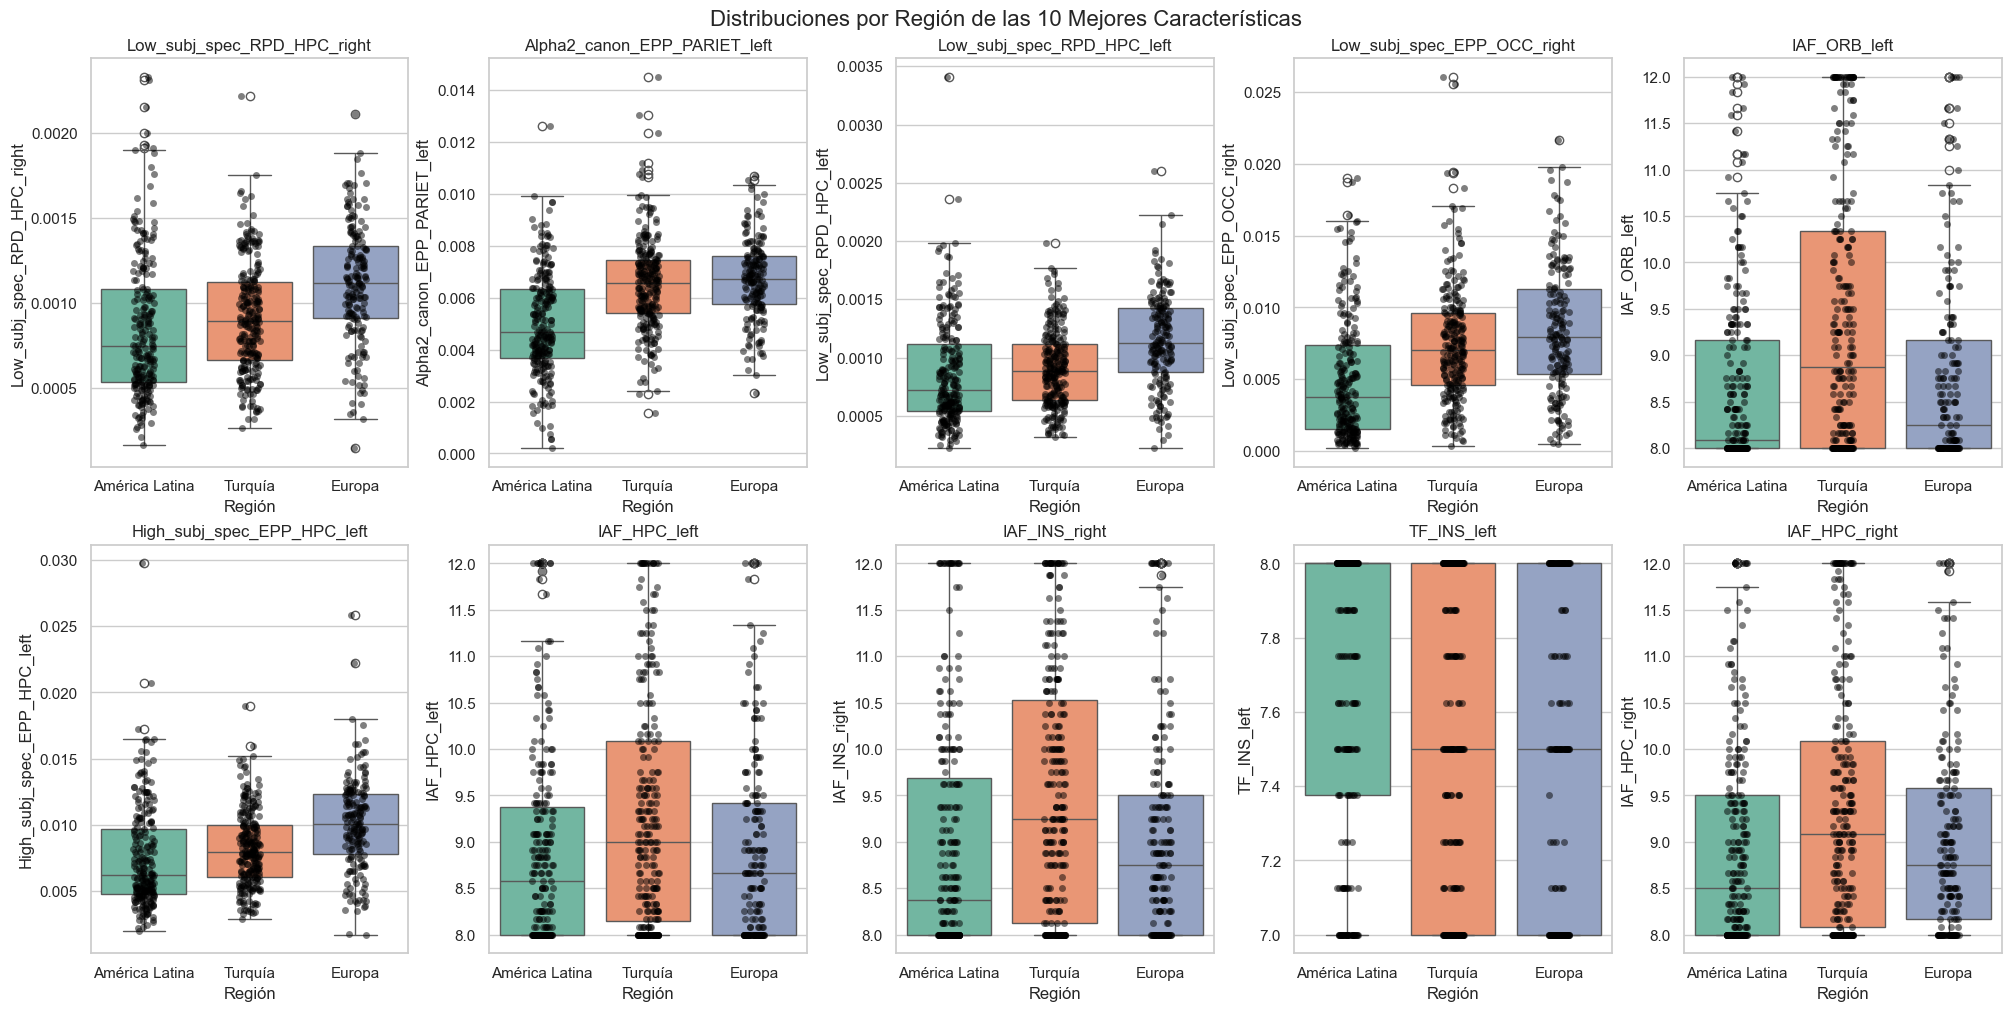

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de las 10 mejores características
top_10_features = [
    'Low_subj_spec_RPD_HPC_right',
    'Alpha2_canon_EPP_PARIET_left',
    'Low_subj_spec_RPD_HPC_left',
    'Low_subj_spec_EPP_OCC_right',
    'IAF_ORB_left',
    'High_subj_spec_EPP_HPC_left',
    'IAF_HPC_left',
    'IAF_INS_right',
    'TF_INS_left',
    'IAF_HPC_right'
]

# Crear la figura con subplots de 2x5
fig, axes = plt.subplots(2, 5, figsize=(20, 10), constrained_layout=True)

# Iterar sobre cada característica y su subplot
for i, feature in enumerate(top_10_features):
    row, col = divmod(i, 5)  # Calcular fila y columna
    ax = axes[row, col]
    
    # Generar boxplot y stripplot para la característica actual
    sns.boxplot(data=df, x='Region', y=feature, palette='Set2', ax=ax)
    sns.stripplot(data=df, x='Region', y=feature, color='black', alpha=0.5, jitter=True, ax=ax)
    
    # Títulos y etiquetas
    ax.set_title(f'{feature}')
    ax.set_xlabel('Región')
    ax.set_ylabel(feature)

# Título general para la figura
fig.suptitle('Distribuciones por Región de las 10 Mejores Características', fontsize=16)

# Mostrar la figura
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\f

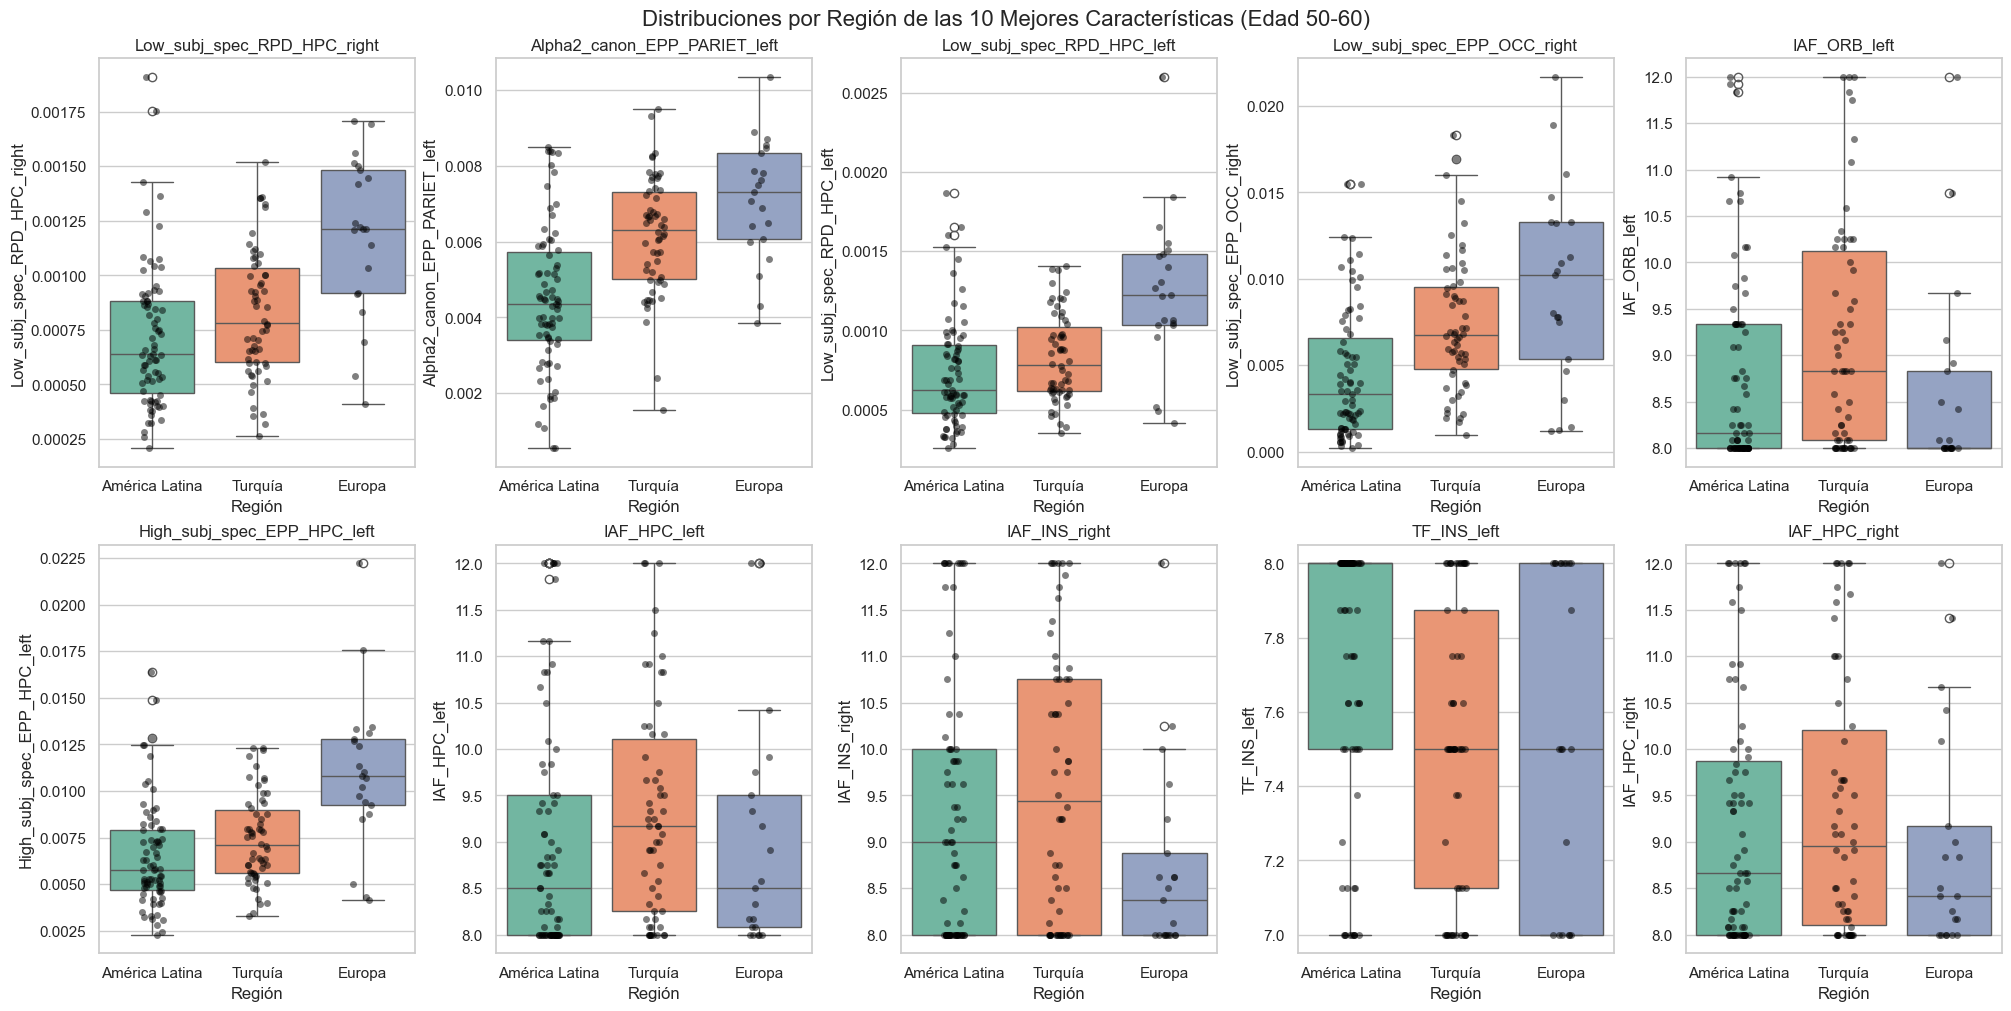

C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\f

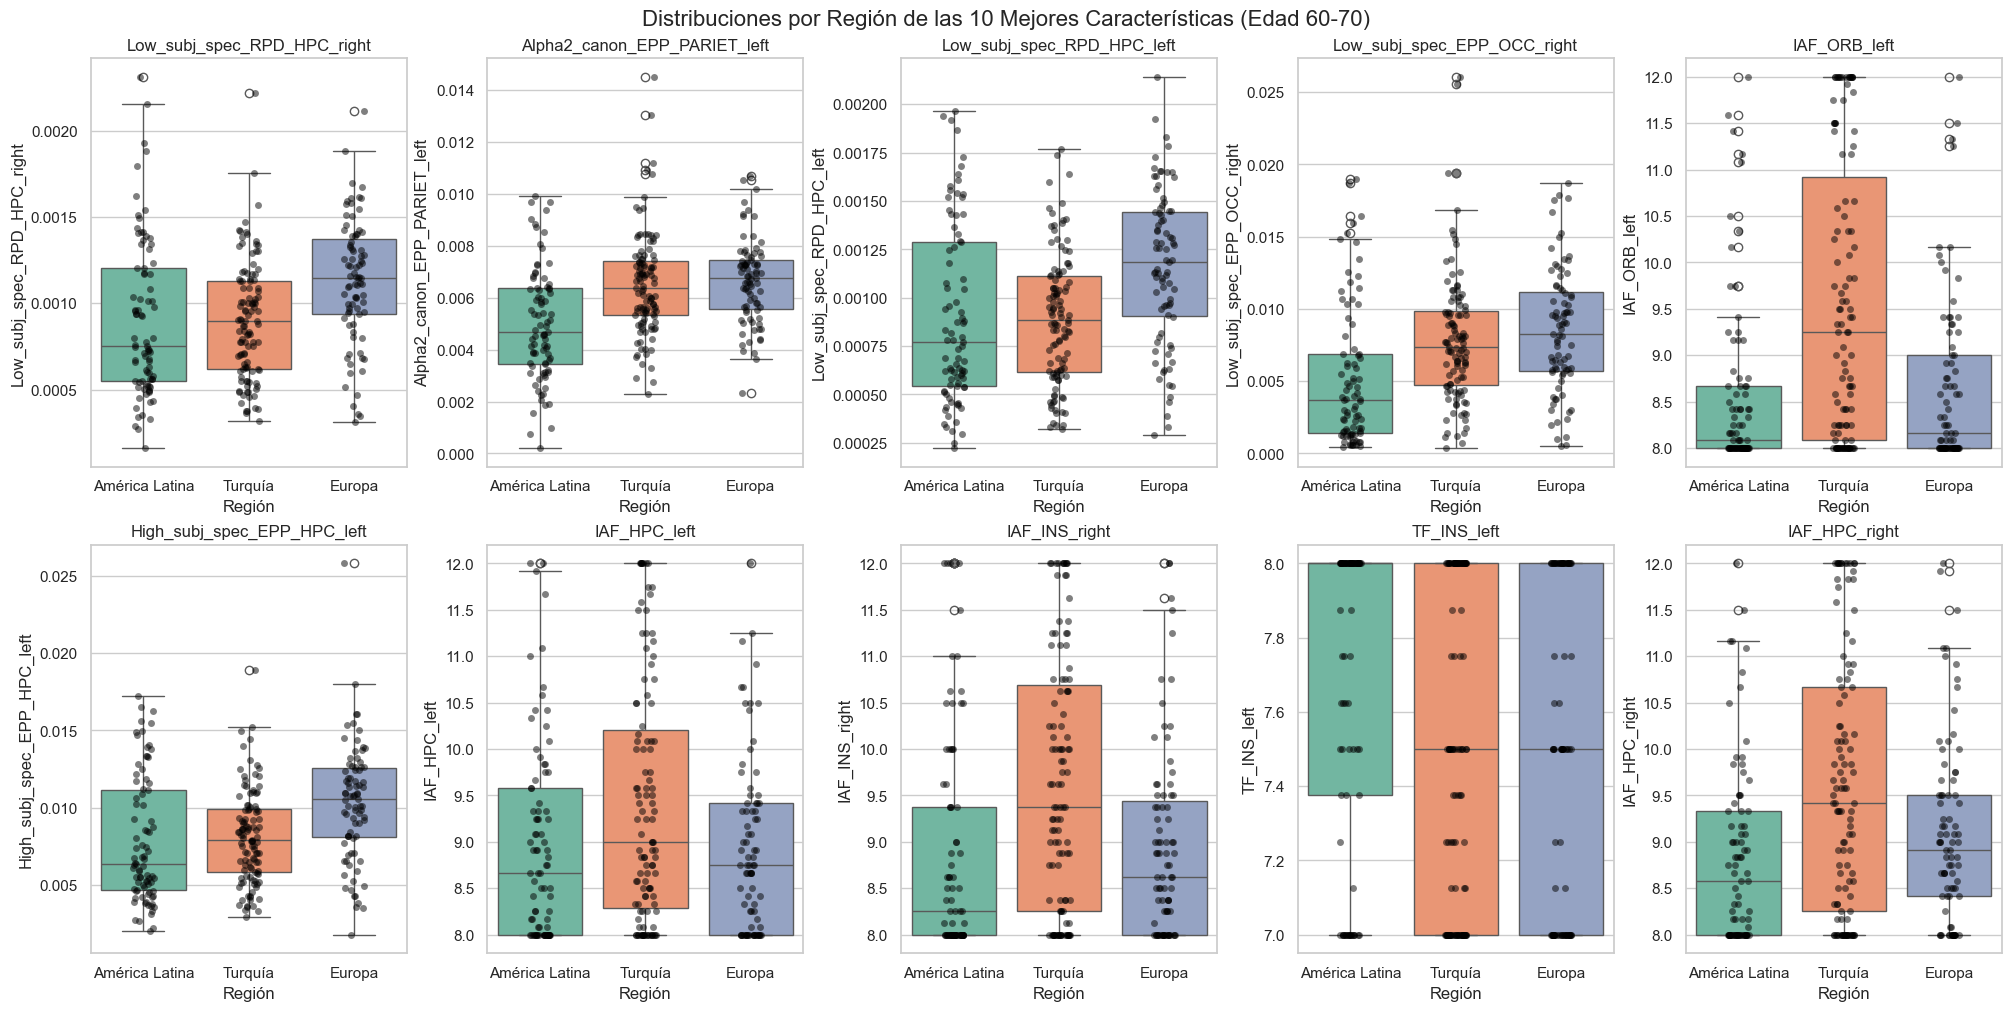

C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\f

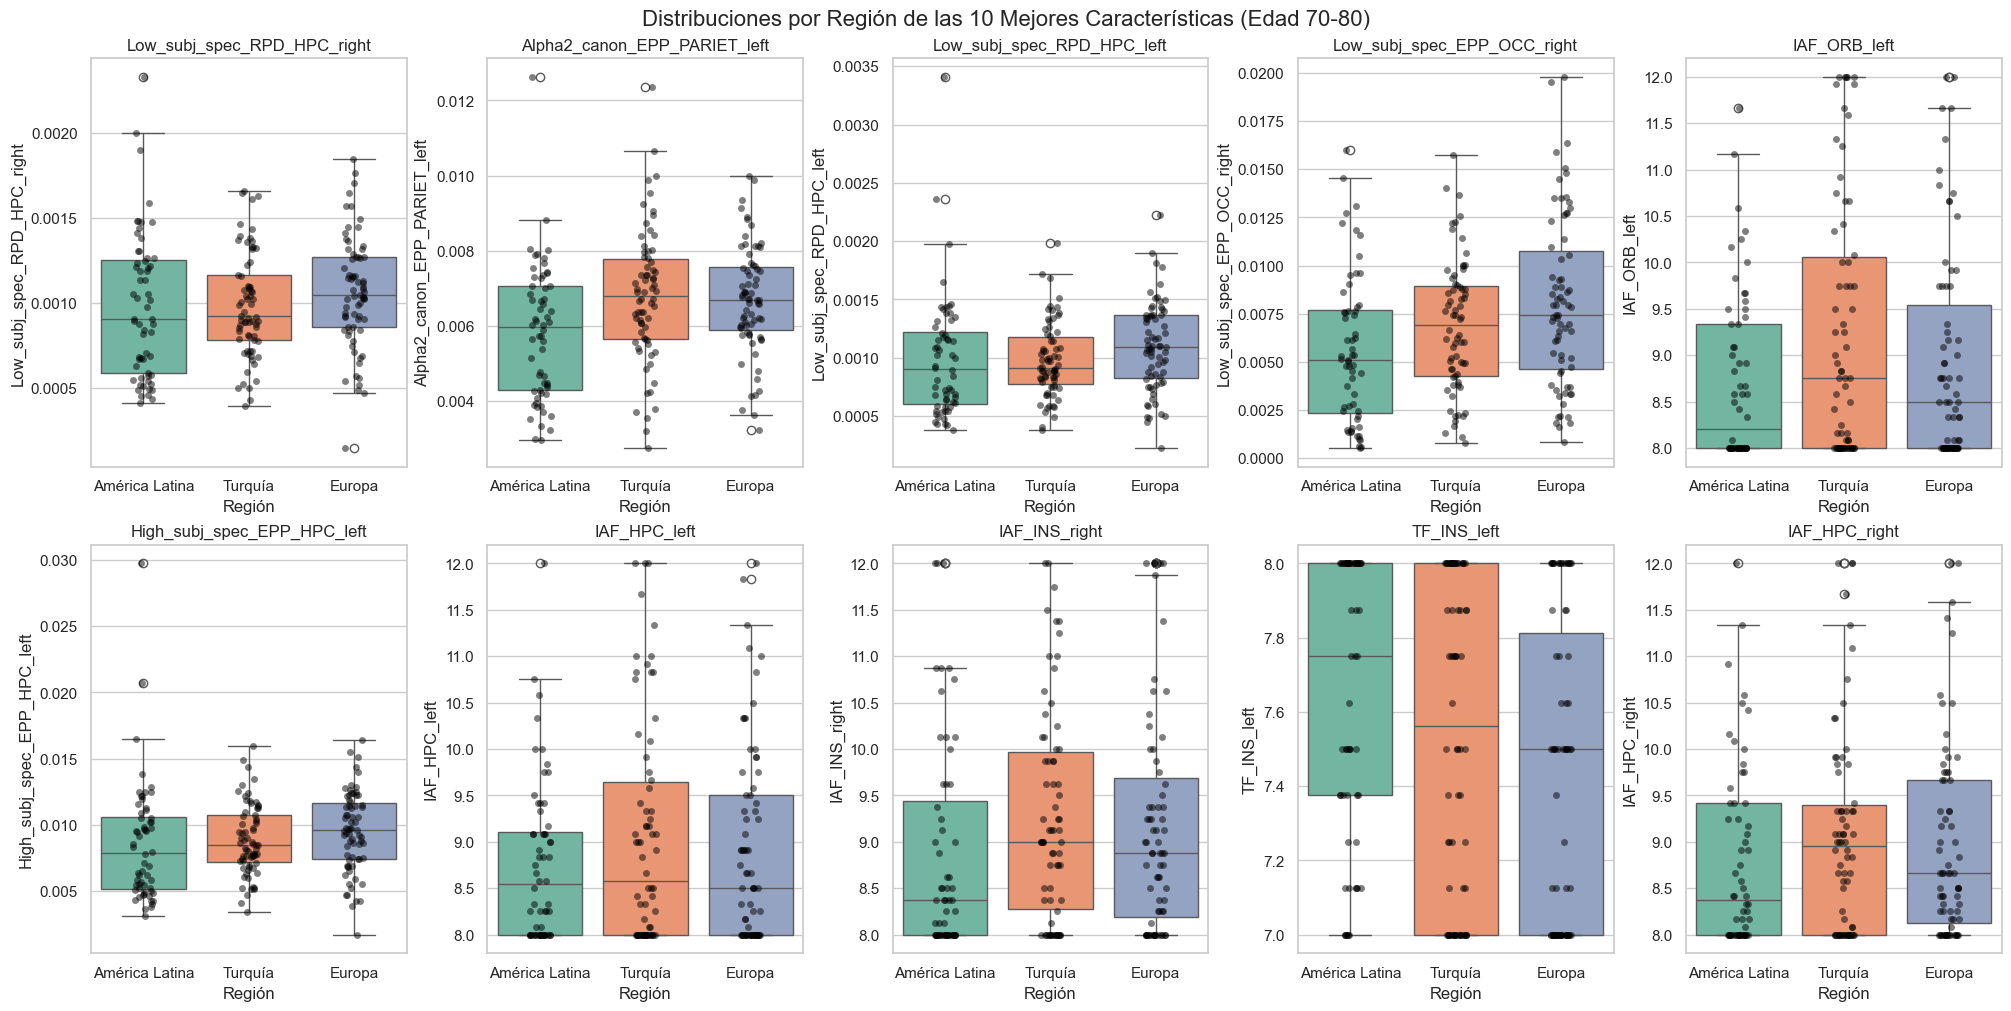

C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\felip\AppData\Local\Temp\ipykernel_185288\2867425556.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
C:\Users\f

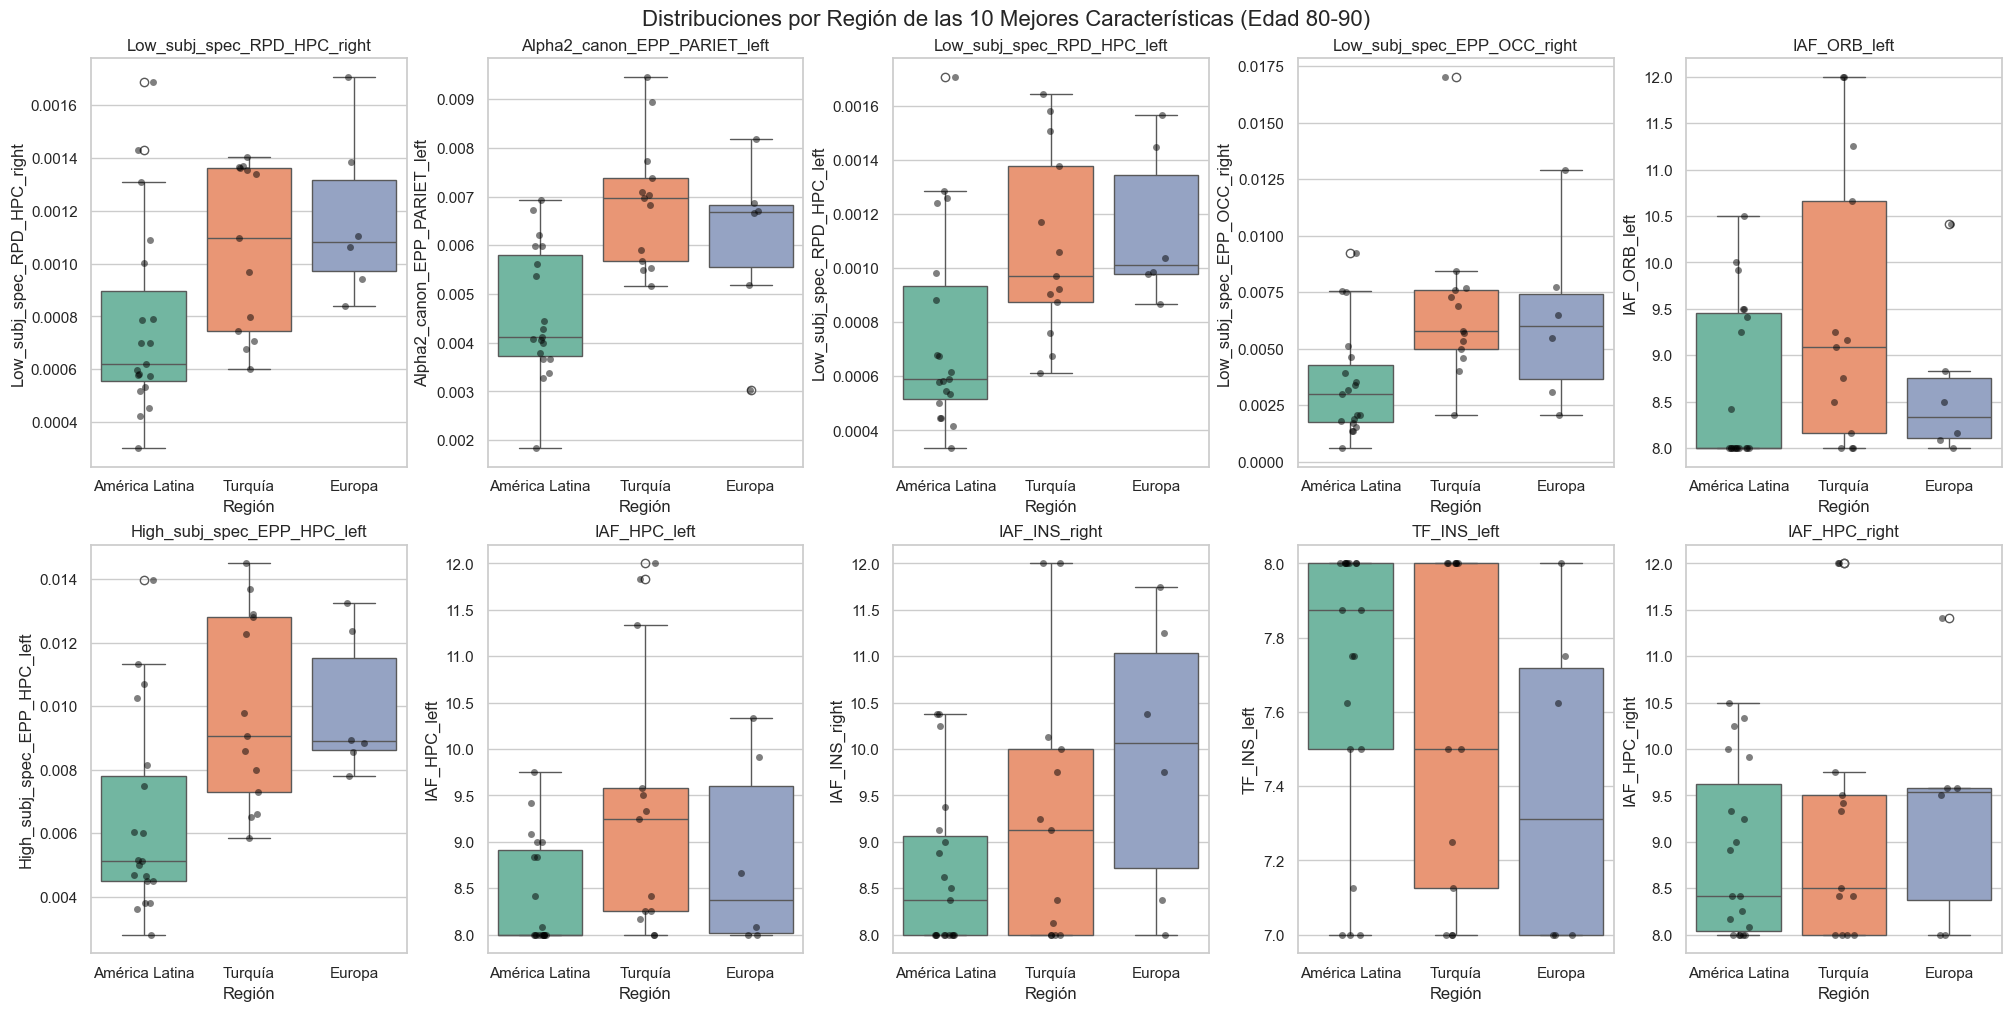

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de las 10 mejores características
top_10_features = [
    'Low_subj_spec_RPD_HPC_right',
    'Alpha2_canon_EPP_PARIET_left',
    'Low_subj_spec_RPD_HPC_left',
    'Low_subj_spec_EPP_OCC_right',
    'IAF_ORB_left',
    'High_subj_spec_EPP_HPC_left',
    'IAF_HPC_left',
    'IAF_INS_right',
    'TF_INS_left',
    'IAF_HPC_right'
]

# Definir rangos de edad
age_ranges = [(50, 60), (60, 70), (70, 80), (80, 90)]

# Iterar sobre cada rango de edad
for age_min, age_max in age_ranges:
    # Filtrar el DataFrame por el rango de edad
    df_filtered = df[(df['Age'] >= age_min) & (df['Age'] < age_max)]
    
    # Crear la figura con subplots de 2x5
    fig, axes = plt.subplots(2, 5, figsize=(20, 10), constrained_layout=True)
    
    # Iterar sobre cada característica y su subplot
    for i, feature in enumerate(top_10_features):
        row, col = divmod(i, 5)  # Calcular fila y columna
        ax = axes[row, col]
        
        # Generar boxplot y stripplot para la característica actual
        sns.boxplot(data=df_filtered, x='Region', y=feature, palette='Set2', ax=ax)
        sns.stripplot(data=df_filtered, x='Region', y=feature, color='black', alpha=0.5, jitter=True, ax=ax)
        
        # Títulos y etiquetas
        ax.set_title(f'{feature}')
        ax.set_xlabel('Región')
        ax.set_ylabel(feature)
    
    # Título general para la figura
    fig.suptitle(f'Distribuciones por Región de las 10 Mejores Características (Edad {age_min}-{age_max})', fontsize=16)
    
    # Mostrar la figura
    plt.show()


In [203]:
# Calcular estadísticas descriptivas por región
stats = df.groupby('Region')['Alpha2_canon_EPP_PARIET_left'].describe()
print(stats)


                count      mean       std       min       25%       50%  \
Region                                                                    
América Latina  239.0  0.005004  0.002010  0.000209  0.003683  0.004666   
Europa          181.0  0.006699  0.001541  0.002333  0.005766  0.006737   
Turquía         252.0  0.006521  0.001807  0.001564  0.005404  0.006561   

                     75%       max  
Region                              
América Latina  0.006338  0.012629  
Europa          0.007610  0.010708  
Turquía         0.007459  0.014523  


In [204]:
from scipy.stats import f_oneway

# Separar los datos por región
regions = df['Region'].unique()
region_groups = [df[df['Region'] == region]['Alpha2_canon_EPP_PARIET_left'] for region in regions]

# ANOVA
anova_result = f_oneway(*region_groups)
print(f"ANOVA: F-Statistic = {anova_result.statistic:.3f}, P-Value = {anova_result.pvalue:.3e}")


ANOVA: F-Statistic = 59.621, P-Value = 1.487e-24


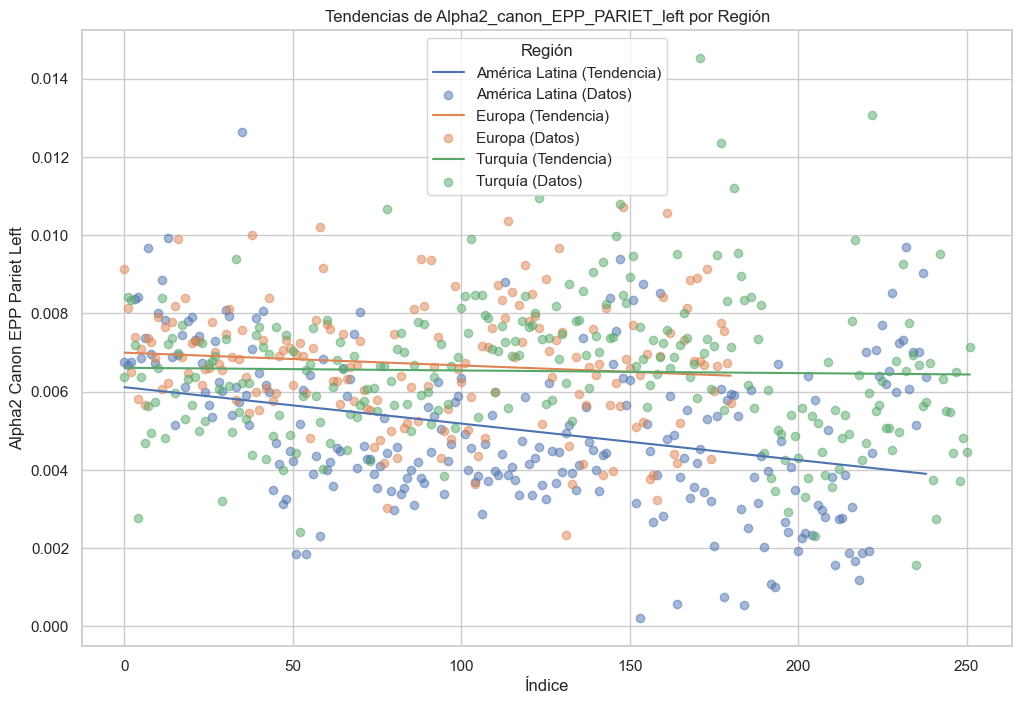

In [205]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Graficar regresiones para cada región
plt.figure(figsize=(12, 8))
for region, group in df.groupby('Region'):
    X = np.arange(len(group)).reshape(-1, 1)  # Índices como variable independiente
    y = group['Alpha2_canon_EPP_PARIET_left'].values
    
    model = LinearRegression()
    model.fit(X, y)
    plt.plot(X, model.predict(X), label=f"{region} (Tendencia)")
    plt.scatter(X, y, alpha=0.5, label=f"{region} (Datos)")

plt.title('Tendencias de Alpha2_canon_EPP_PARIET_left por Región')
plt.xlabel('Índice')
plt.ylabel('Alpha2 Canon EPP Pariet Left')
plt.legend(title='Región')
plt.show()


In [209]:
features

['Alpha2_canon_EPP_HPC_left',
 'Alpha2_canon_EPP_HPC_right',
 'Alpha2_canon_EPP_PARIET_left',
 'Alpha2_canon_EPP_PARIET_right',
 'Alpha2_canon_EPP_OCC_left',
 'Alpha2_canon_EPP_OCC_right',
 'Alpha2_canon_RPD_HPC_left',
 'Alpha2_canon_RPD_HPC_right',
 'Alpha2_canon_RPD_CING_left',
 'Alpha2_canon_RPD_CING_right',
 'Alpha2_canon_RPD_PARIET_left',
 'Alpha2_canon_RPD_PARIET_right',
 'Alpha2_canon_RPD_OCC_left',
 'Alpha2_canon_RPD_OCC_right',
 'High_subj_spec_EPP_HPC_left',
 'High_subj_spec_EPP_HPC_right',
 'High_subj_spec_EPP_CING_left',
 'High_subj_spec_EPP_CING_right',
 'High_subj_spec_EPP_PARIET_left',
 'High_subj_spec_EPP_PARIET_right',
 'High_subj_spec_EPP_OCC_left',
 'High_subj_spec_EPP_OCC_right',
 'High_subj_spec_RPD_HPC_left',
 'High_subj_spec_RPD_HPC_right',
 'High_subj_spec_RPD_CING_left',
 'High_subj_spec_RPD_CING_right',
 'High_subj_spec_RPD_PARIET_left',
 'High_subj_spec_RPD_PARIET_right',
 'High_subj_spec_RPD_OCC_left',
 'High_subj_spec_RPD_OCC_right',
 'Low_subj_spec_EPP_HPC

In [210]:
from sklearn.decomposition import PCA

pca_results = {}
for country in df_CN_filtrado_sin_cuba['Country'].unique():
    country_data = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Country'] == country]
    X_scaled = scaler.fit_transform(country_data[features])
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    pca_results[country] = pca.explained_variance_ratio_

print(pca_results)


{'ARG': array([0.52792186, 0.12316086, 0.06402962]), 'CHI': array([0.32336474, 0.14999507, 0.0828846 ]), 'TUR': array([0.43869777, 0.15329676, 0.06016961]), 'IRL': array([0.33730689, 0.11845518, 0.08013105]), 'COL': array([0.47008946, 0.13945289, 0.0774147 ]), 'BRA': array([0.43400754, 0.08929786, 0.06561614]), 'GRE': array([0.49871759, 0.11632897, 0.08195869]), 'ITA': array([0.32170509, 0.1899092 , 0.09867461]), 'UK': array([0.36004102, 0.16055294, 0.10466343])}


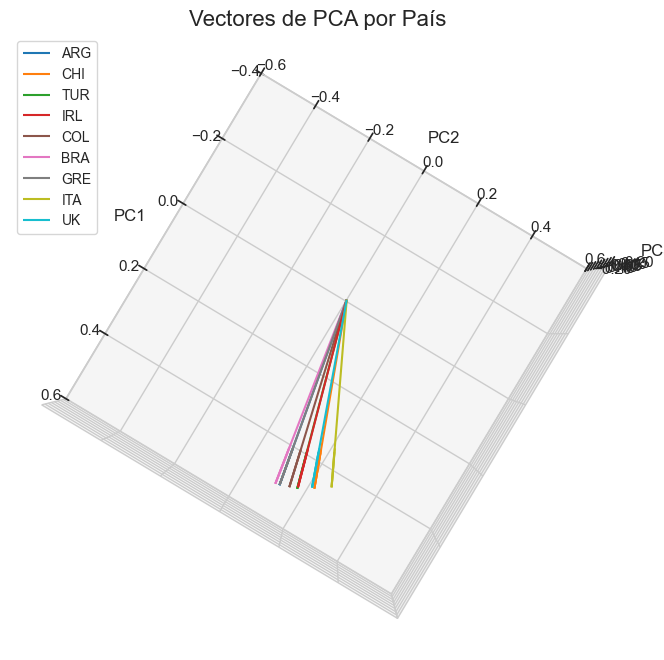

In [224]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Convertir los resultados a un formato manejable
countries = list(pca_results.keys())
pca_values = np.array(list(pca_results.values()))

# Crear una figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores diferenciados para cada país
colors = cm.tab10(np.linspace(0, 1, len(countries)))

# Iterar sobre cada país y graficar sus vectores como flechas
for i, (country, color) in enumerate(zip(countries, colors)):
    x, y, z = pca_values[i]
    ax.quiver(
        0, 0, 0,   # Origen de la flecha
        x, y, z,   # Dirección de la flecha
        length=0.5,               # Ajustar longitud de las flechas
        arrow_length_ratio=0.2,   # Tamaño de la punta de la flecha
        normalize=True,           # Normalizar el vector para que todas las flechas sean comparables
        color=color,
        label=country
    )

# Configuración de los ejes y límites
ax.set_xlim([-0.4, 0.6])
ax.set_ylim([-0.6, 0.6])
ax.set_zlim([-0.2, 0.2])

# Etiquetas y título
ax.set_title("Vectores de PCA por País", fontsize=16)
ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)
ax.legend(loc='upper left', fontsize=10)

# Ajustar la vista
ax.view_init(elev=90, azim=30)
# Mostrar la gráfica
plt.show()

In [226]:
from sklearn.decomposition import PCA

pca_results = {}
for country in df_CN_filtrado_sin_cuba['Country'].unique():
    country_data = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Country'] == country]
    X_scaled = scaler.fit_transform(country_data[features])
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    pca_results[country] = pca.explained_variance_ratio_

print(pca_results)


{'ARG': array([0.52792186, 0.12316086]), 'CHI': array([0.32336474, 0.14999507]), 'TUR': array([0.43869777, 0.15329676]), 'IRL': array([0.33730689, 0.11845518]), 'COL': array([0.47008946, 0.13945289]), 'BRA': array([0.43400754, 0.08929786]), 'GRE': array([0.49871759, 0.11632897]), 'ITA': array([0.32170509, 0.1899092 ]), 'UK': array([0.36004102, 0.16055294])}


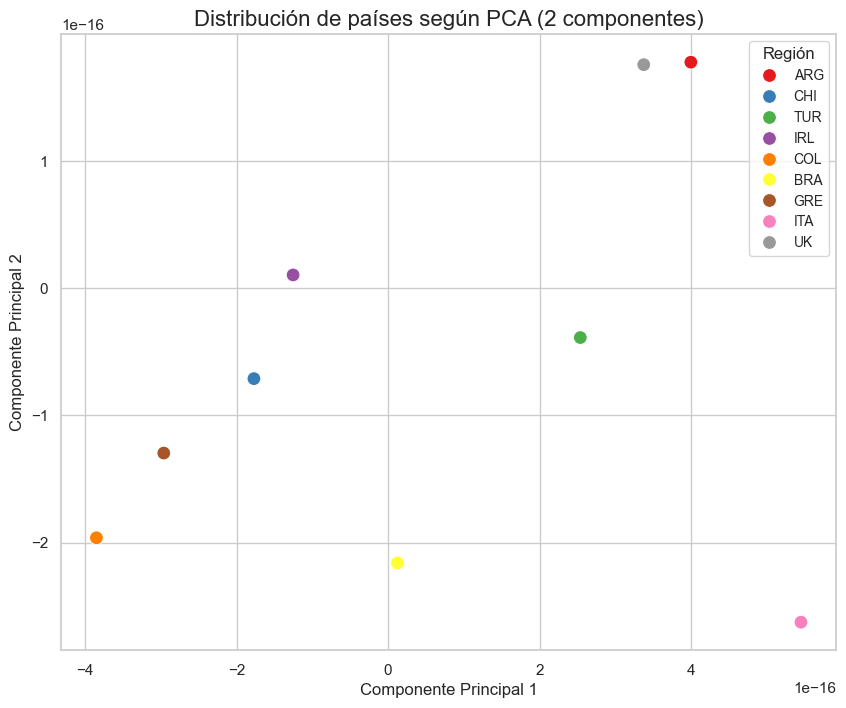

In [229]:
# Inicializar PCA y scaler
scaler = StandardScaler()

# Inicializar lista para almacenar los resultados de PCA
pca_values = []
countries = []
regions = []

# Realizar PCA para cada país
for country in df_CN_filtrado_sin_cuba['Country'].unique():
    country_data = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Country'] == country]
    X_scaled = scaler.fit_transform(country_data[features])
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Almacenar los valores de PCA y el país
    pca_values.append(X_pca.mean(axis=0))  # Promedio de las coordenadas PCA
    countries.append(country)
    regions.append(continent_map.get(country, 'Otro'))

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(pca_values, columns=['PC1', 'PC2'])
pca_df['Country'] = countries
pca_df['Region'] = regions

# Graficar los resultados de PCA en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Country', palette='Set1', s=100)

# Etiquetas y título
plt.title("Distribución de países según PCA (2 componentes)", fontsize=16)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)

# Leyenda
plt.legend(title="Región", fontsize=10, title_fontsize=12)

# Mostrar gráfico
plt.show()

In [232]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Lista de las 20 mejores características de acuerdo con SHAP
top_20_features = [
    'Low_subj_spec_RPD_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Low_subj_spec_RPD_HPC_left',
    'Low_subj_spec_EPP_OCC_right', 'IAF_ORB_left', 'High_subj_spec_EPP_HPC_left', 'IAF_HPC_left',
    'IAF_INS_right', 'TF_INS_left', 'IAF_HPC_right', 'TF_IFG_right', 'High_subj_spec_EPP_PARIET_right',
    'IAF_INS_left', 'TF_SFG_right', 'High_subj_spec_EPP_PARIET_left', 'TF_HPC_left', 'Alpha2_canon_RPD_PARIET_left',
    'High_subj_spec_RPD_HPC_left', 'Alpha2_canon_EPP_PARIET_right', 'Low_subj_spec_EPP_CING_left',
    'IAF_SFG_right'
]

# Inicializar el escalador
scaler = StandardScaler()

# Escalar los datos de todas las características seleccionadas
X_scaled_all = scaler.fit_transform(df_CN_filtrado_sin_cuba[top_20_features])

# Crear un diccionario para almacenar los resultados de varianza explicada por cada país
pca_results = {}

# Iterar sobre los países únicos
for country in df_CN_filtrado_sin_cuba['Country'].unique():
    # Filtrar los datos del país actual
    country_data = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Country'] == country]
    
    # Obtener las características escaladas para ese país
    country_scaled_data = X_scaled_all[df_CN_filtrado_sin_cuba['Country'] == country]
    
    # Aplicar PCA con 2 componentes principales
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(country_scaled_data)
    
    # Almacenar la varianza explicada para el país actual
    pca_results[country] = pca.explained_variance_ratio_

# Imprimir los resultados de varianza explicada por país
print(pca_results)


{'ARG': array([0.52160019, 0.13681102]), 'CHI': array([0.2904074, 0.1790167]), 'TUR': array([0.33849344, 0.20626568]), 'IRL': array([0.29174561, 0.16674456]), 'COL': array([0.36809719, 0.20893905]), 'BRA': array([0.31631298, 0.14329684]), 'GRE': array([0.46235062, 0.15468878]), 'ITA': array([0.32354234, 0.25403827]), 'UK': array([0.33586392, 0.22762156])}


In [238]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Lista de las 20 mejores características de acuerdo con SHAP, incluyendo 'Age'
top_20_features = [
    'Low_subj_spec_RPD_HPC_right', 'Age'  # Incluimos 'Age' aquí
]

# Inicializar el escalador
scaler = StandardScaler()

# Escalar los datos de todas las características seleccionadas
X_scaled_all = scaler.fit_transform(df_CN_filtrado_sin_cuba[top_20_features])

# Crear un diccionario para almacenar los resultados de varianza explicada por cada país
pca_results = {}

# Iterar sobre los países únicos
for country in df_CN_filtrado_sin_cuba['Country'].unique():
    # Filtrar los datos del país actual
    country_data = df_CN_filtrado_sin_cuba[df_CN_filtrado_sin_cuba['Country'] == country]
    
    # Obtener las características escaladas para ese país
    country_scaled_data = X_scaled_all[df_CN_filtrado_sin_cuba['Country'] == country]
    
    # Aplicar PCA con 2 componentes principales
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(country_scaled_data)
    
    # Almacenar la varianza explicada para el país actual
    pca_results[country] = pca.explained_variance_ratio_

# Imprimir los resultados de varianza explicada por país
print(pca_results)


{'ARG': array([0.51553396, 0.48446604]), 'CHI': array([0.56085757, 0.43914243]), 'TUR': array([0.62268588, 0.37731412]), 'IRL': array([0.58108517, 0.41891483]), 'COL': array([0.61763927, 0.38236073]), 'BRA': array([0.75734876, 0.24265124]), 'GRE': array([0.77444781, 0.22555219]), 'ITA': array([0.75914628, 0.24085372]), 'UK': array([0.61227872, 0.38772128])}


In [236]:
pca_results

{'ARG': array([0.49860852, 0.13230837]),
 'CHI': array([0.27724985, 0.17228113]),
 'TUR': array([0.32391987, 0.19652595]),
 'IRL': array([0.2828703 , 0.16151428]),
 'COL': array([0.35752338, 0.20273907]),
 'BRA': array([0.25971364, 0.19383179]),
 'GRE': array([0.4514841 , 0.15056646]),
 'ITA': array([0.30666424, 0.24124701]),
 'UK': array([0.32402436, 0.21999143])}

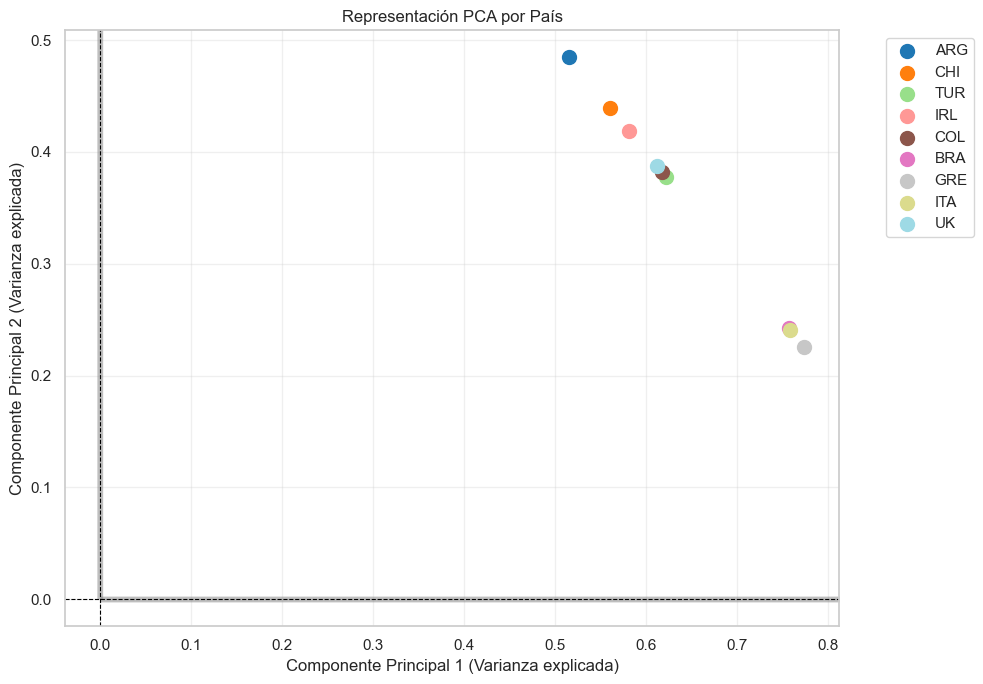

In [239]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista de colores para los países
unique_countries = list(pca_results.keys())
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_countries)))

# Crear el gráfico
plt.figure(figsize=(10, 7))
for i, country in enumerate(unique_countries):
    # Obtener las componentes principales de cada país
    pca_variance = pca_results[country]
    plt.scatter(
        pca_variance[0],  # Varianza explicada en el componente 1
        pca_variance[1],  # Varianza explicada en el componente 2
        color=colors[i],
        label=country,
        s=100  # Tamaño de los puntos
    )

# Agregar flechas (vectores) para representar los ejes principales
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color="gray", alpha=0.5)
plt.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color="gray", alpha=0.5)

# Personalizar el gráfico
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel("Componente Principal 1 (Varianza explicada)")
plt.ylabel("Componente Principal 2 (Varianza explicada)")
plt.title("Representación PCA por País")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar leyenda fuera del gráfico
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


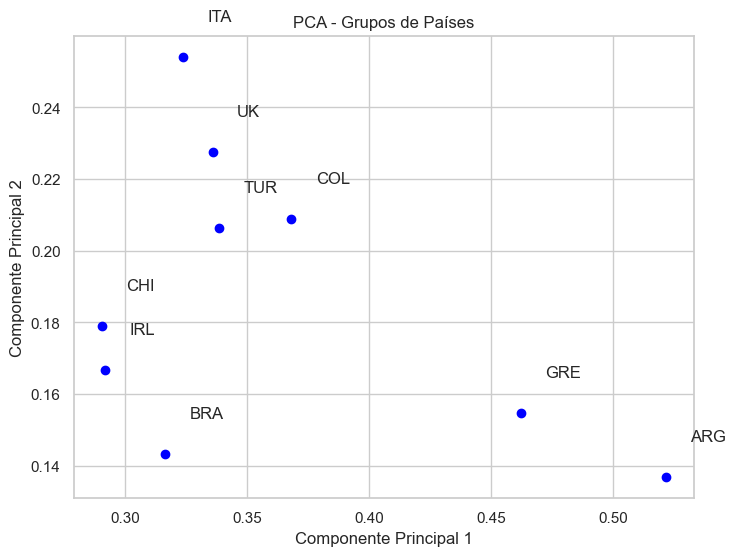

In [234]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los datos de los países y sus coordenadas en 2D
country_coords = {
    'ARG': np.array([0.52160019, 0.13681102]),
    'CHI': np.array([0.2904074, 0.1790167]),
    'TUR': np.array([0.33849344, 0.20626568]),
    'IRL': np.array([0.29174561, 0.16674456]),
    'COL': np.array([0.36809719, 0.20893905]),
    'BRA': np.array([0.31631298, 0.14329684]),
    'GRE': np.array([0.46235062, 0.15468878]),
    'ITA': np.array([0.32354234, 0.25403827]),
    'UK': np.array([0.33586392, 0.22762156])
}

# Extraer las coordenadas y los nombres de los países
countries = list(country_coords.keys())
coords = np.array(list(country_coords.values()))

# Crear el gráfico 2D
plt.figure(figsize=(8, 6))

# Graficar los puntos de cada país
plt.scatter(coords[:, 0], coords[:, 1], color='blue', marker='o')

# Etiquetar cada punto con el nombre del país
for i, country in enumerate(countries):
    plt.text(coords[i, 0] + 0.01, coords[i, 1] + 0.01, country, fontsize=12)

# Etiquetas y título
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Grupos de Países')

# Mostrar el gráfico
plt.grid(True)
plt.show()


# Mapas

In [248]:
import plotly.express as px

# Crear un mapa mundi simple
fig = px.choropleth(locationmode="country names")
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [252]:
import plotly.express as px

# Crear un mapa mundi simple con colores ficticios
data = {'Country': ['Chile', 'Argentina', 'Brazil', 'Colombia', 'Mexico'],
        'Value': [0.9, 0.85, 0.78, 0.75, 0.8]}

# Crear DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Crear el gráfico
fig = px.choropleth(df, locations="Country", locationmode="country names", color="Value",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Ejemplo de Mapa Mundial")

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [250]:
fig.show(renderer="browser")


In [253]:
import plotly.express as px
import pandas as pd

# Datos de ejemplo
data = {'Country': ['Chile', 'Argentina', 'Brazil', 'Colombia', 'Mexico'],
        'Value': [0.9, 0.85, 0.78, 0.75, 0.8]}
df = pd.DataFrame(data)

# Crear el gráfico
fig = px.choropleth(df, locations="Country", locationmode="country names", color="Value",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Ejemplo de Mapa Mundial")

# Mostrar en navegador
fig.show(renderer="browser")


In [255]:
import plotly.express as px
import pandas as pd


# Import data from GitHub
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_with_codes.csv')


# Create basic choropleth map
fig = px.choropleth(data, locations='iso_alpha', color='gdpPercap', hover_name='country',
                    projection='natural earth', title='GDP per Capita by Country')
#fig.show()
fig.show(renderer="browser")


In [256]:
import plotly.express as px
import pandas as pd


# Import data from USGS
data = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')


# Drop rows with missing or invalid values in the 'mag' column
data = data.dropna(subset=['mag'])
data = data[data.mag >= 0]


# Create scatter map
fig = px.scatter_geo(data, lat='latitude', lon='longitude', color='mag',
                     hover_name='place', #size='mag',
                     title='Earthquakes Around the World')
fig.show(renderer="browser")


# Modelo de Latinoamerica